In [1]:
import wisps
import wisps.simulations as wispsim
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
pnts=pd.read_pickle(wisps.OUTPUT_FILES+'/pointings_correctedf110.pkl')

In [3]:
wisps.drop_nan((pnts[0]).mags['F110'])

array([], dtype=float64)

In [4]:
madf=pd.DataFrame.from_records([x.mag_limits for x in pnts])
madf['survey']=[x.survey for x in pnts]
madf['snr1']=[np.nanmedian(np.log10(x.snr1)) for x in pnts]
madf['exp']=[np.nanmedian(x.exposure_times) for x in pnts]

In [5]:
mags=pd.DataFrame.from_records([x.mags for x in pnts]).applymap(np.nanmedian)
mags['exp']=[x.exposure_times.mean() for x in pnts]
mags['survey']=[x.survey for x in pnts]

In [6]:
hmags=mags[mags.exp.between(10**3.5, 10**3.7)]

hmags= madf[madf.survey=='hst3d']
wmags=madf[madf.survey=='wisps']


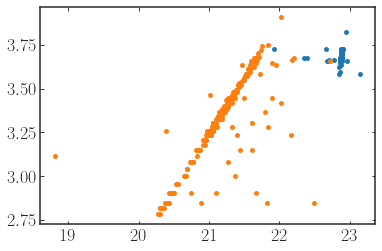

In [7]:
plt.scatter(hmags.F140, np.log10(hmags.exp), s=15)
plt.scatter(wmags.F140, np.log10(wmags.exp), s=15)

In [8]:

def get_max_value(values):
    values=wisps.drop_nan(values)
    if len(values)<1:
        return np.nan
    if len(values)>=1:
        kernel = wisps.kernel_density(values)
        height = kernel.pdf(values)
        mode_value = values[np.argmax(height)]
        return height, float(mode_value)


In [9]:
p=np.random.choice(pnts)

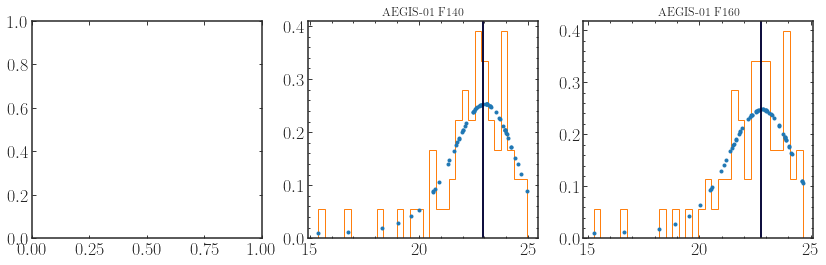

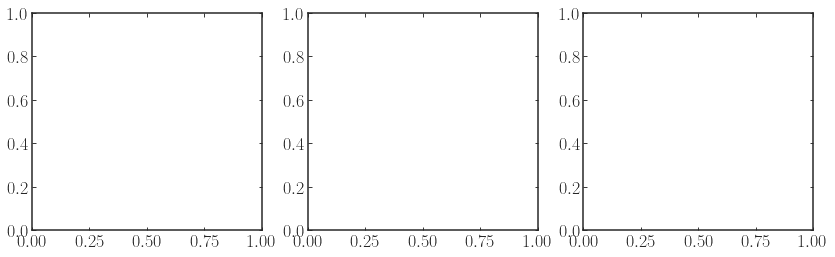

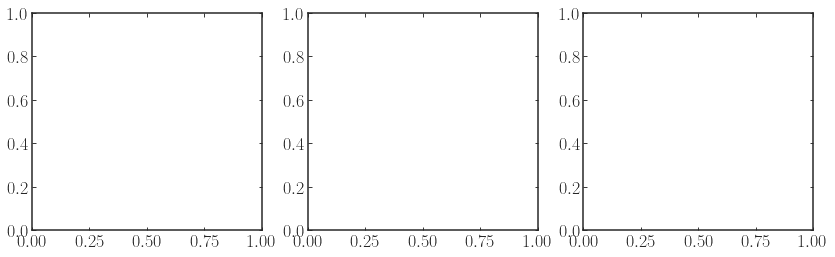

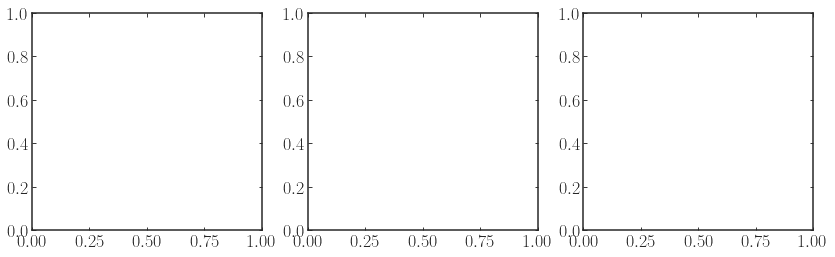

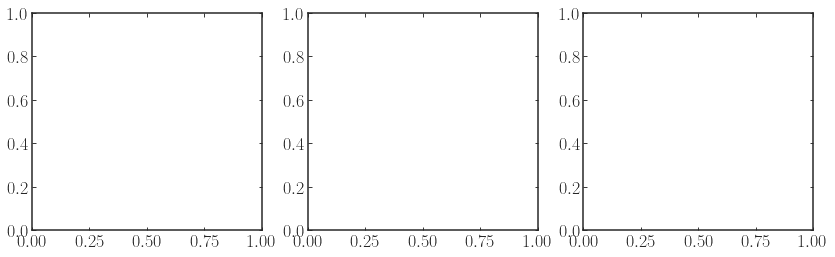

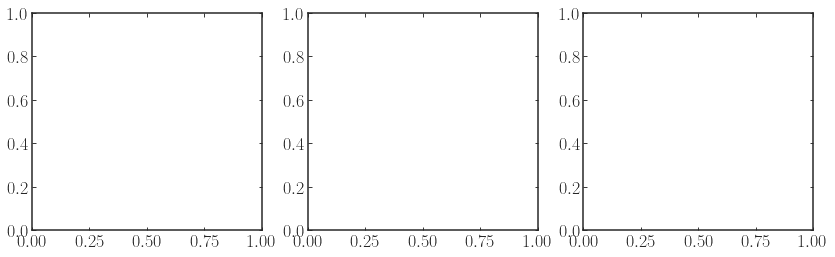

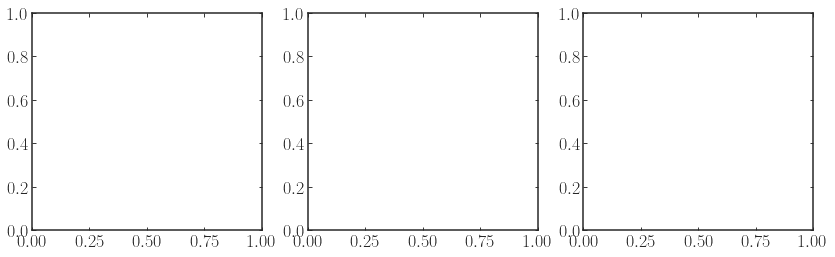

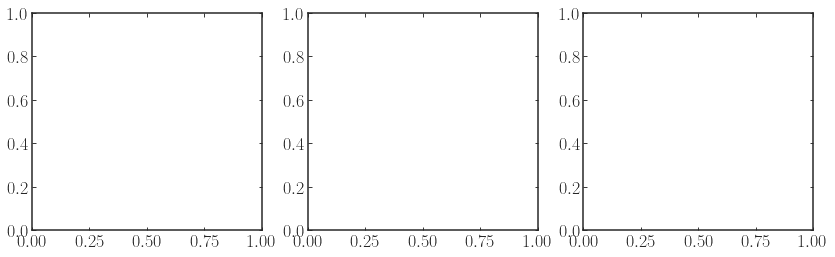

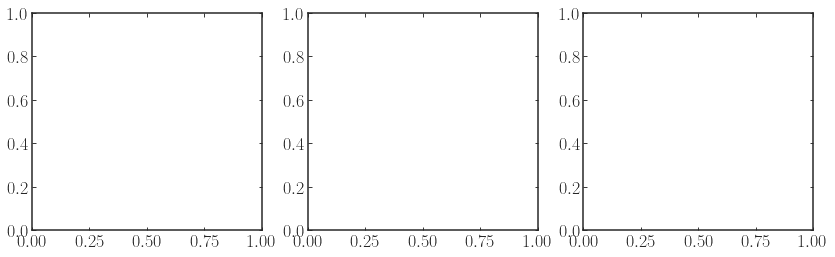

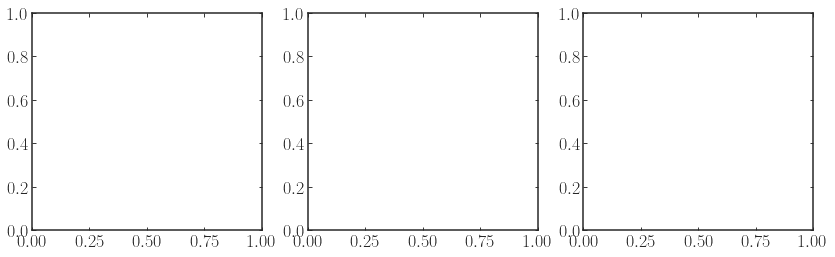

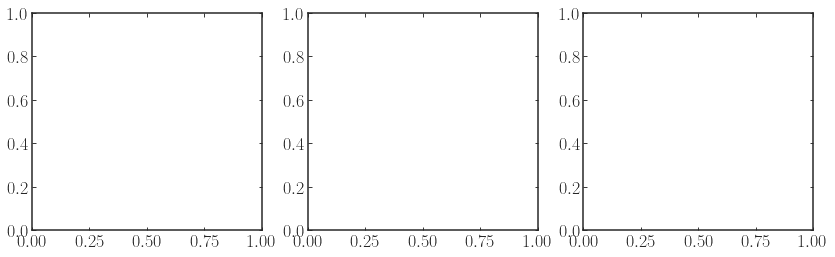

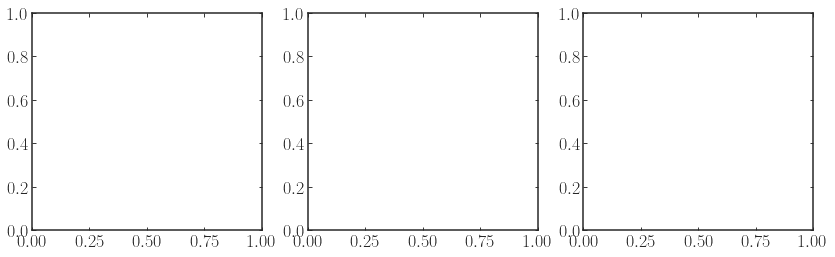

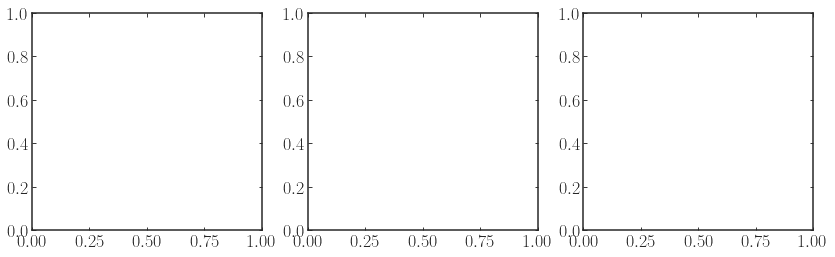

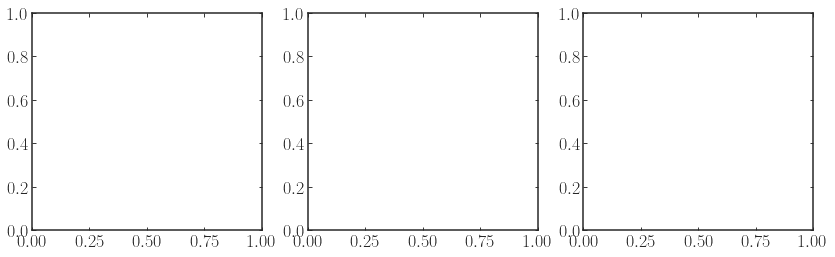

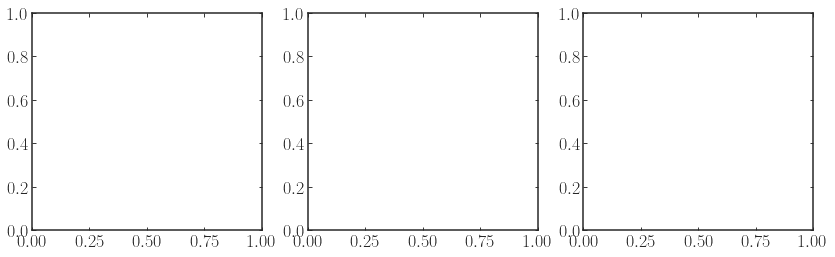

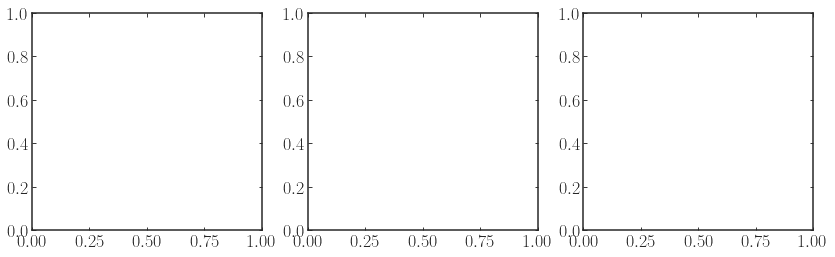

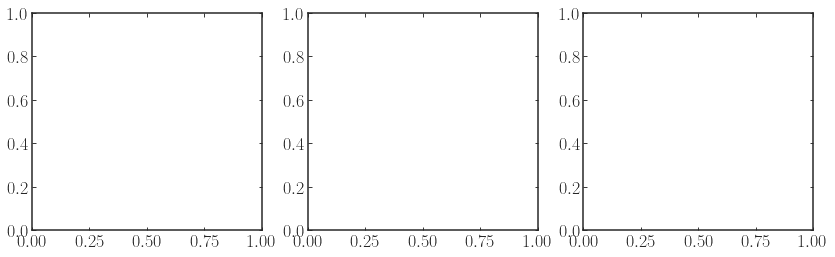

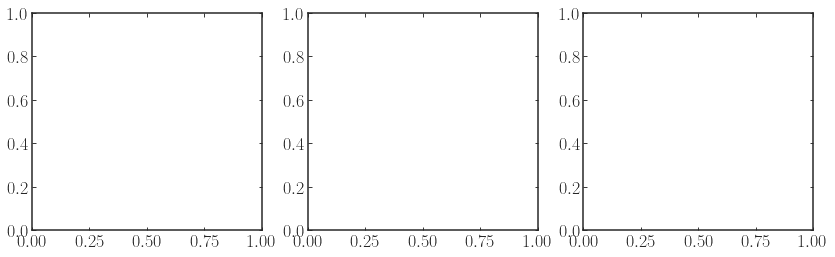

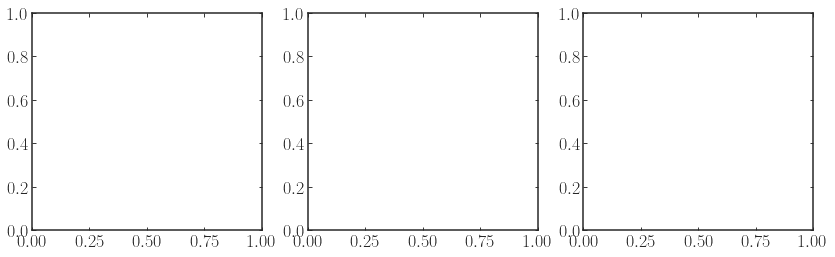

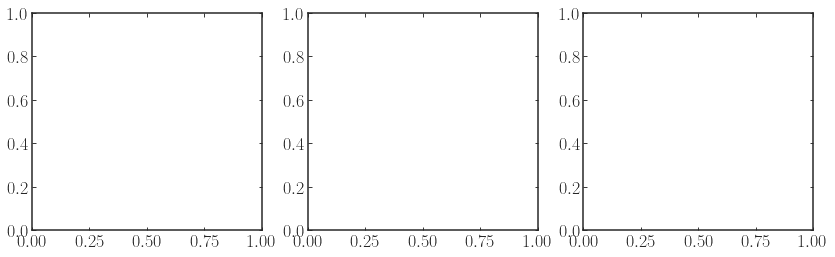

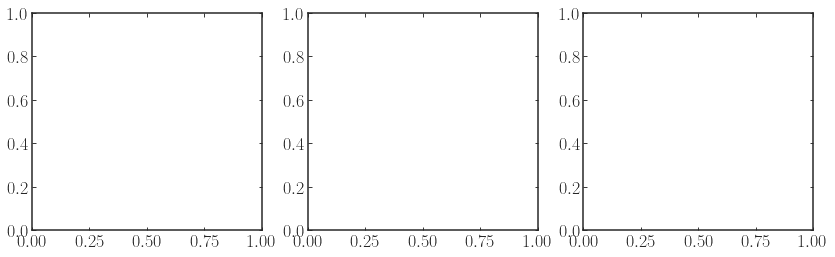

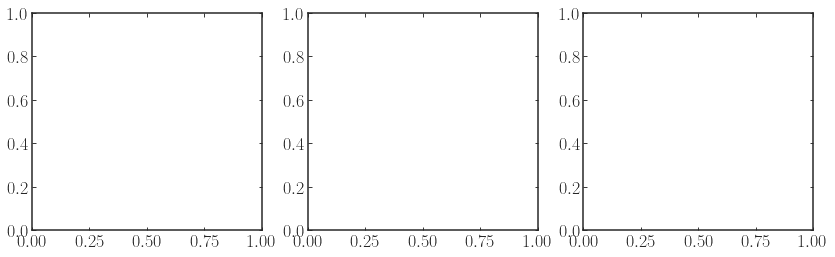

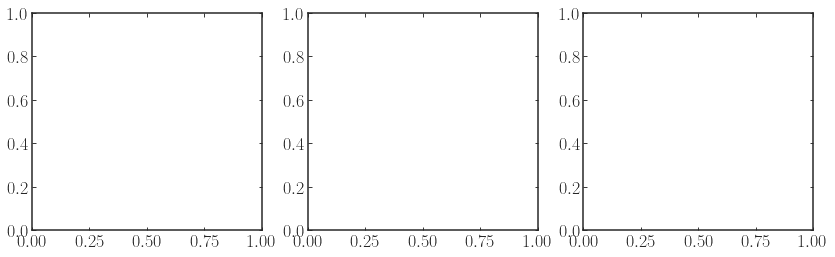

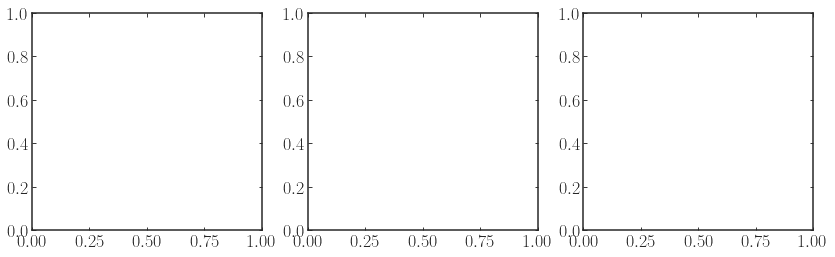

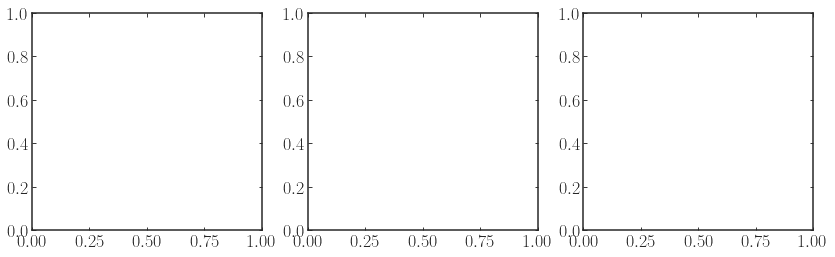

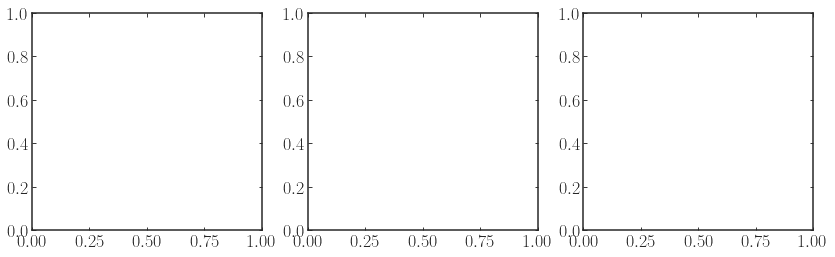

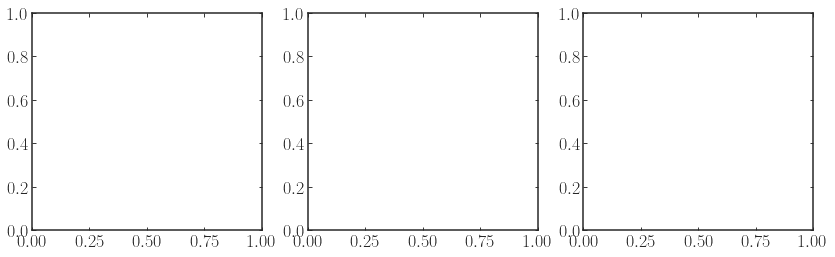

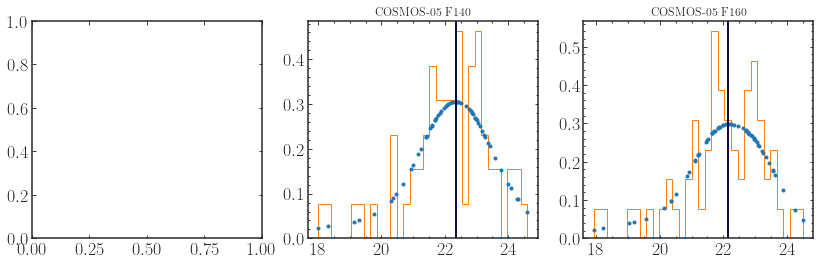

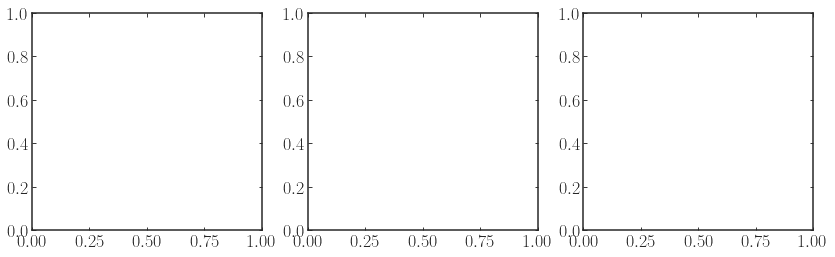

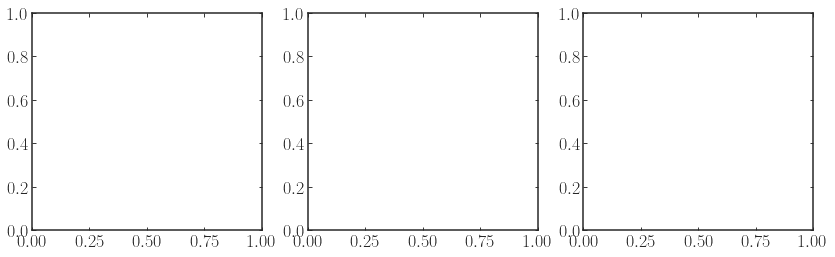

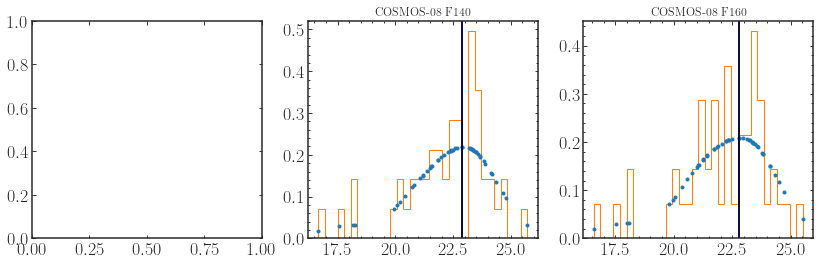

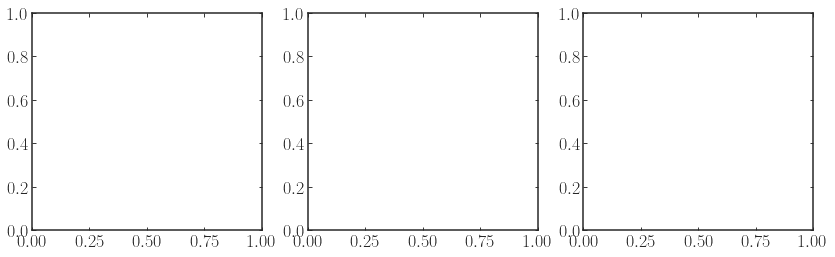

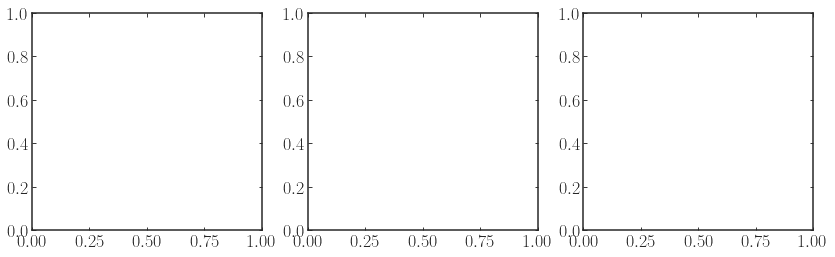

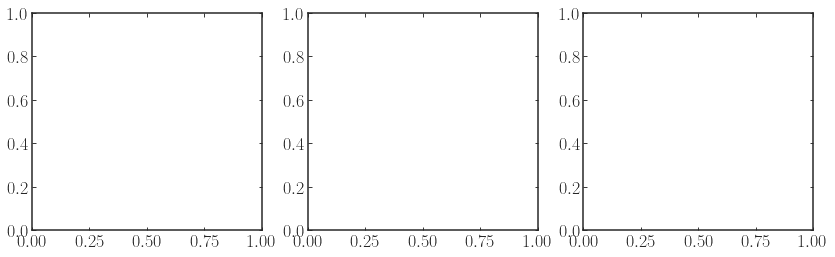

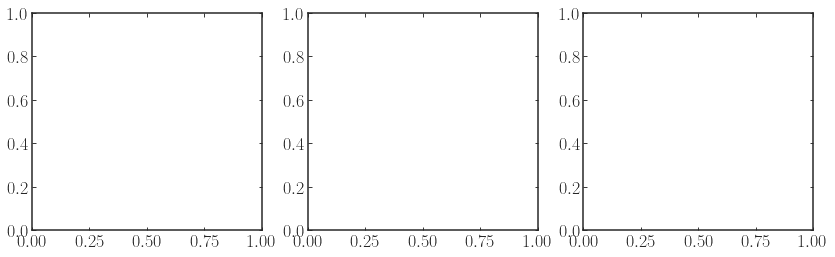

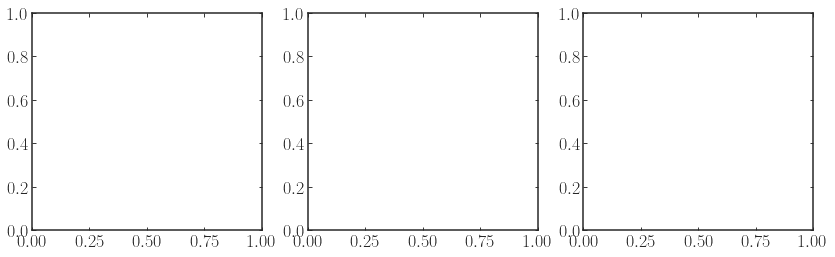

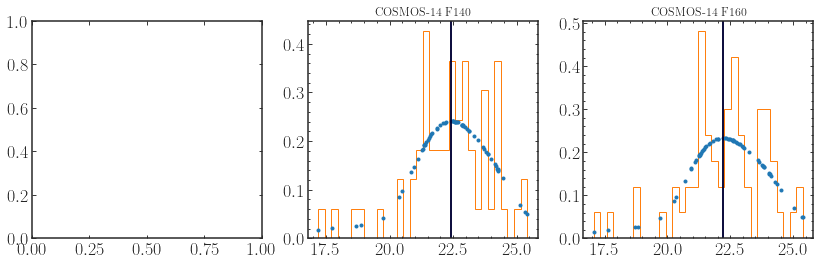

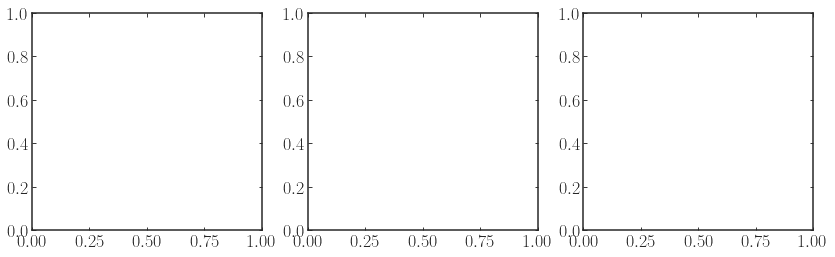

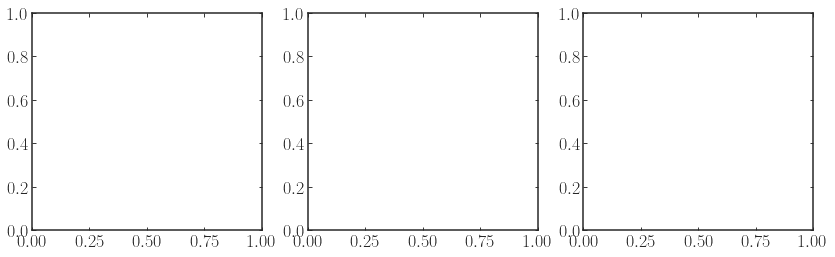

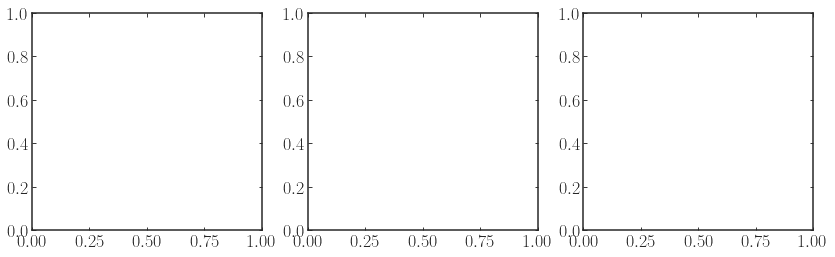

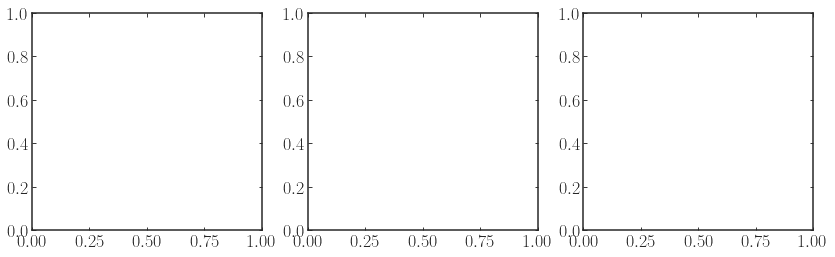

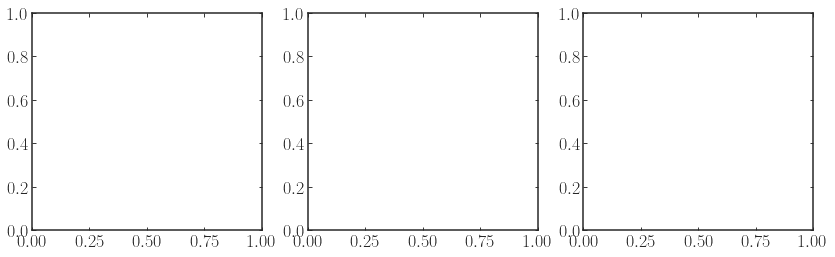

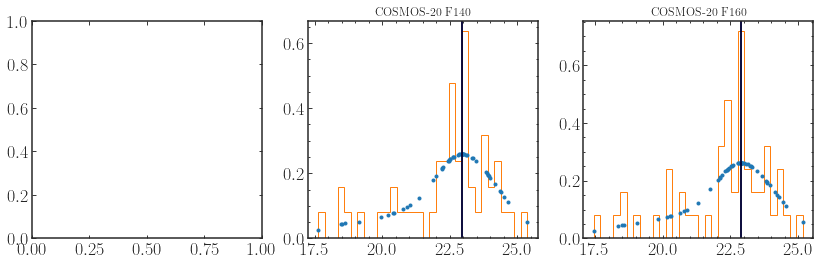

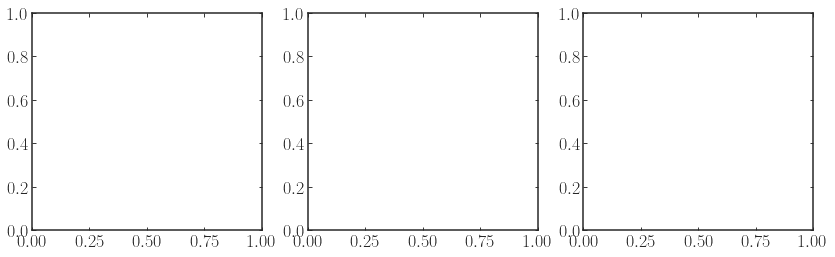

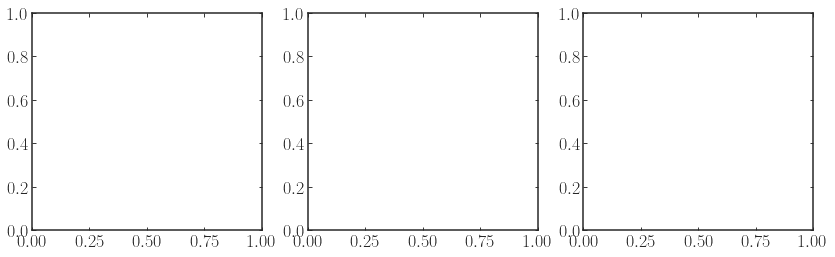

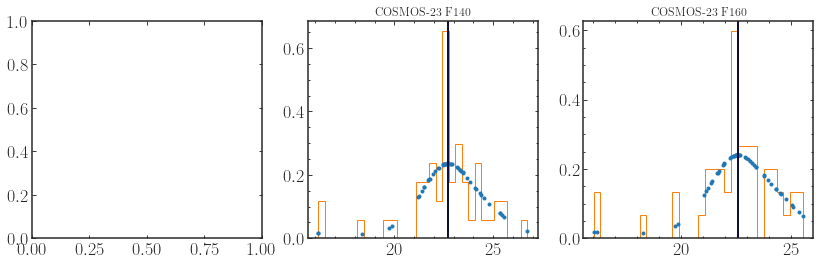

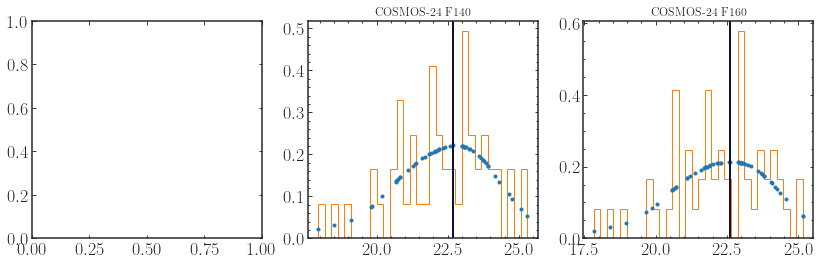

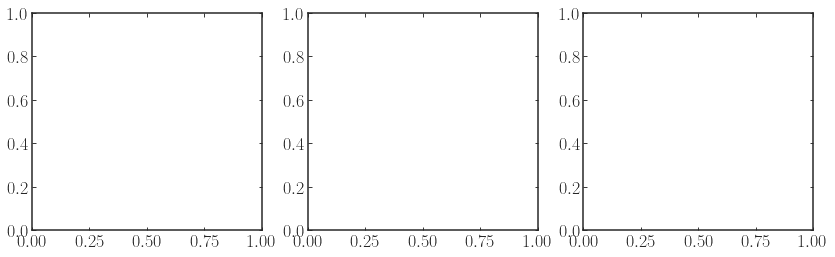

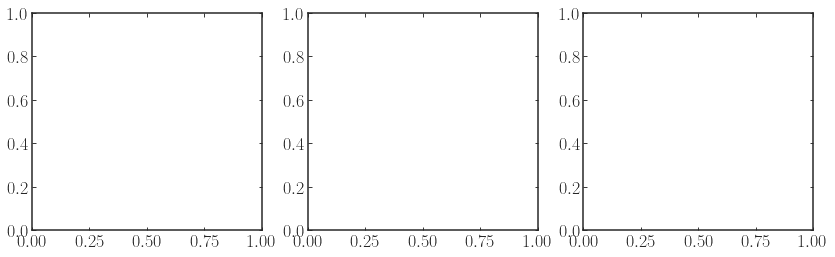

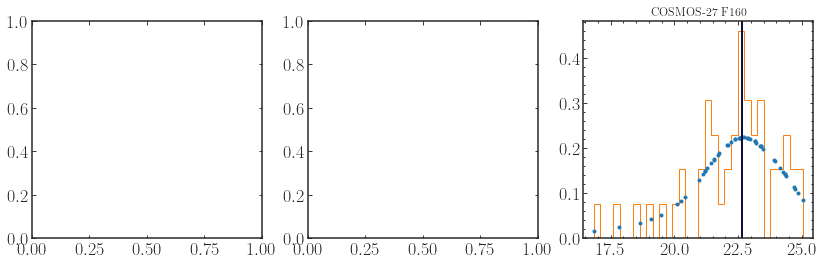

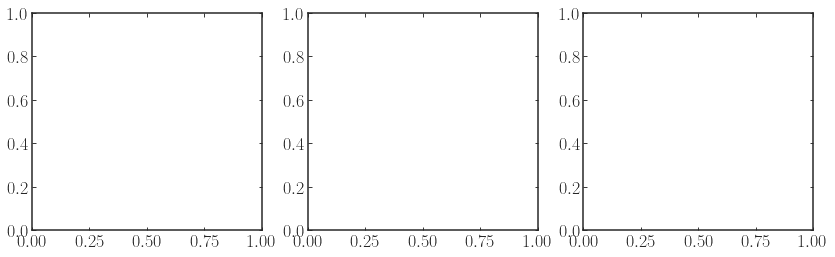

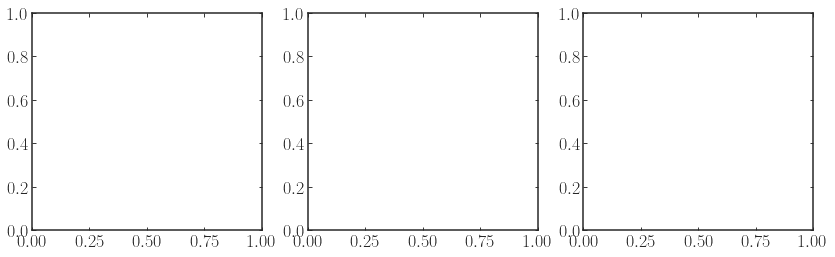

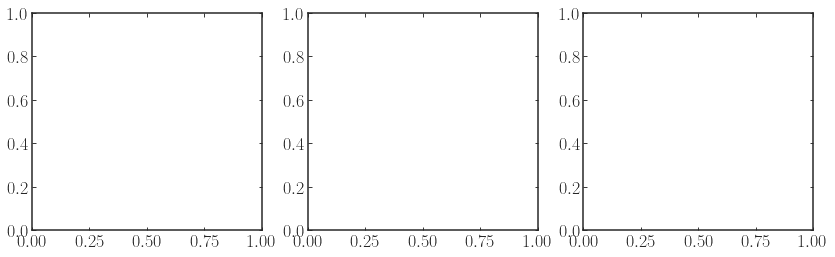

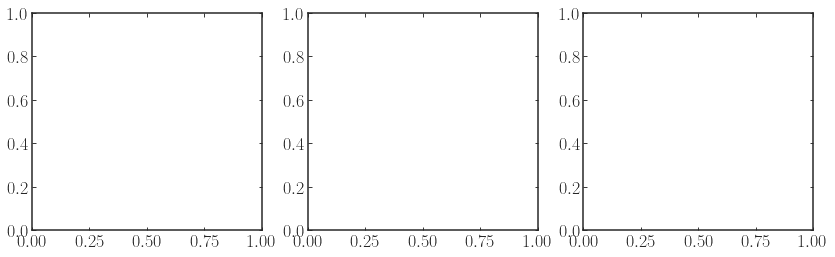

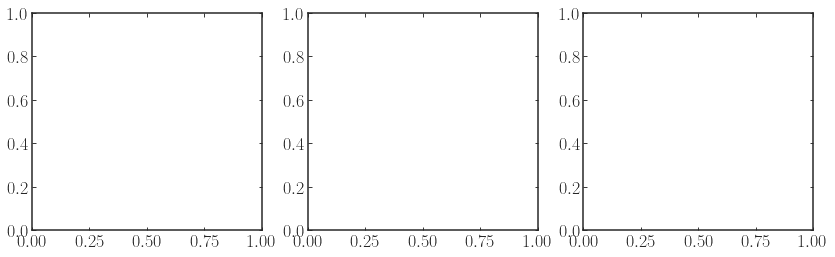

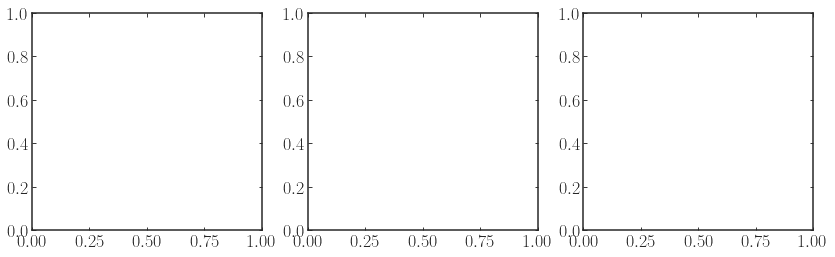

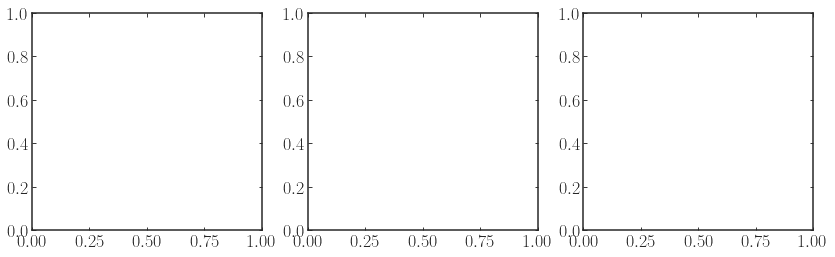

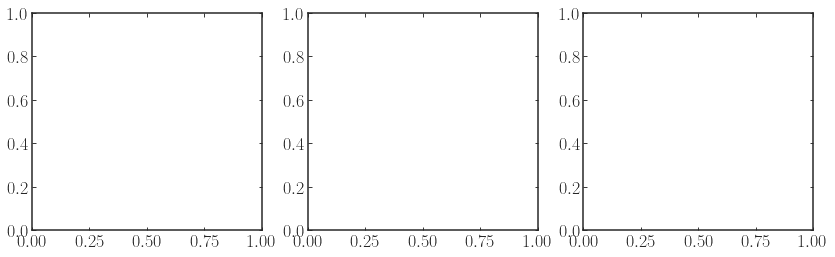

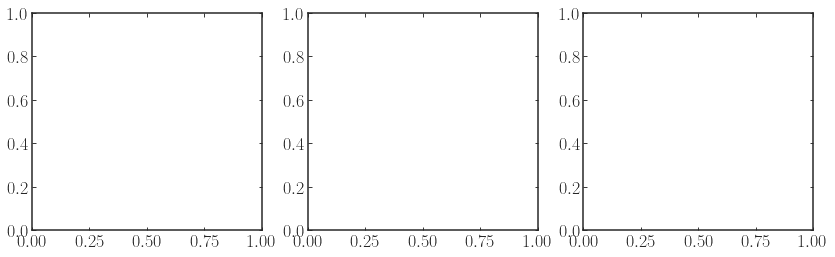

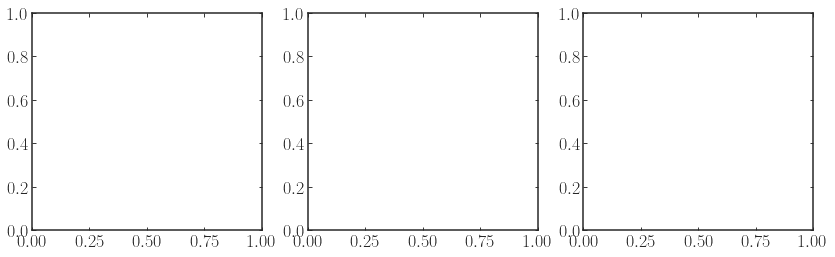

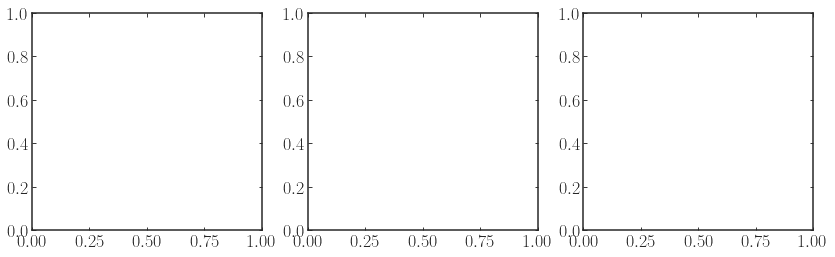

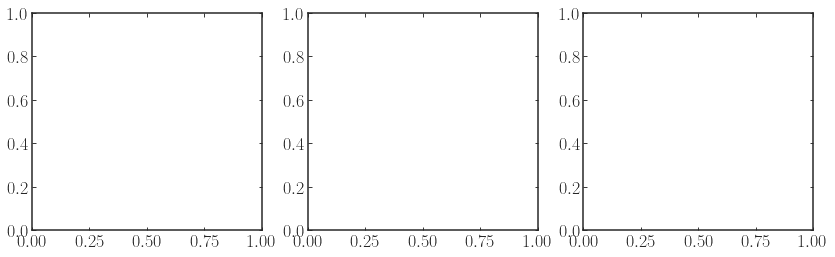

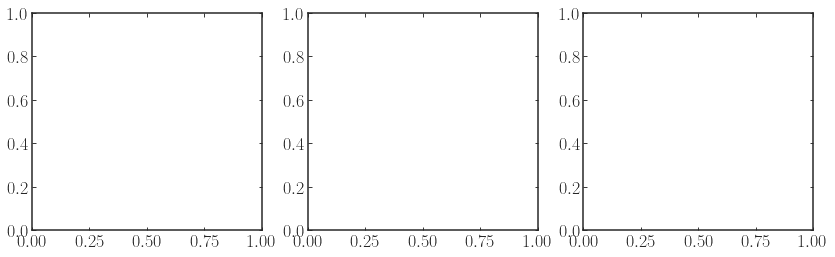

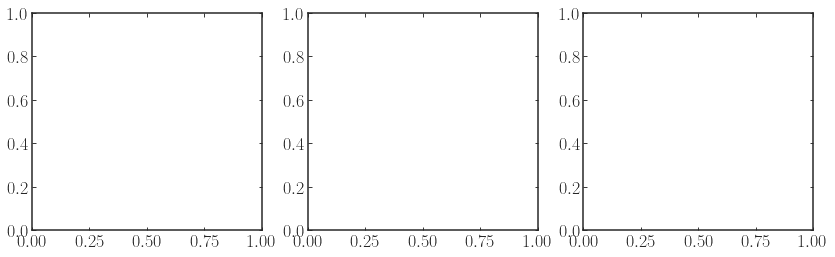

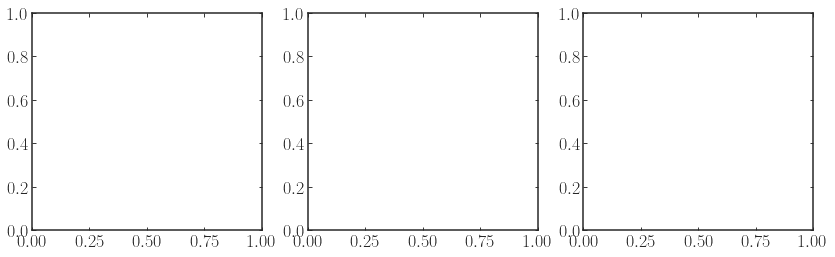

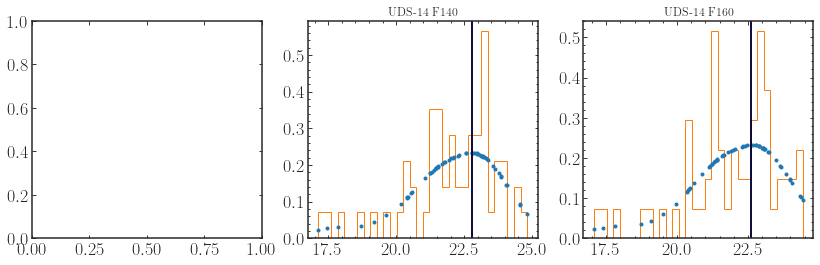

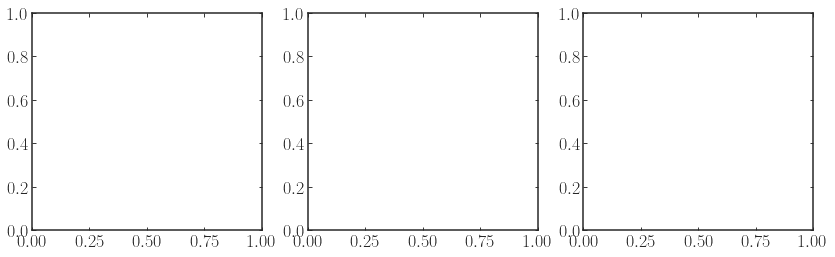

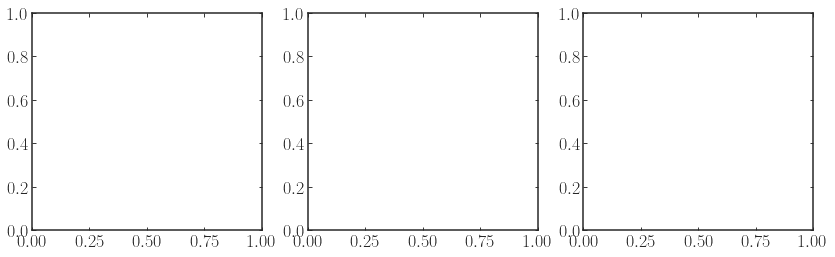

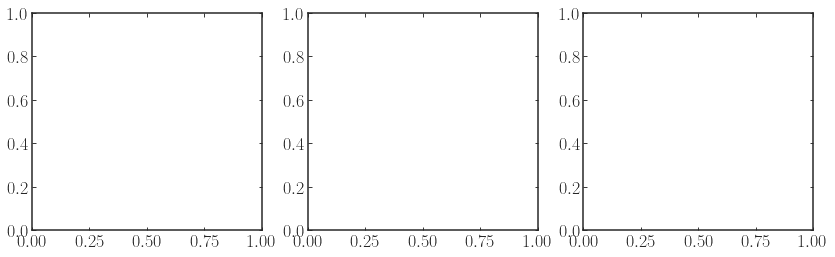

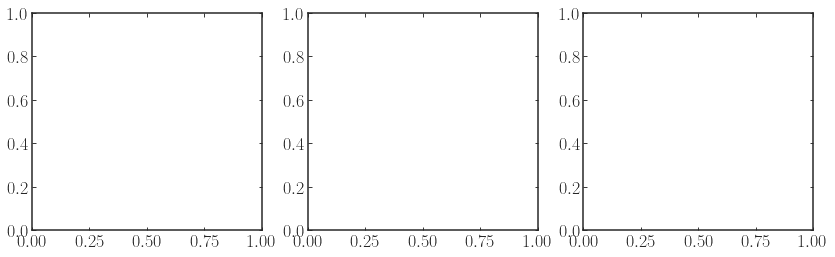

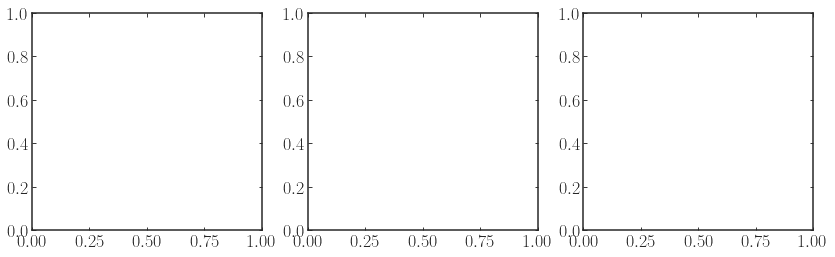

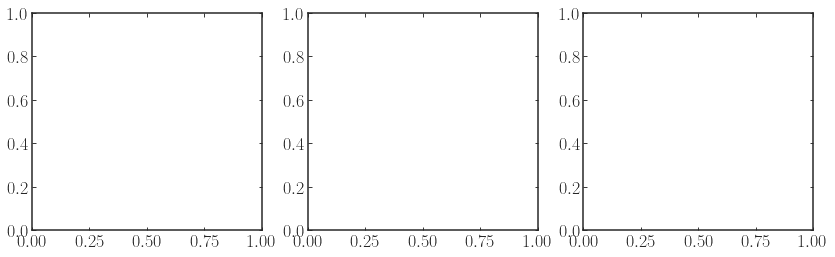

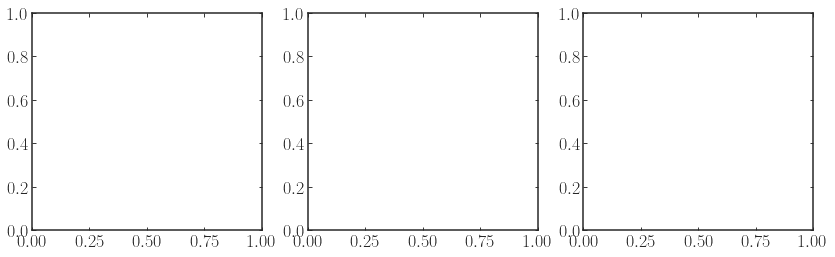

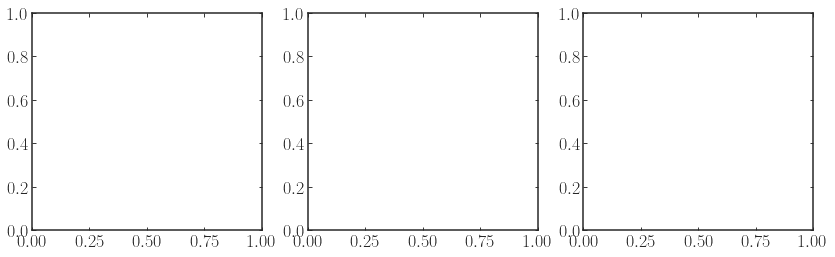

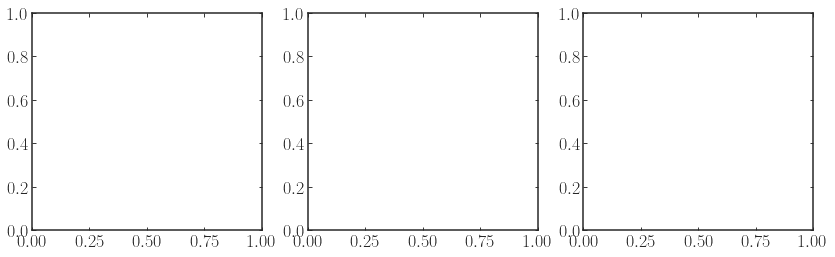

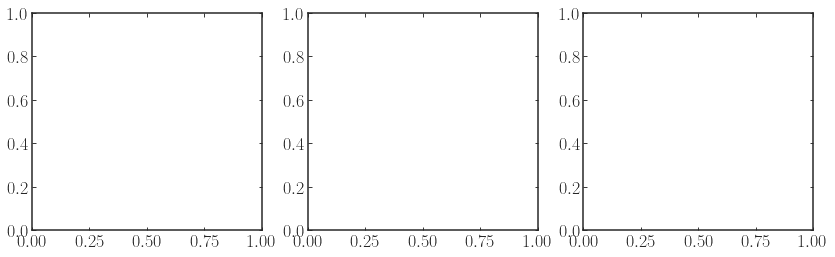

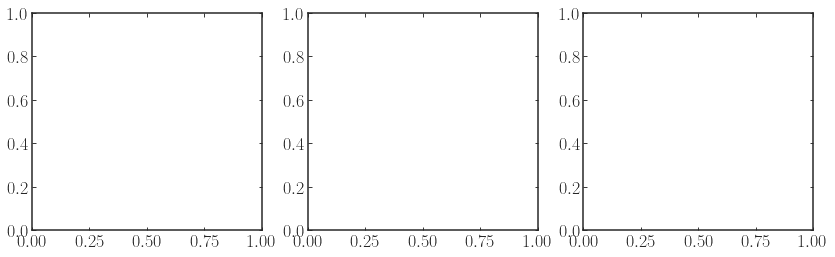

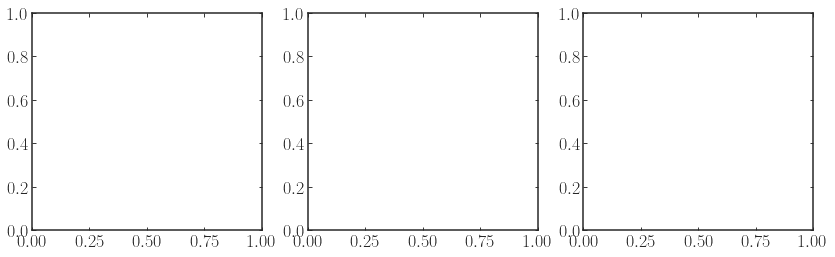

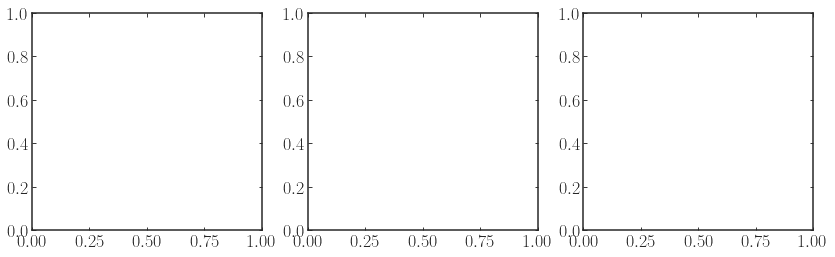

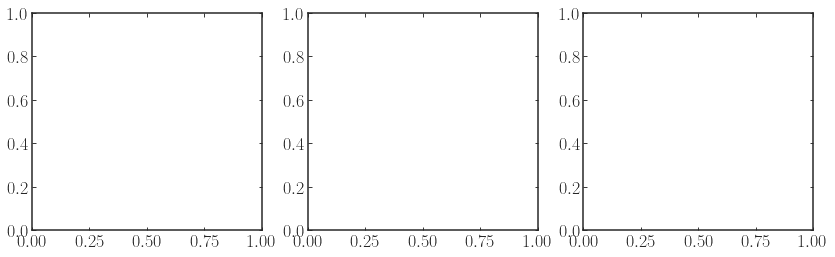

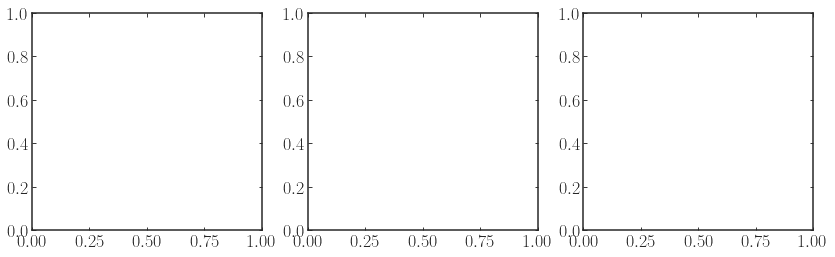

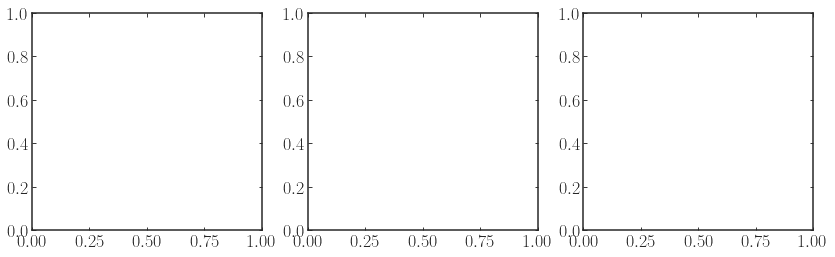

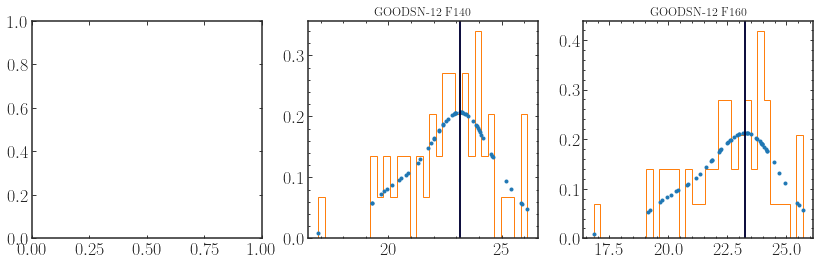

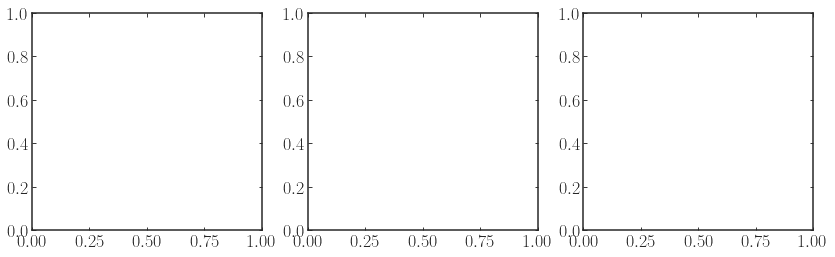

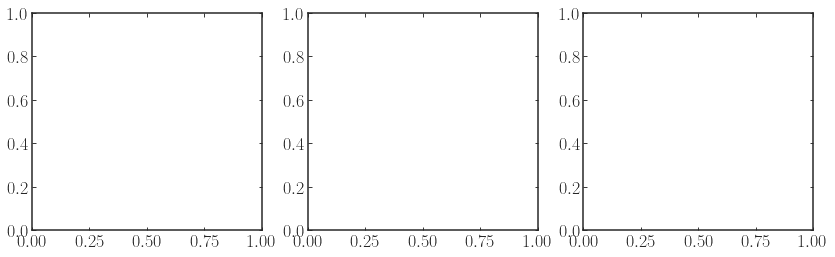

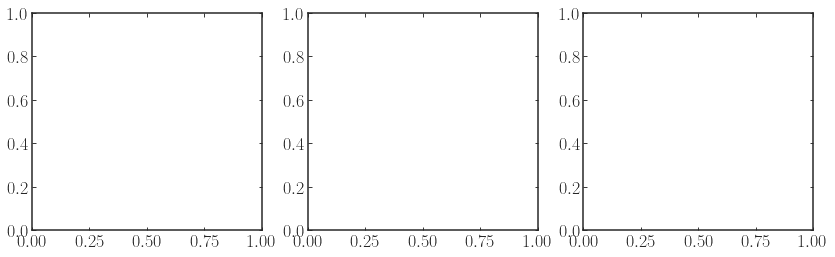

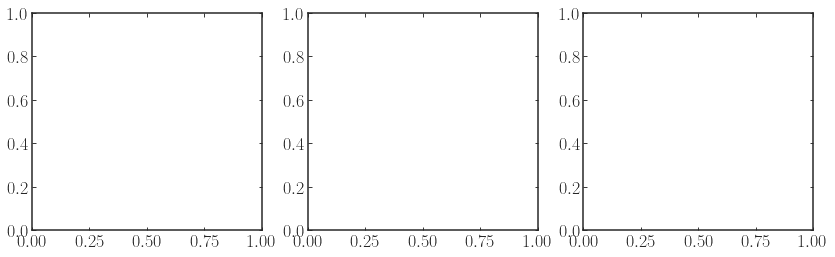

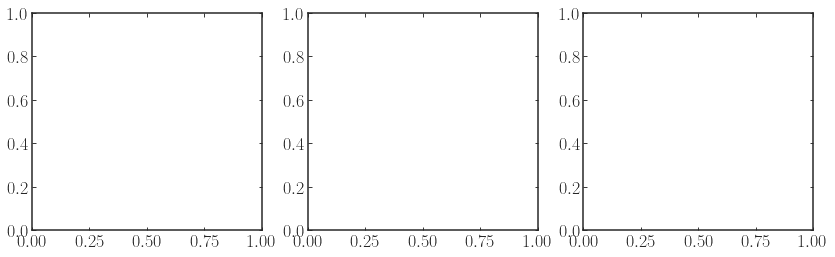

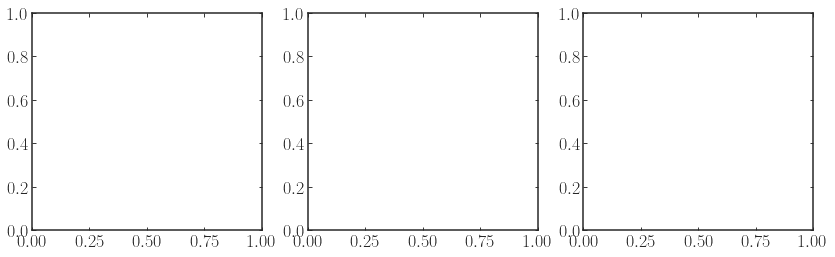

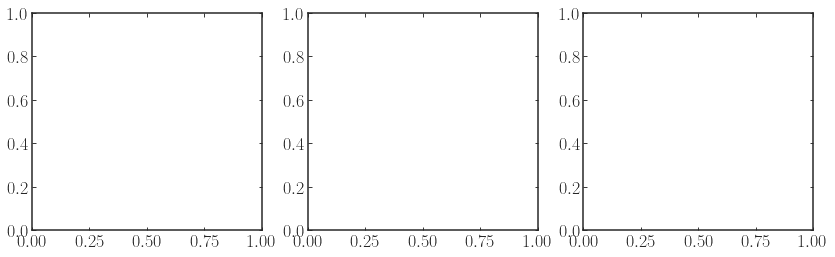

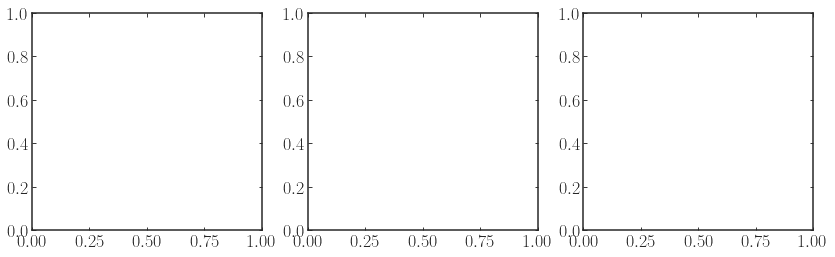

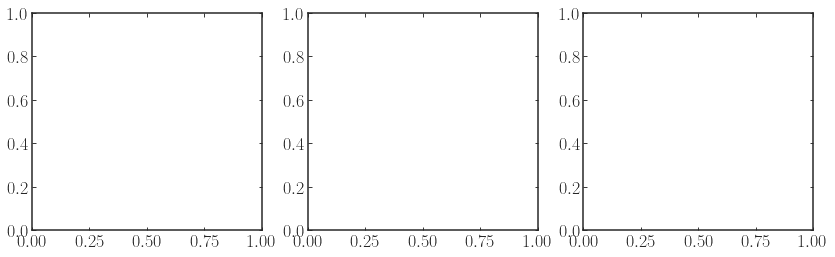

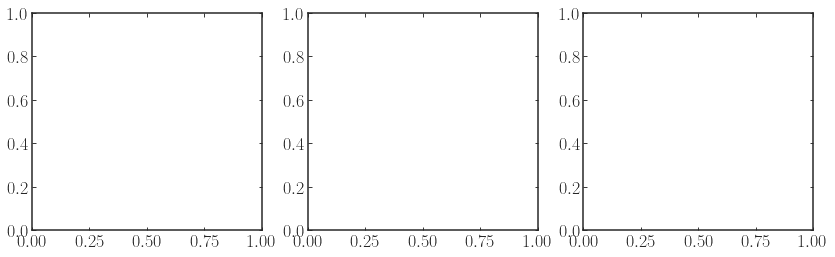

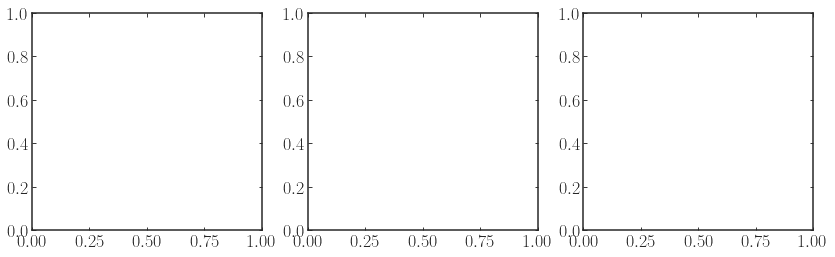

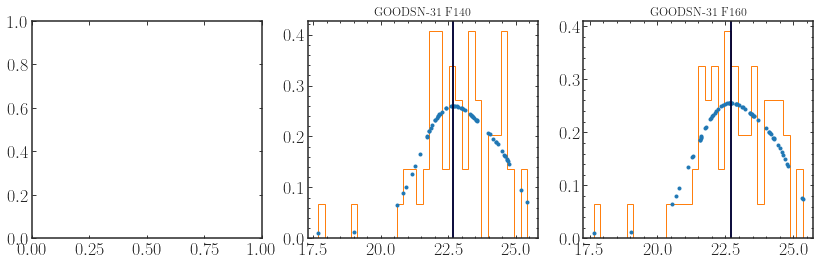

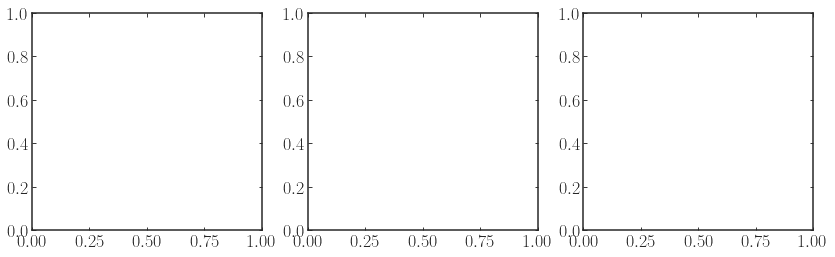

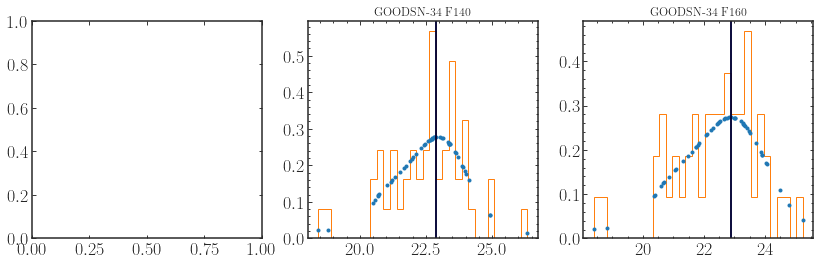

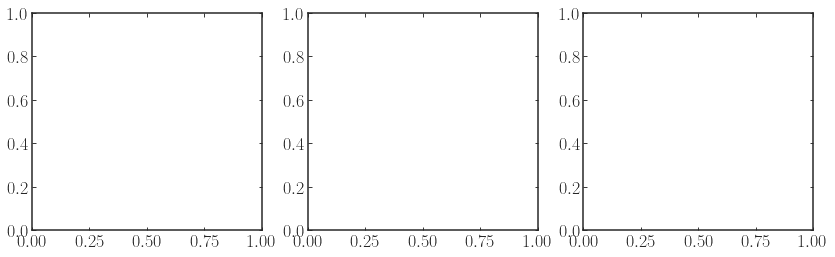

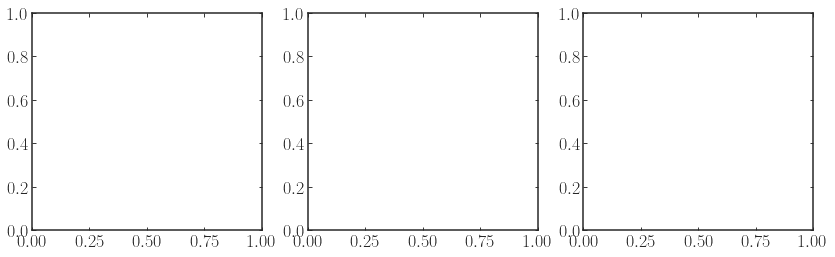

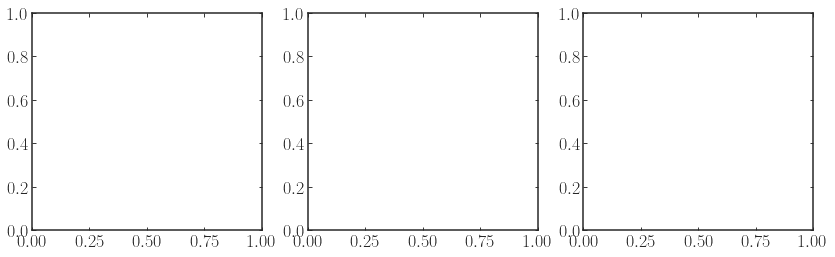

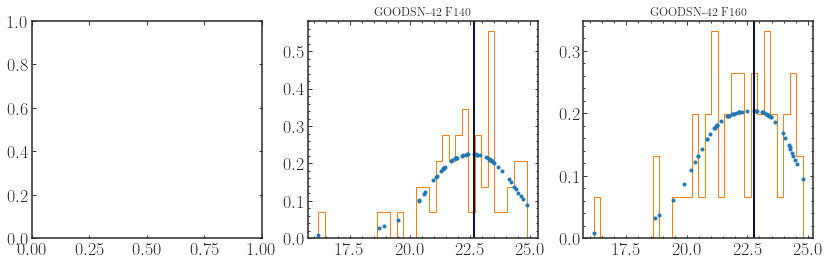

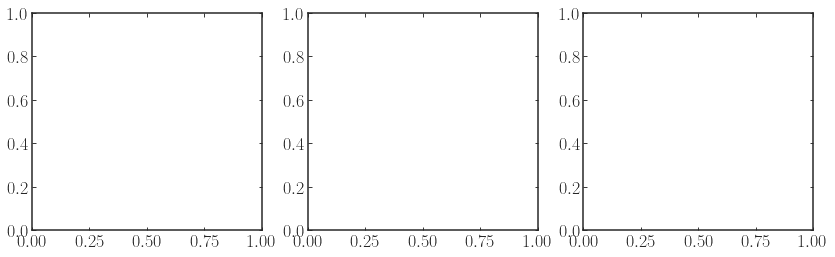

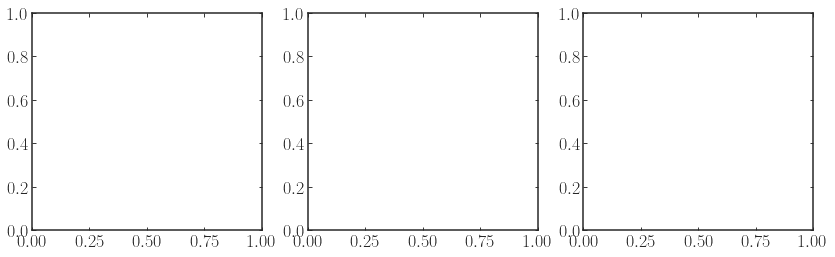

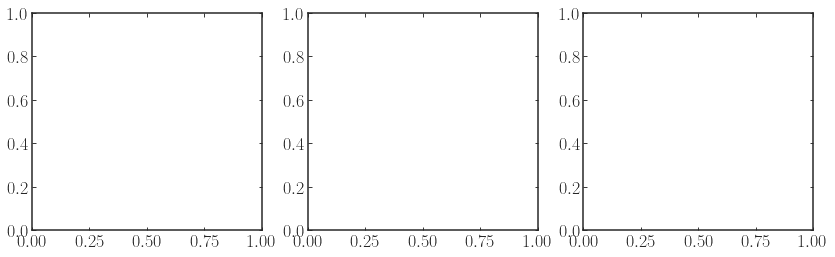

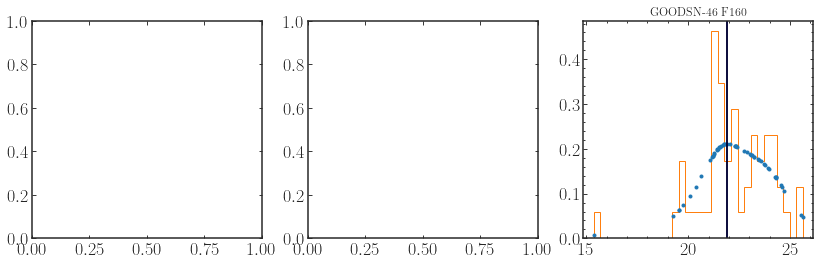

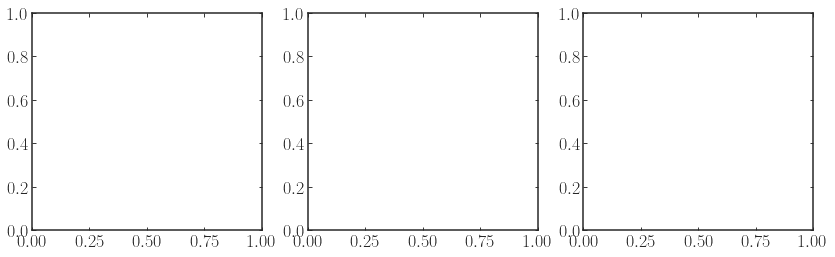

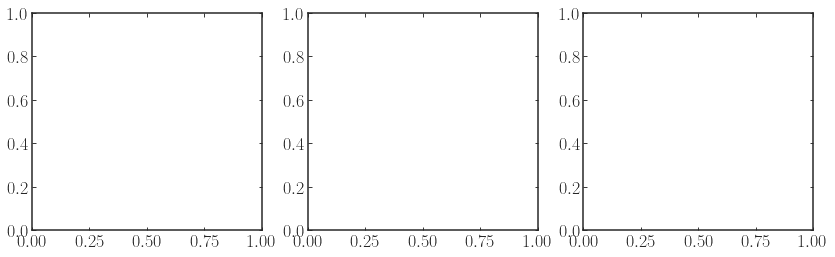

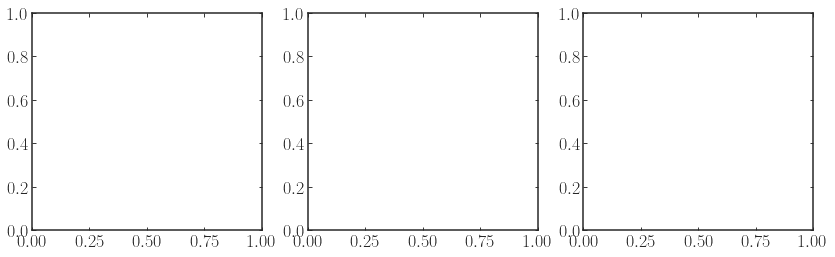

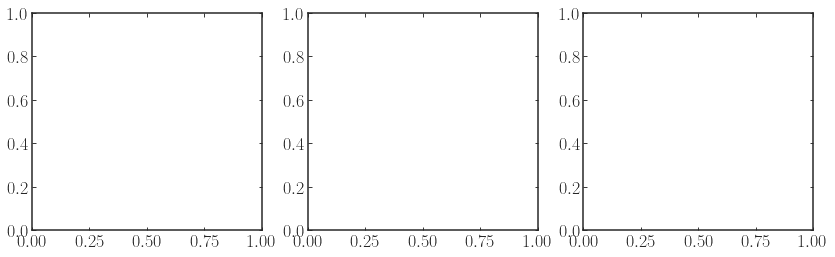

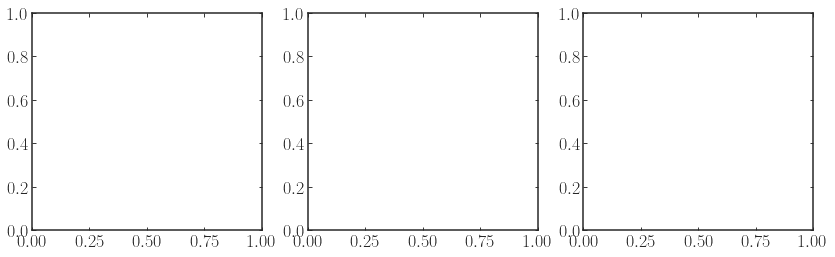

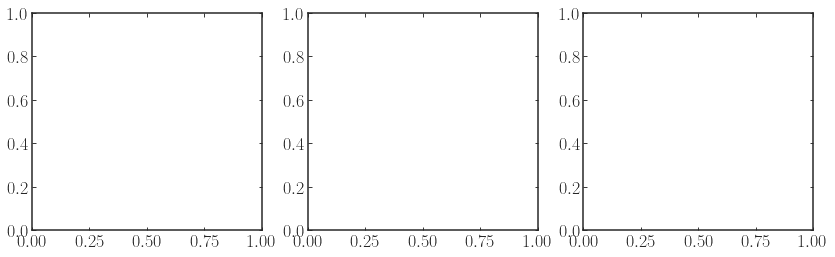

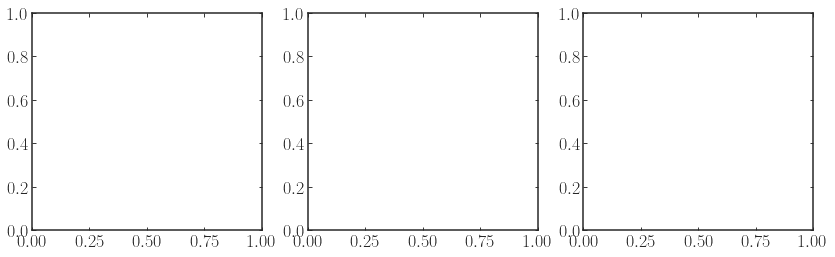

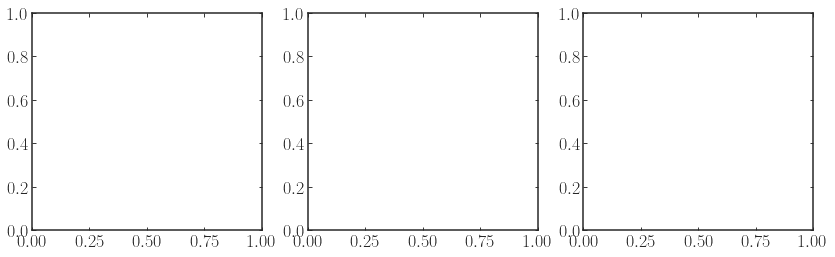

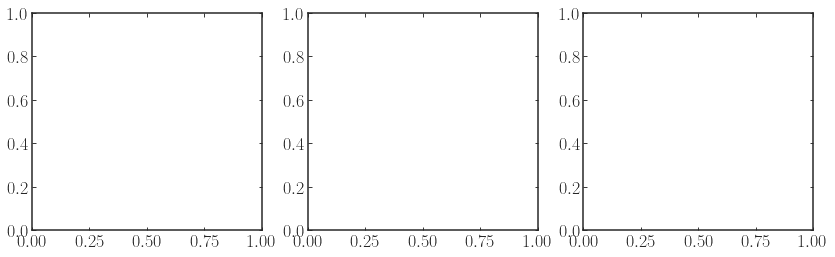

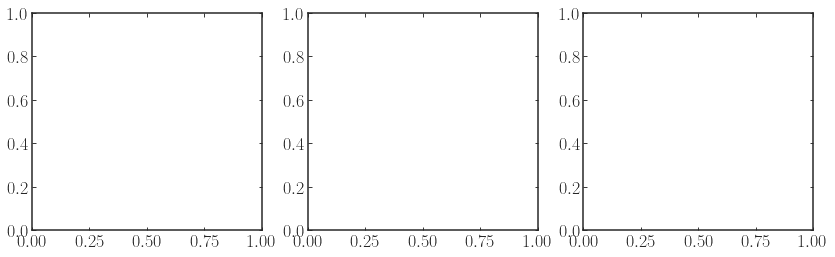

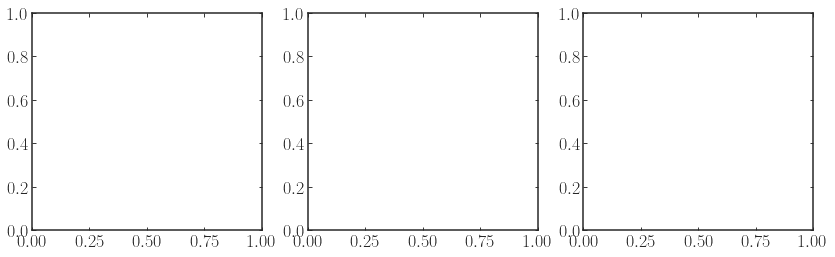

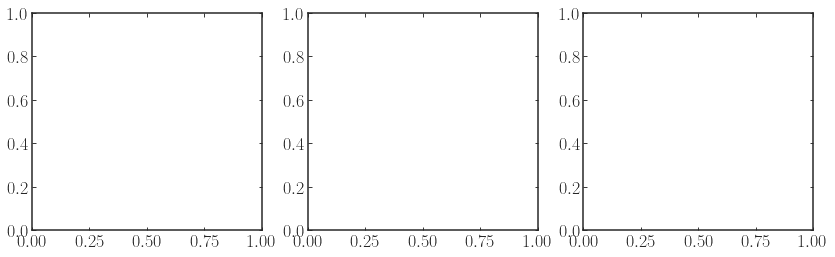

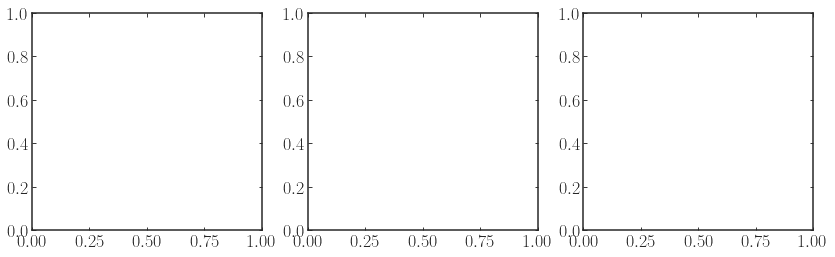

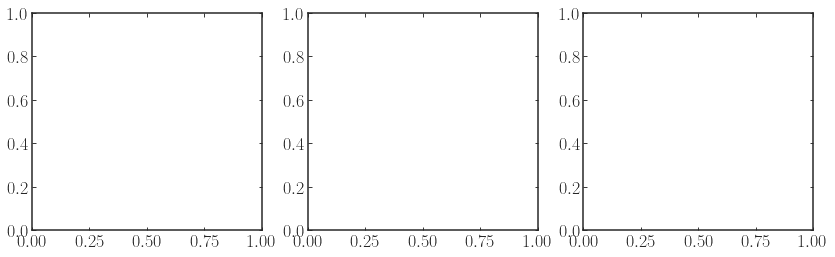

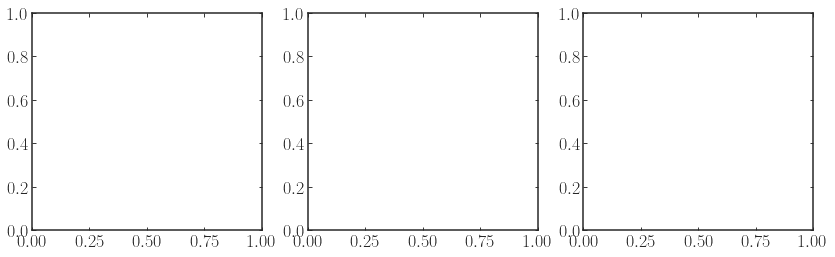

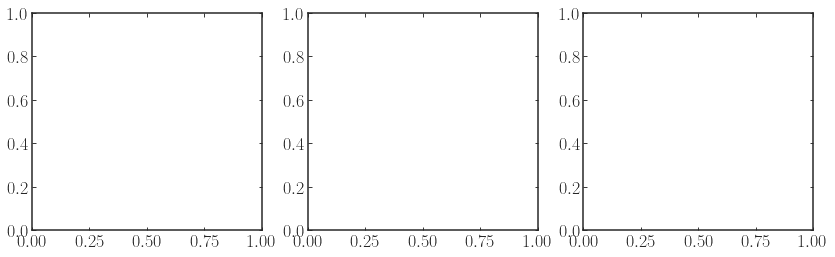

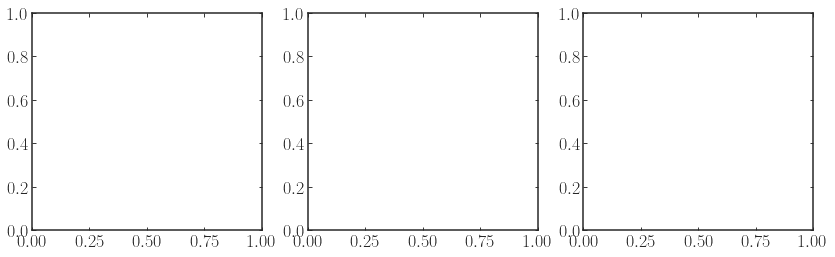

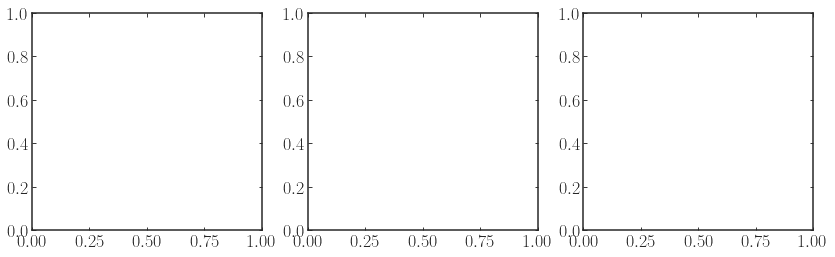

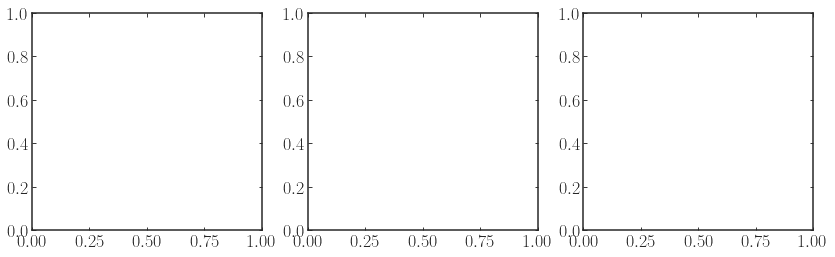

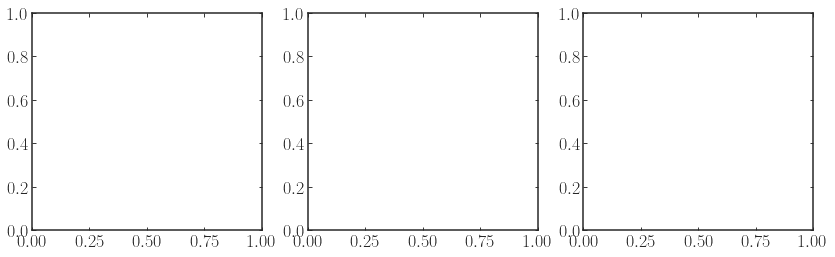

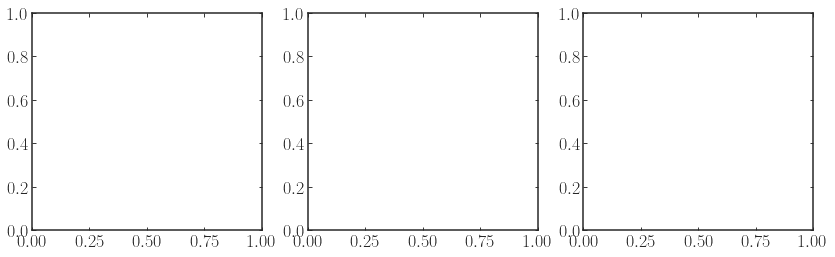

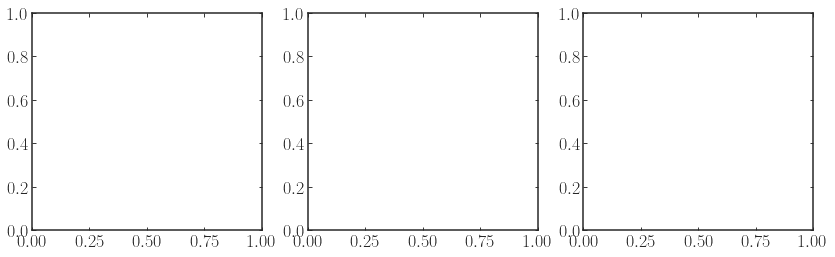

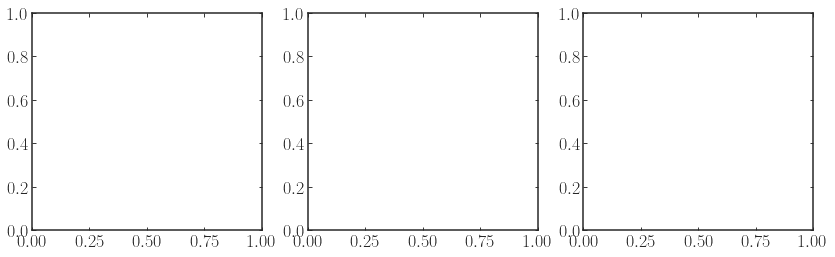

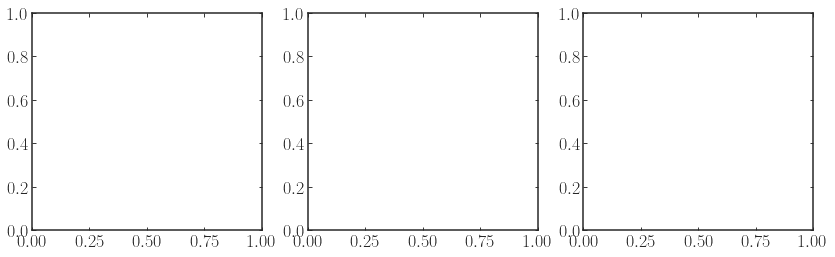

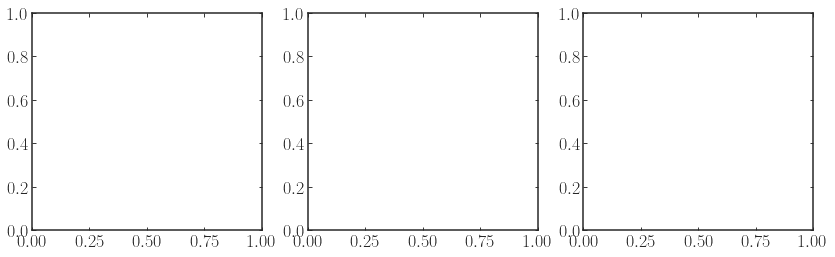

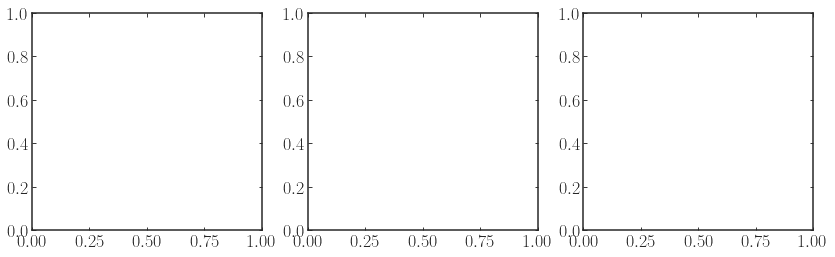

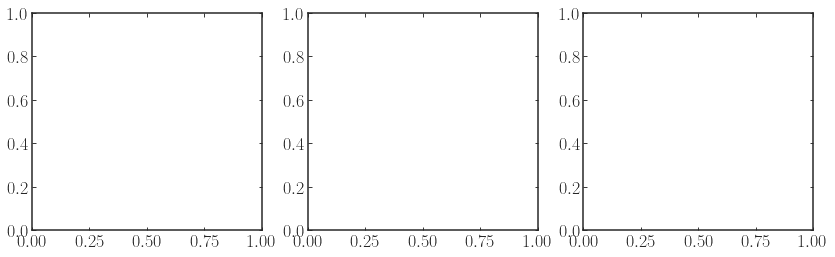

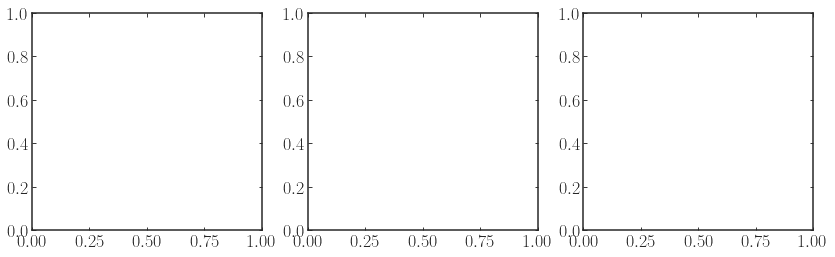

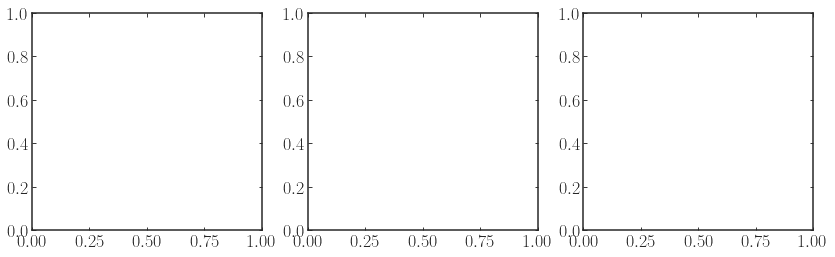

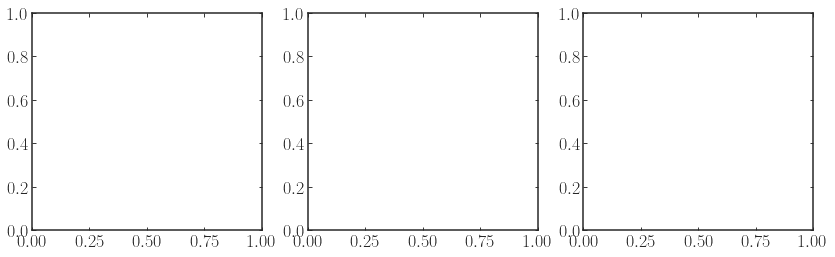

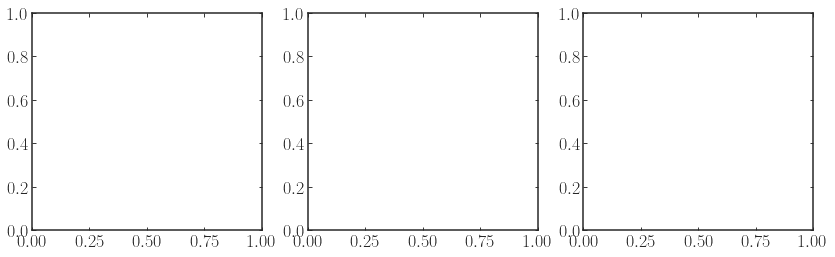

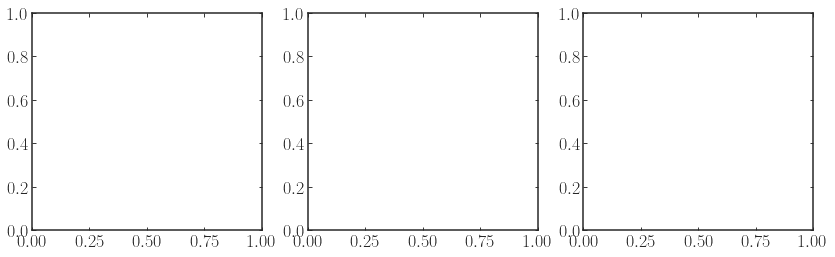

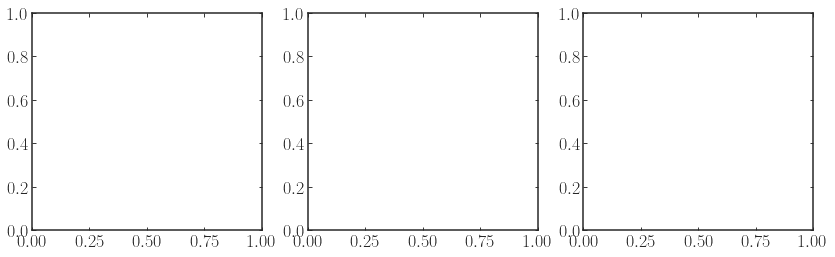

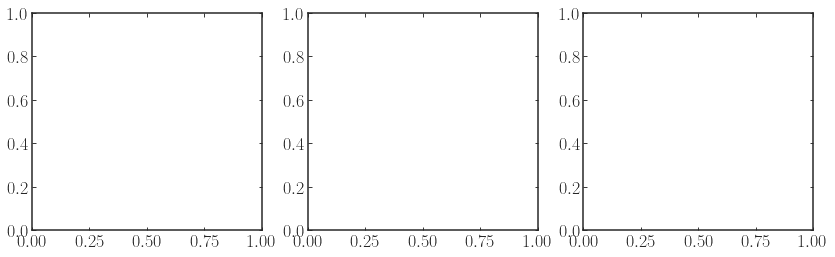

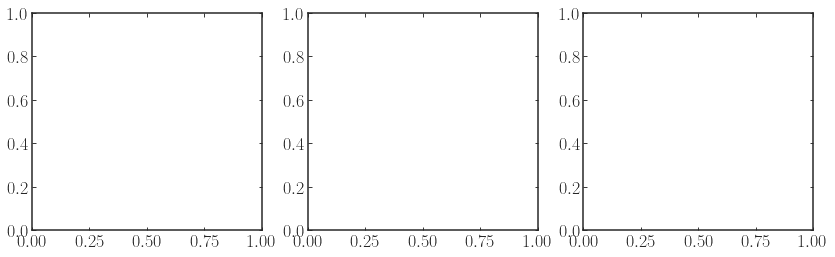

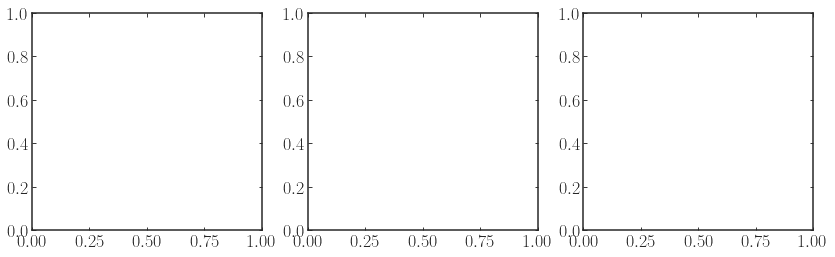

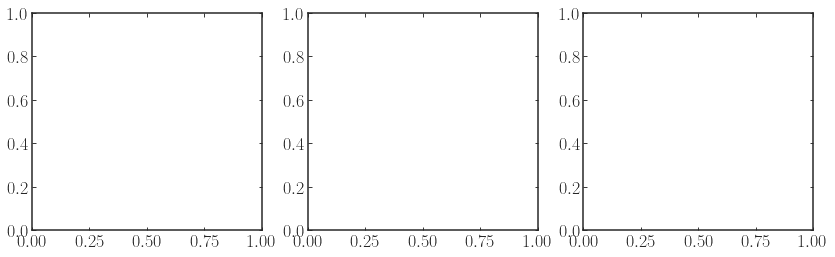

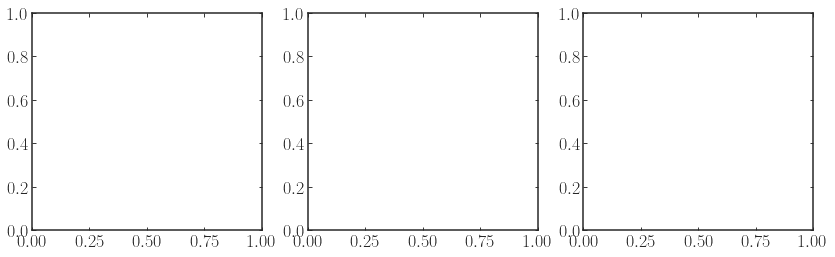

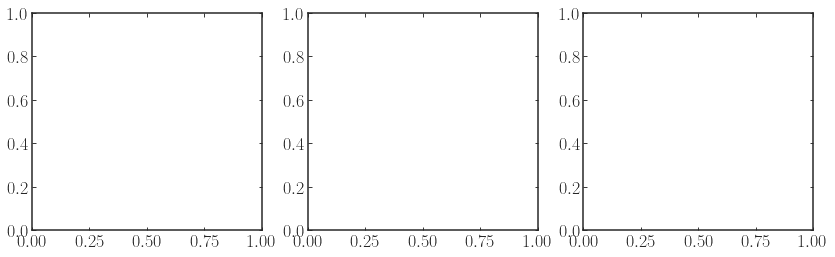

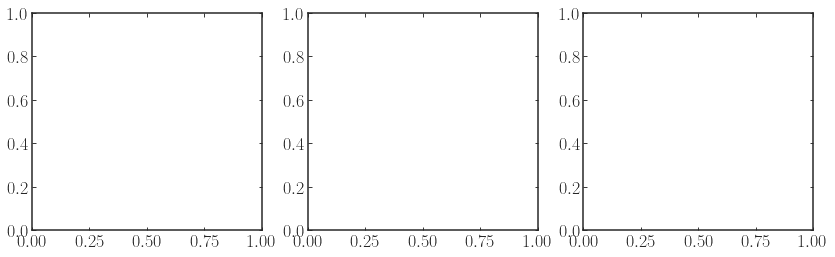

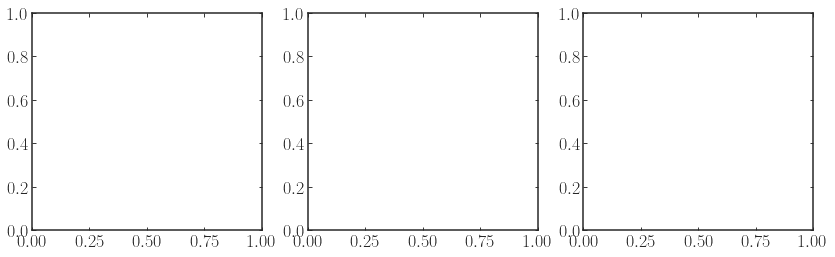

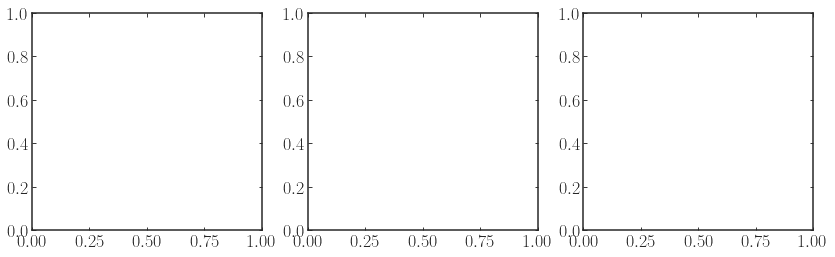

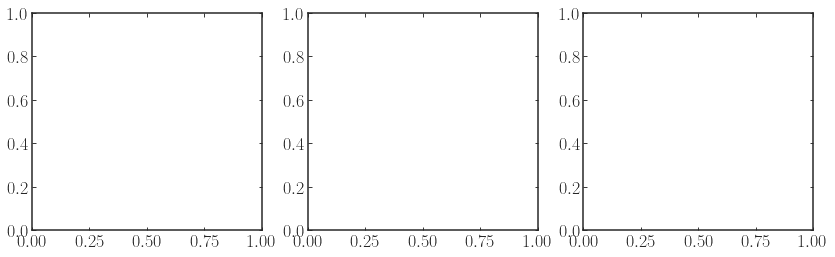

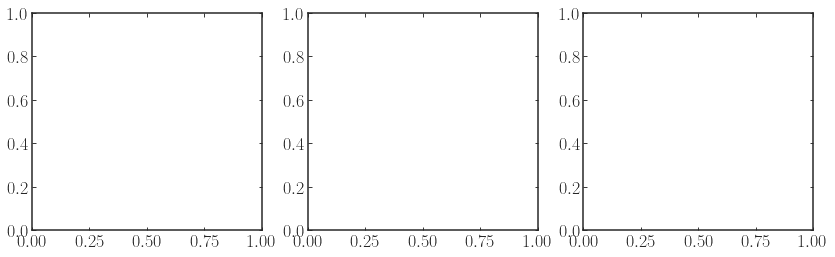

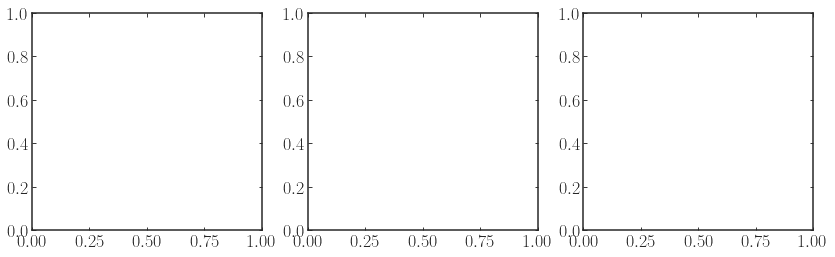

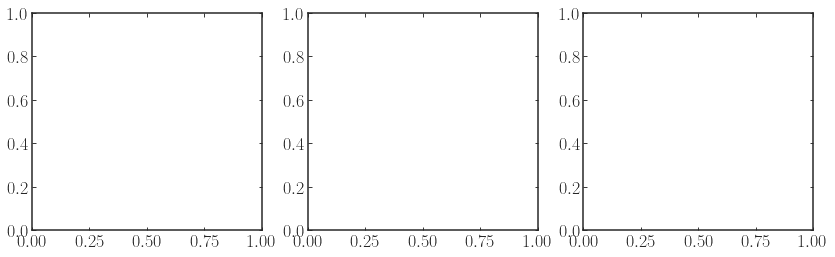

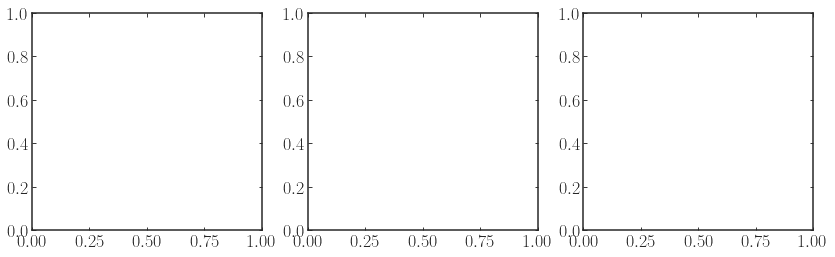

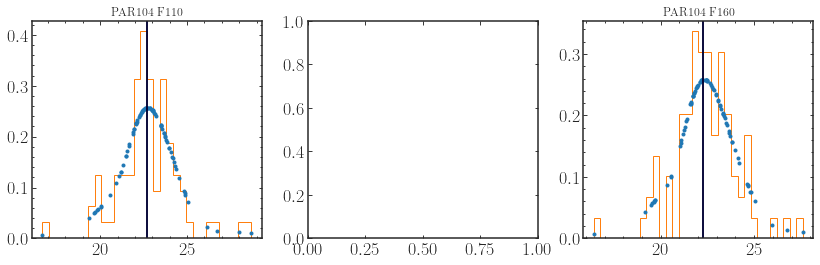

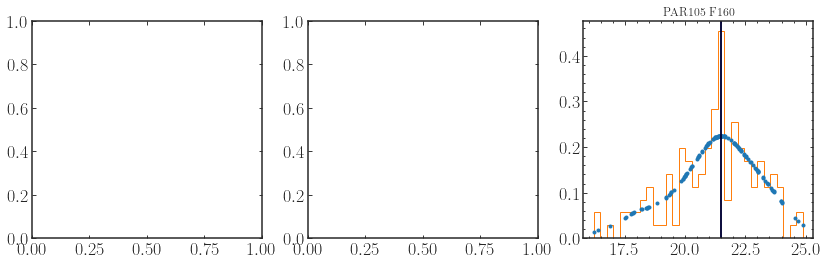

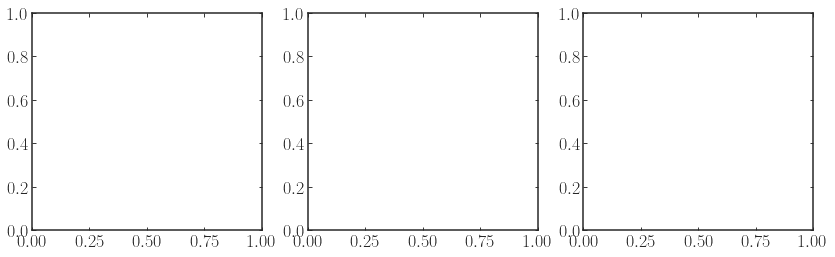

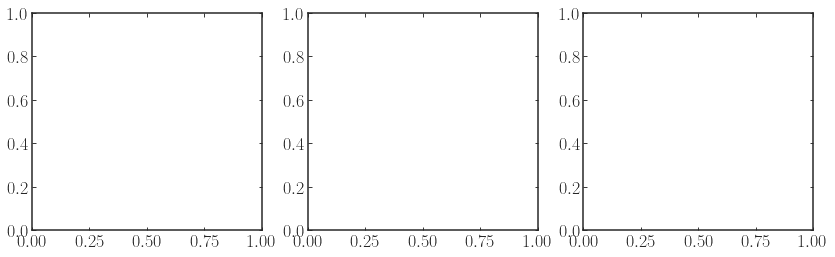

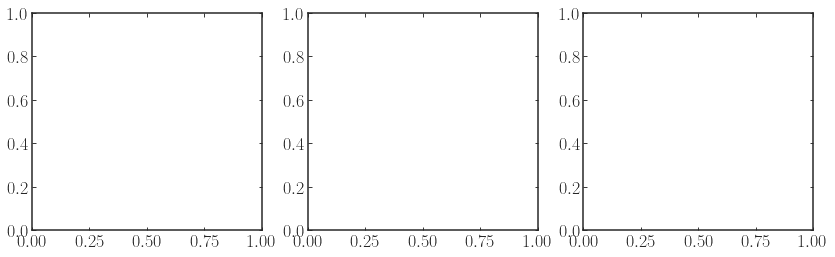

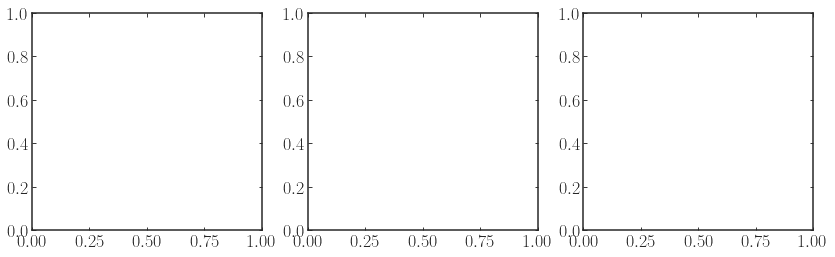

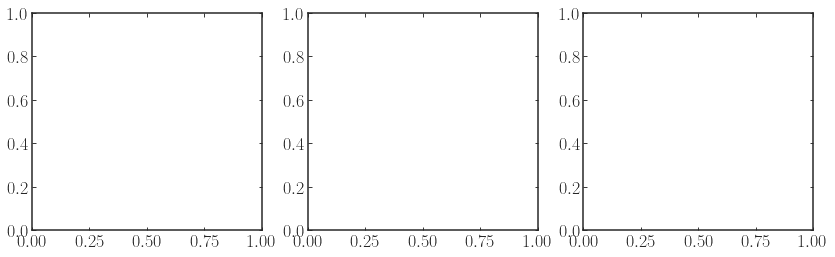

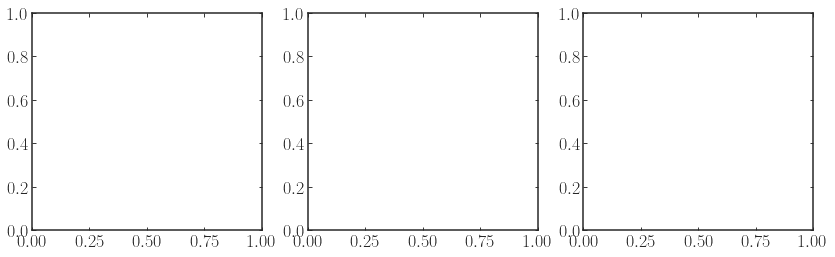

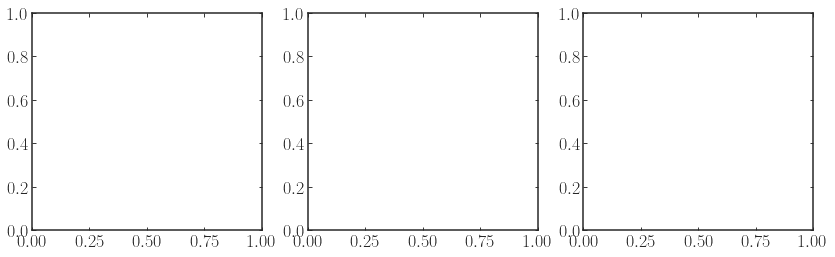

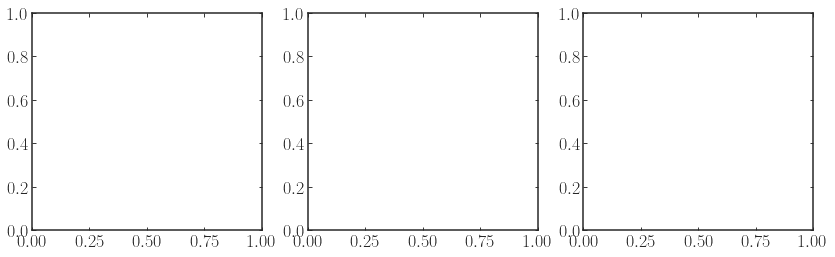

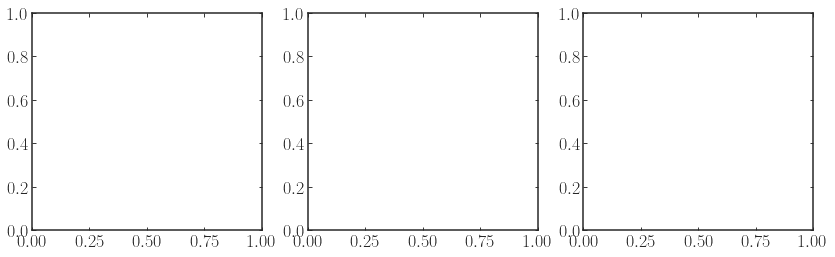

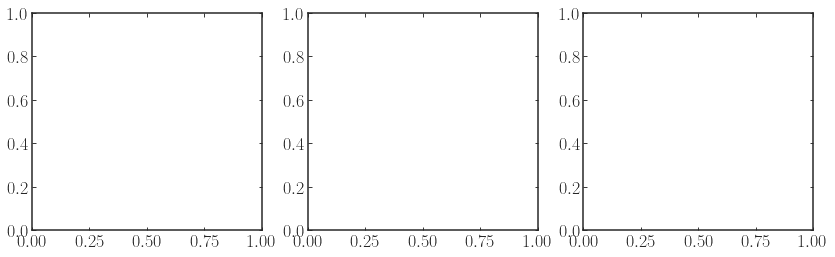

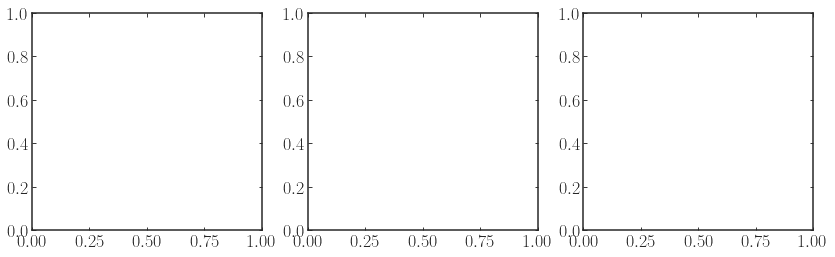

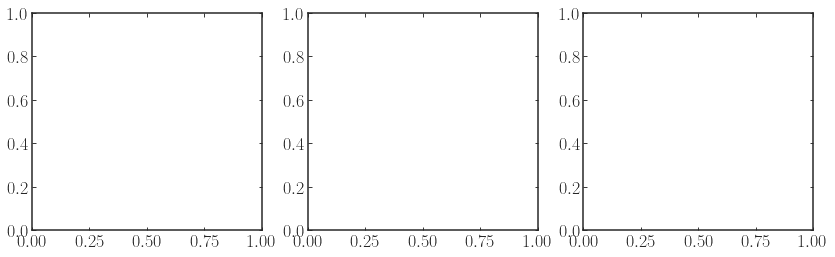

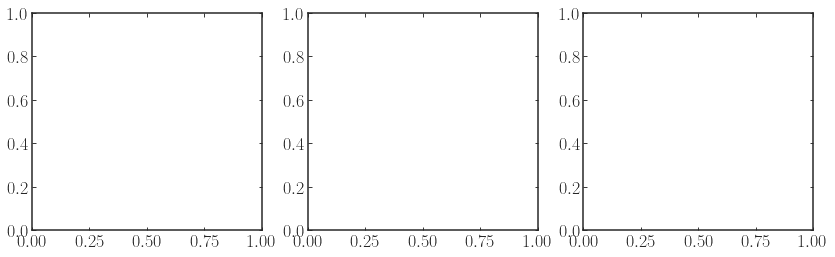

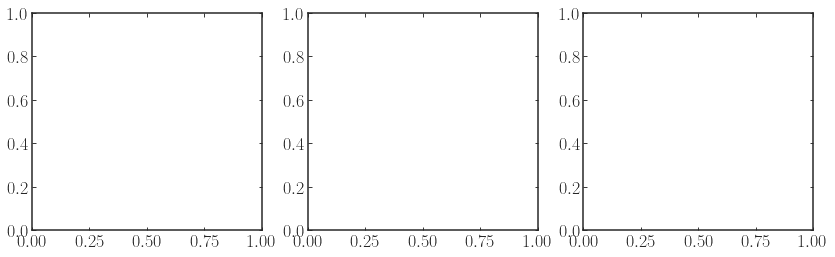

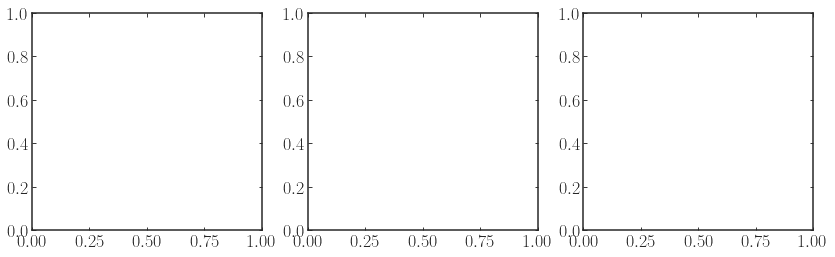

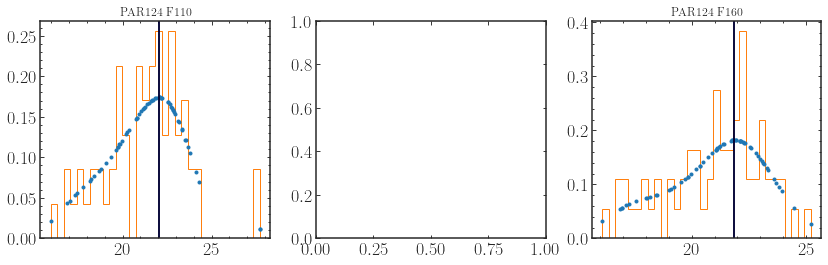

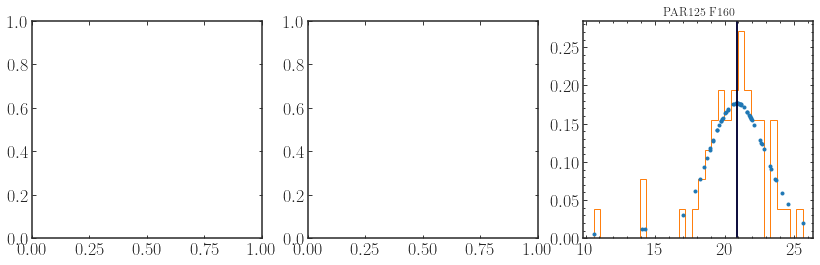

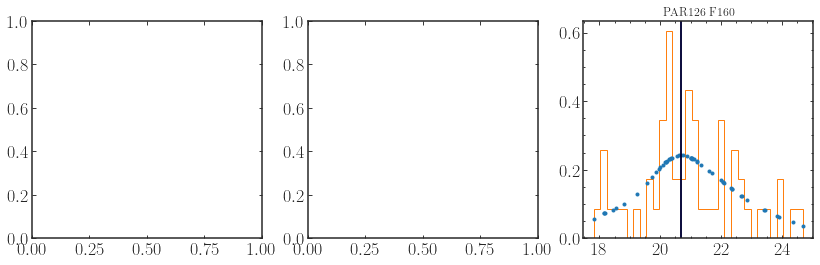

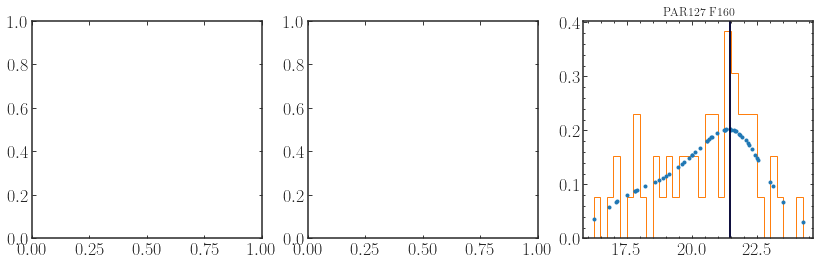

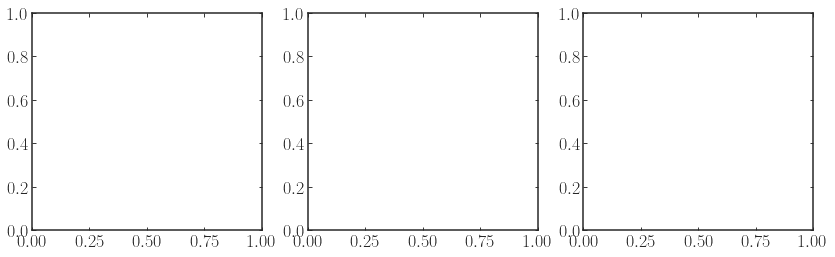

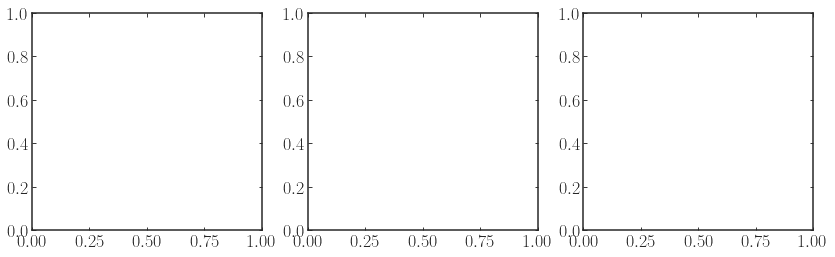

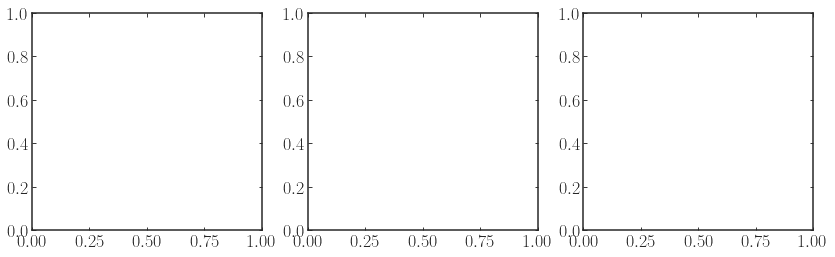

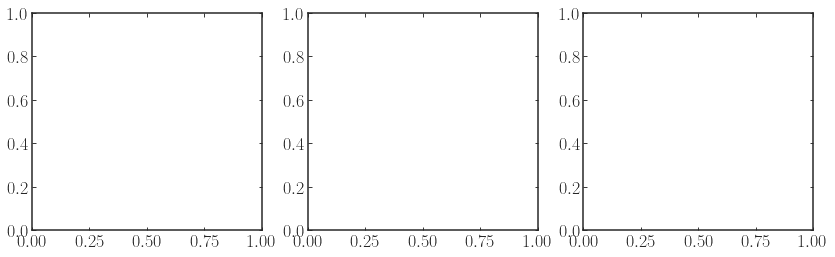

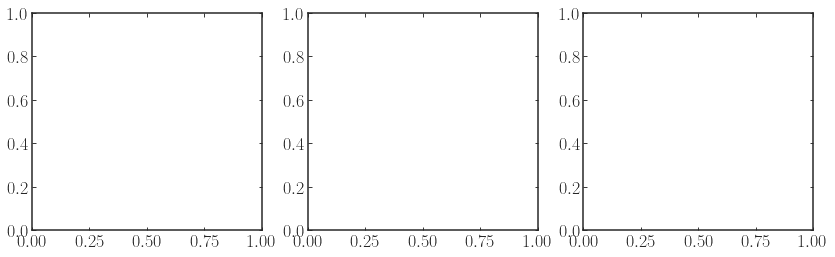

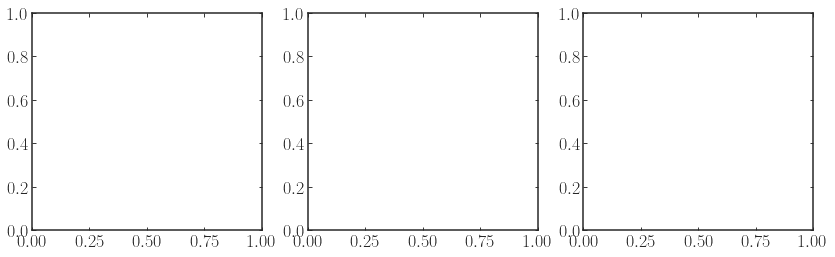

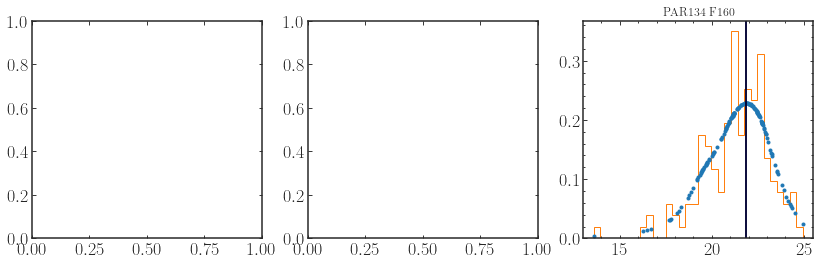

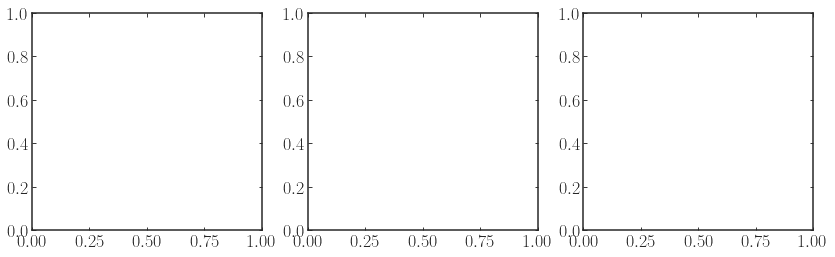

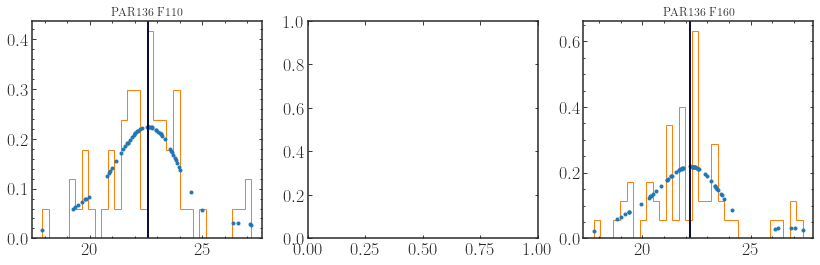

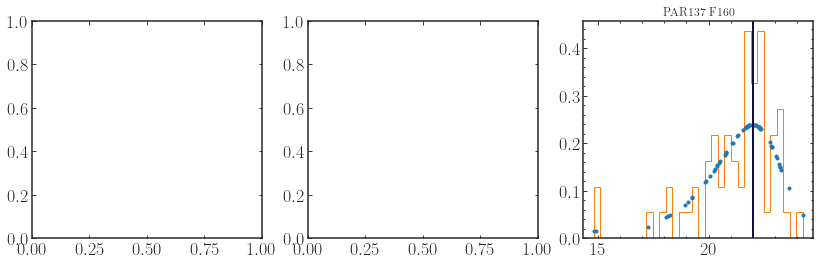

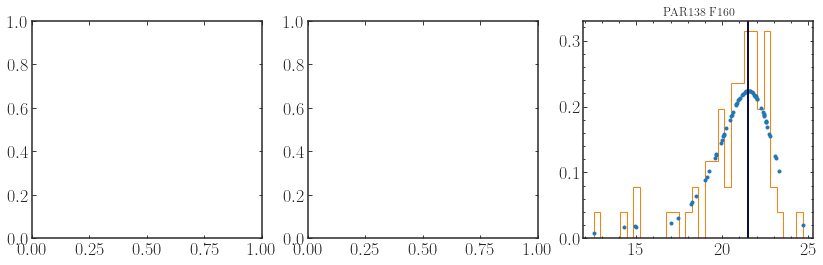

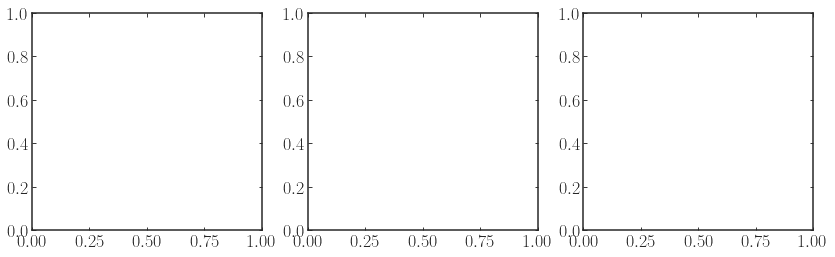

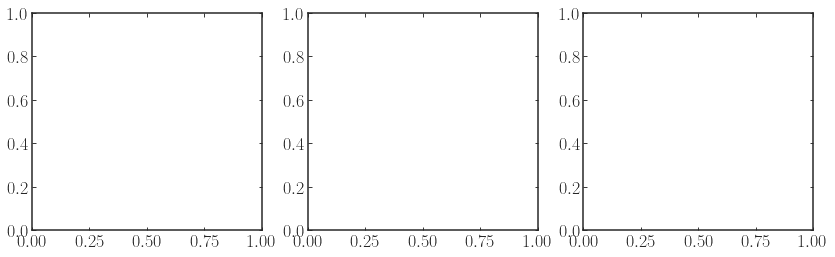

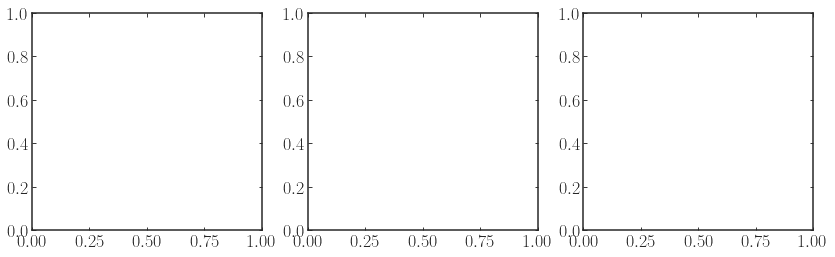

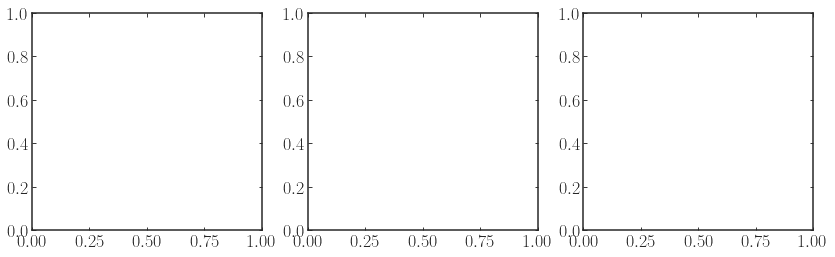

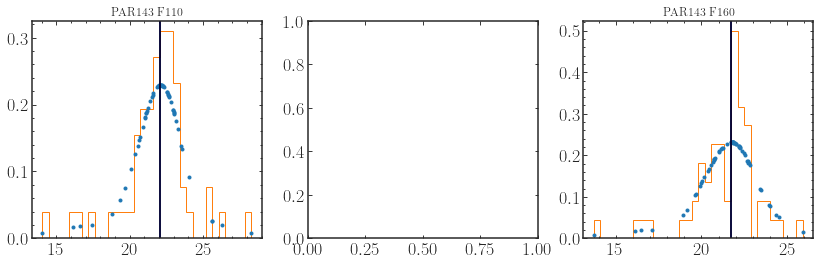

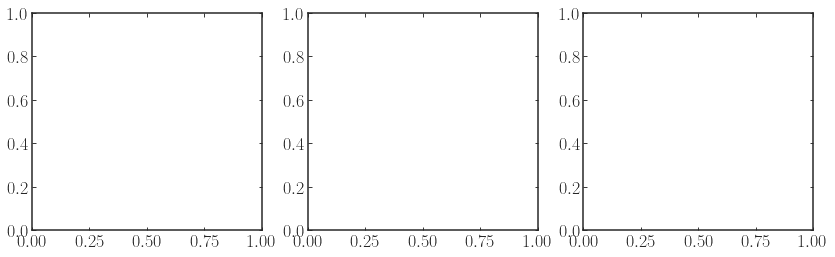

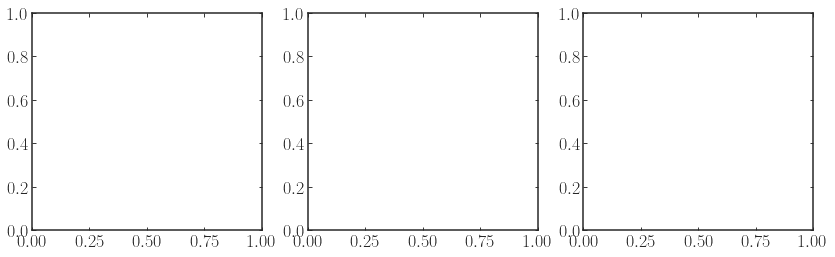

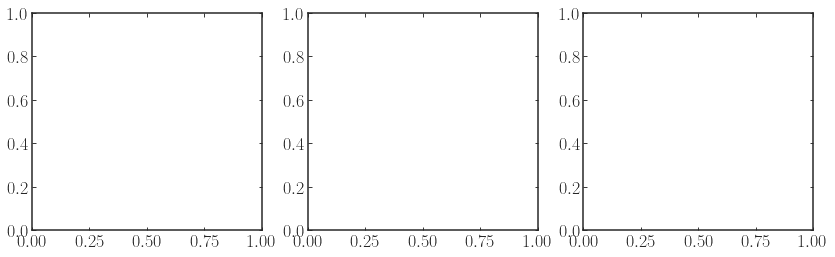

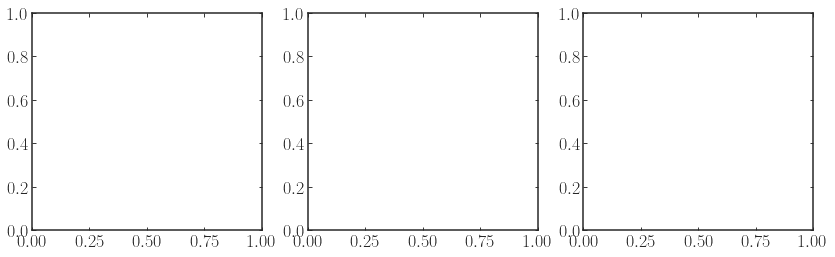

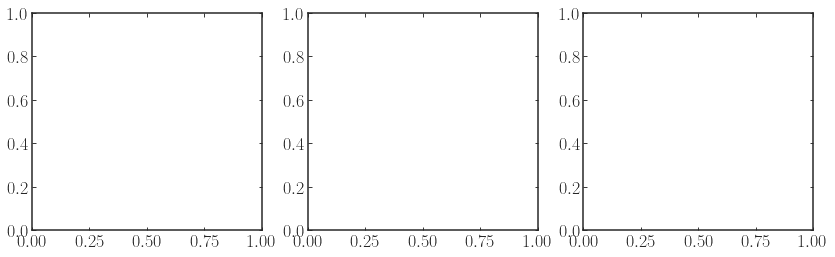

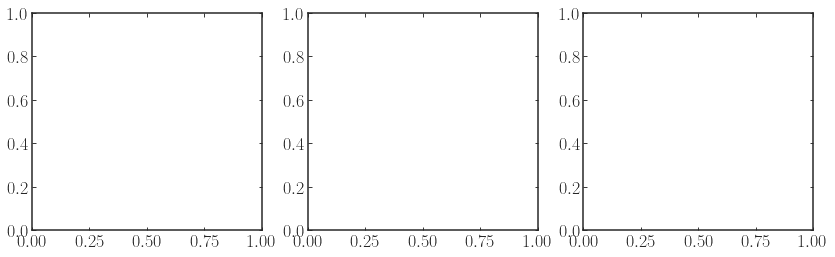

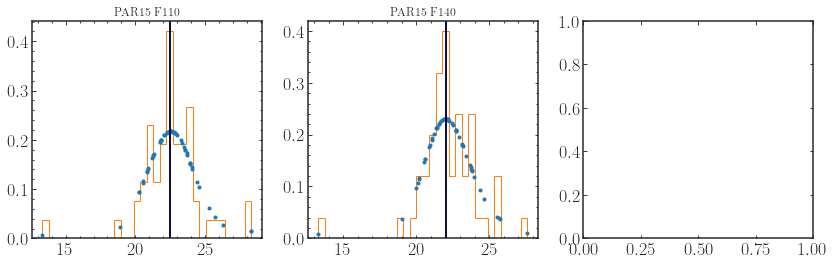

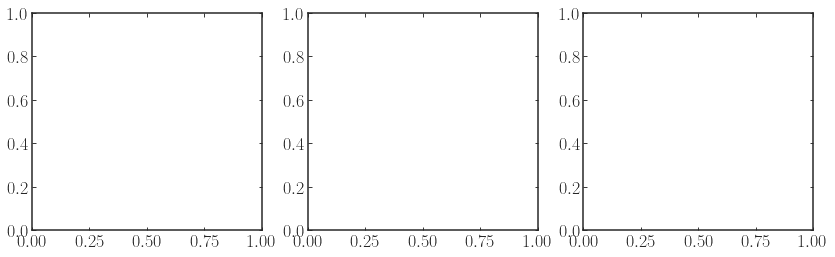

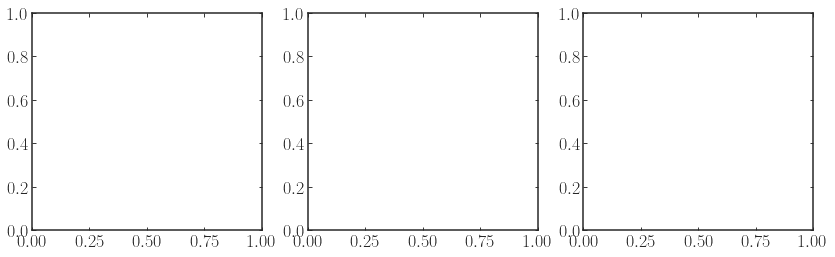

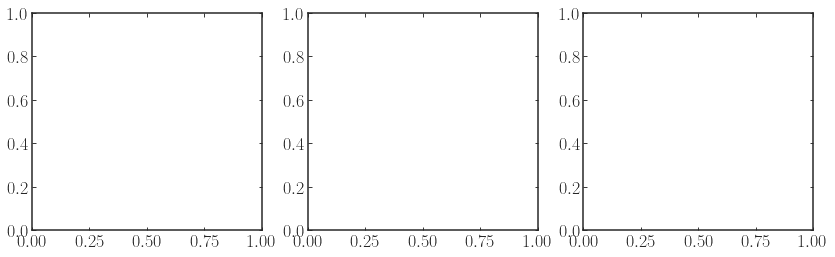

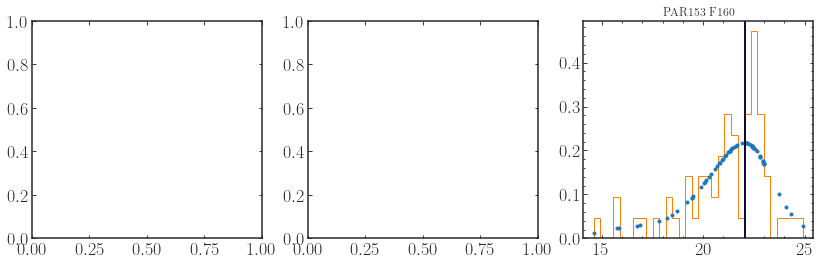

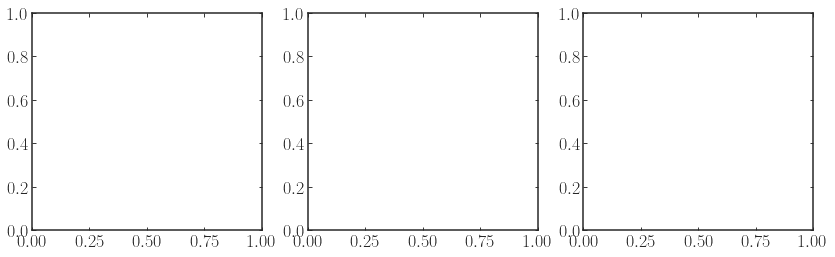

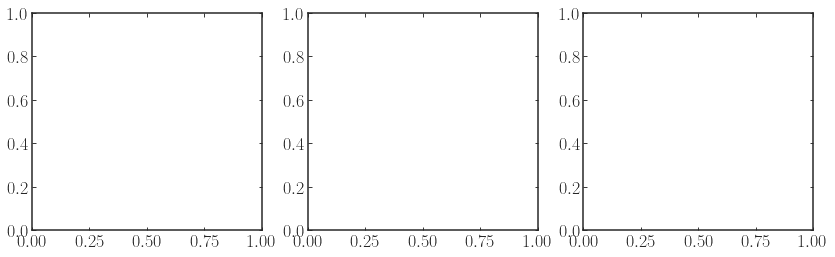

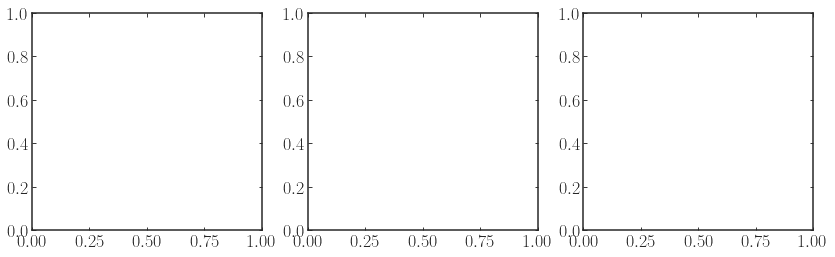

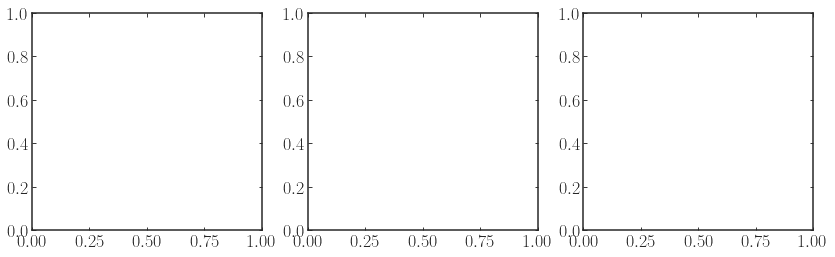

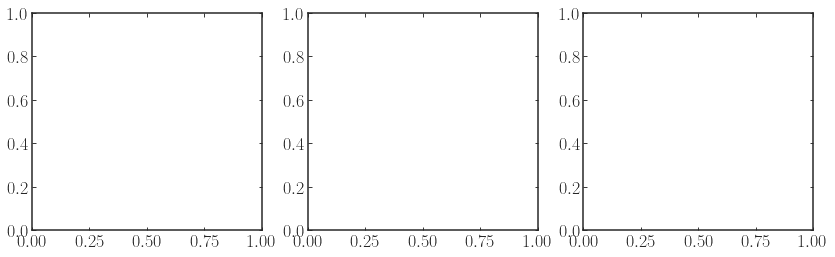

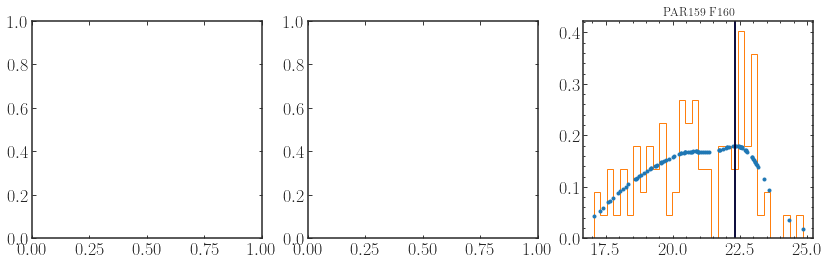

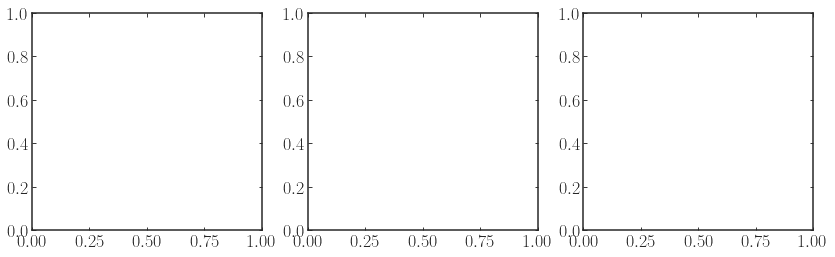

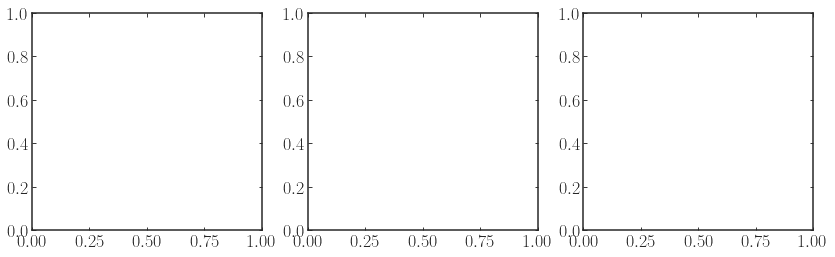

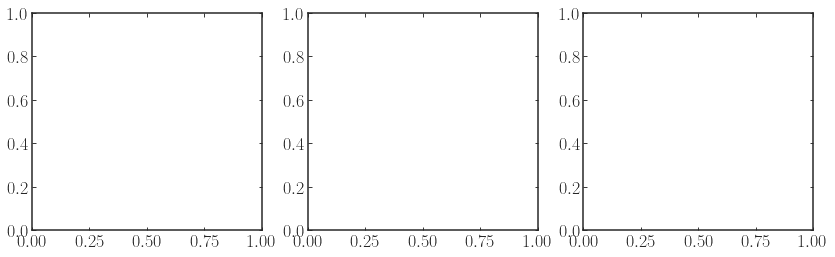

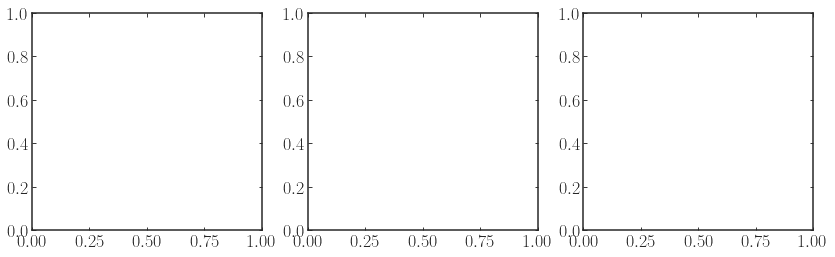

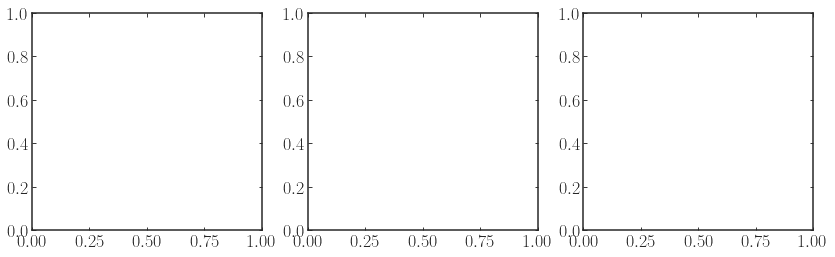

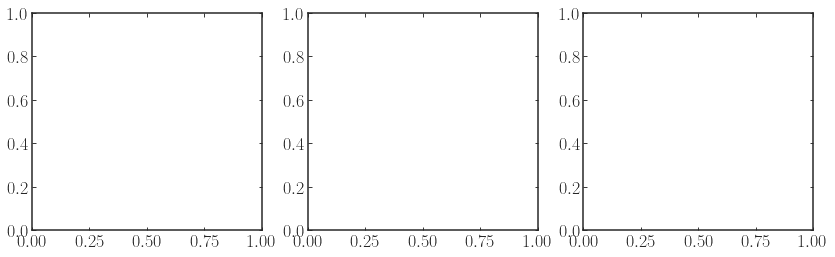

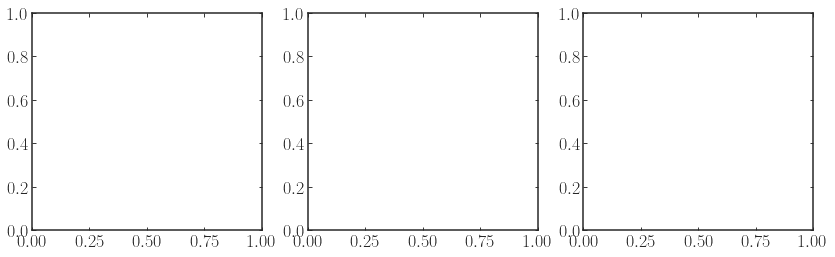

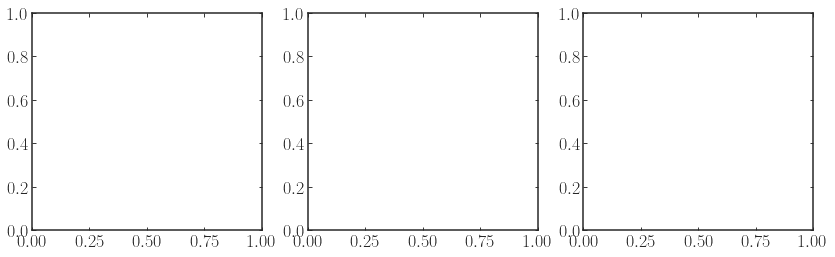

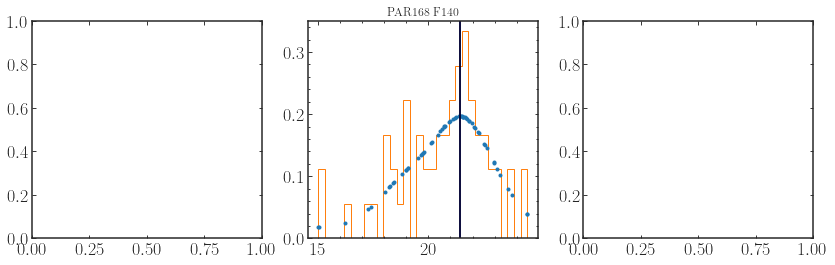

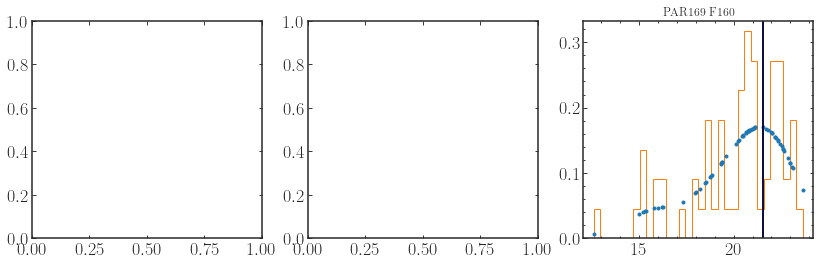

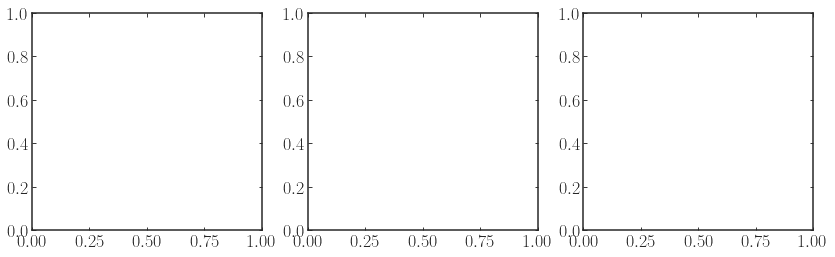

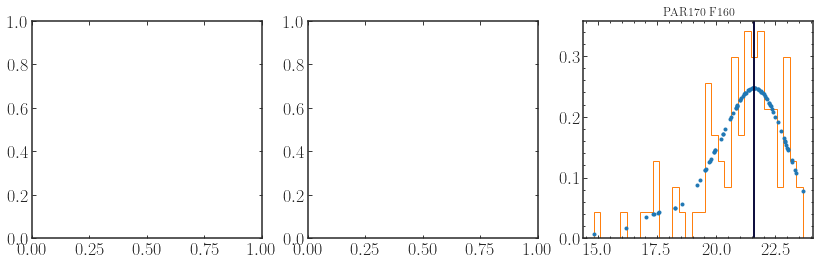

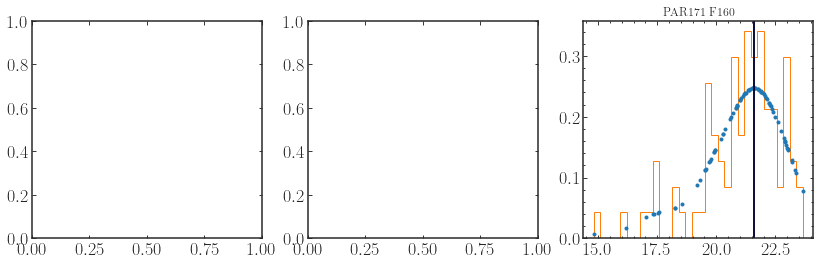

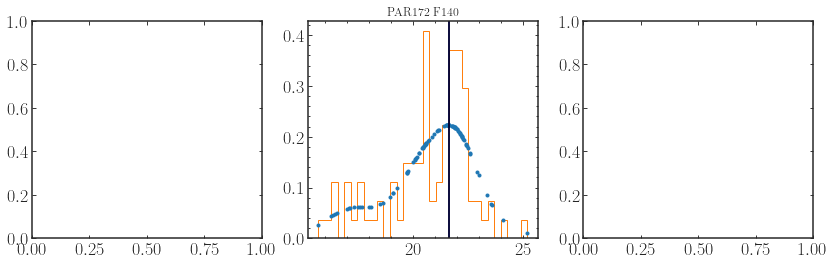

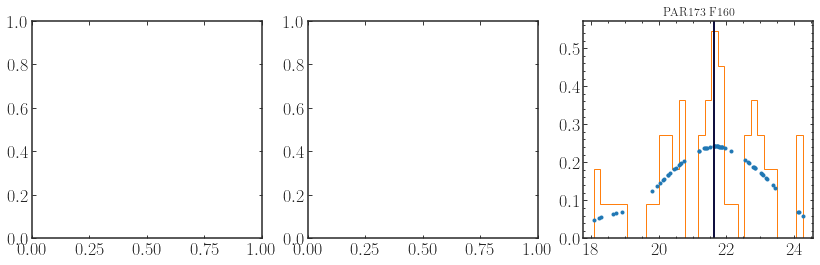

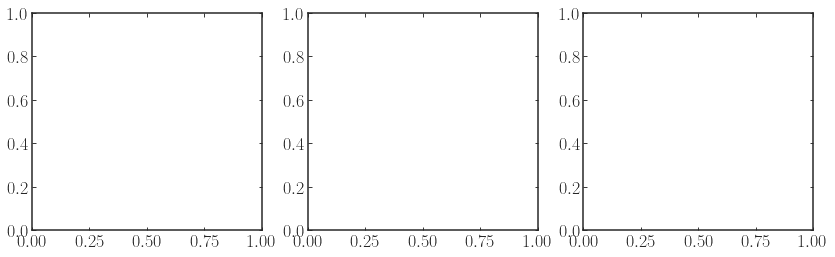

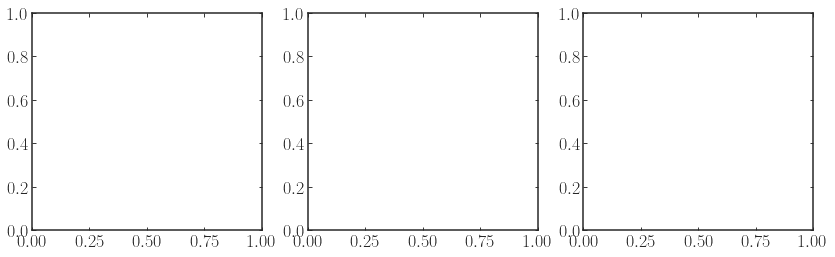

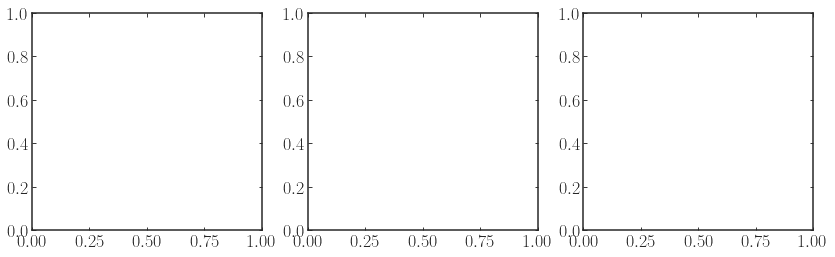

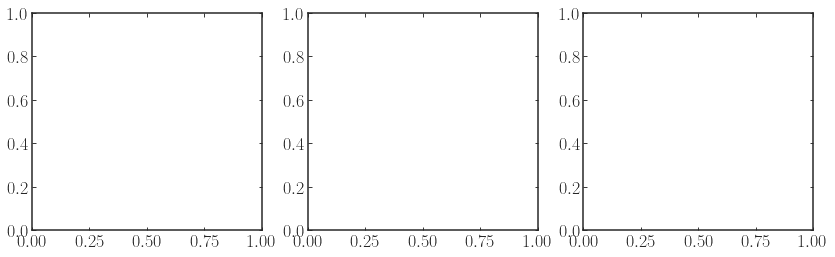

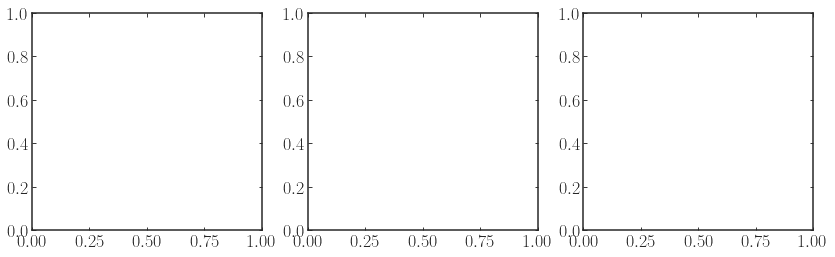

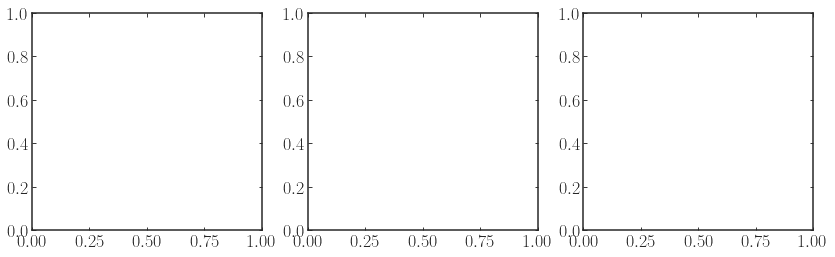

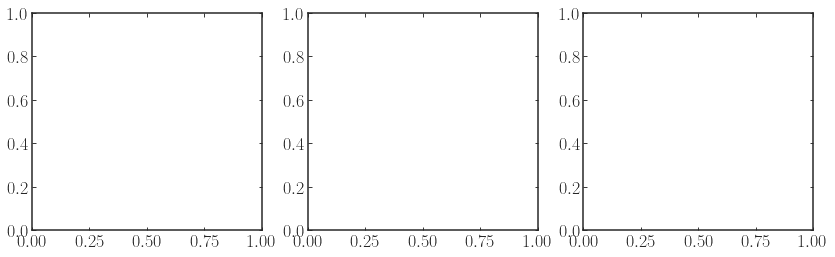

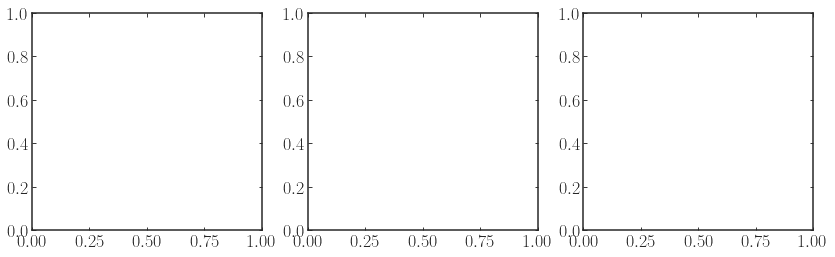

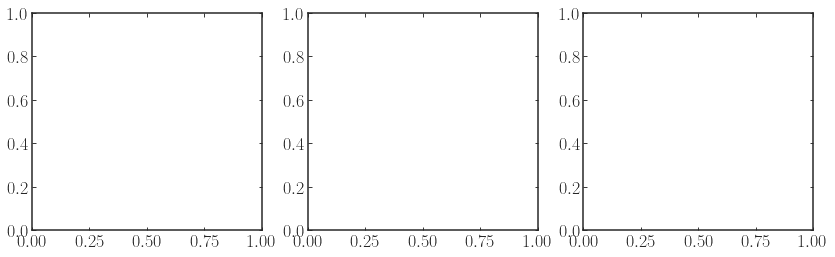

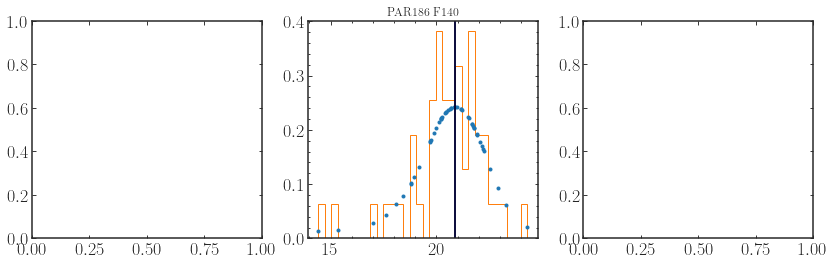

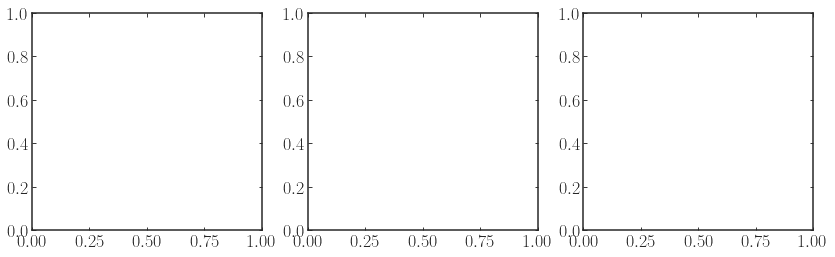

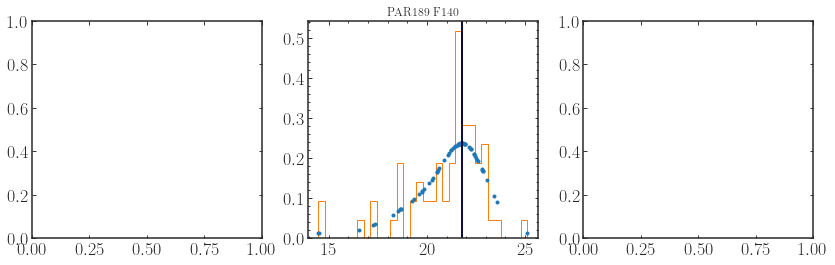

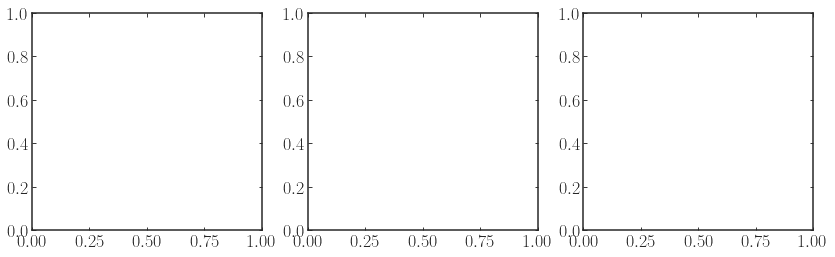

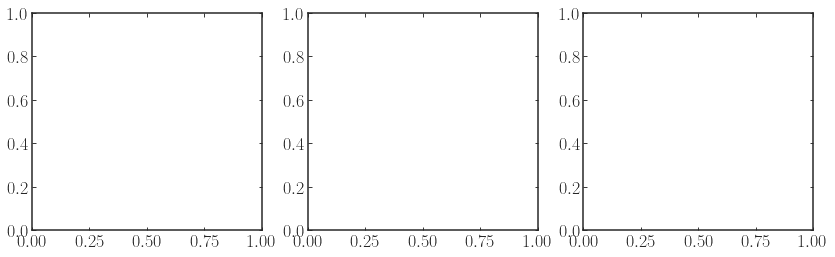

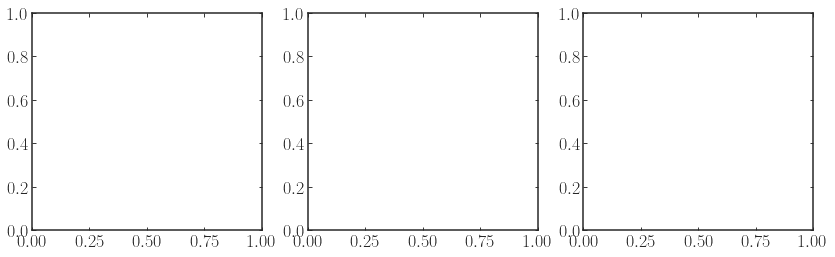

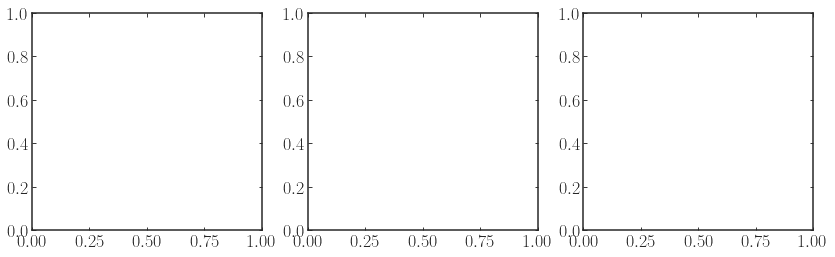

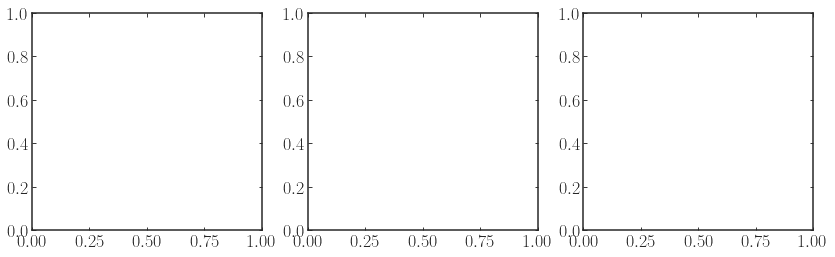

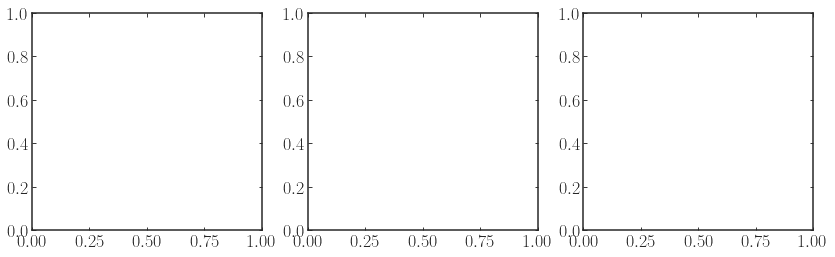

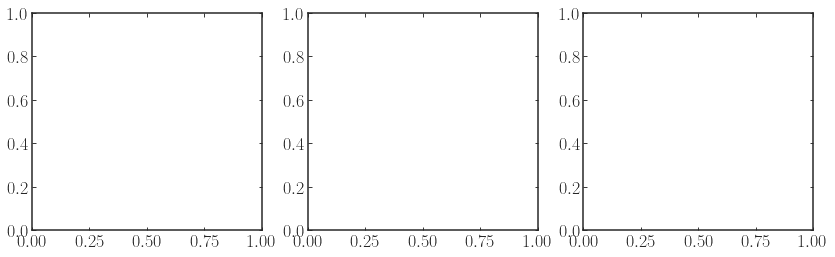

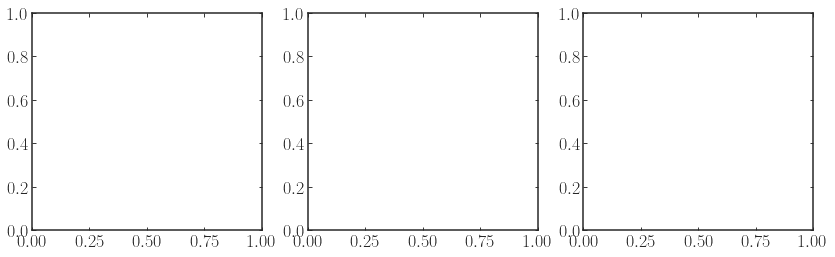

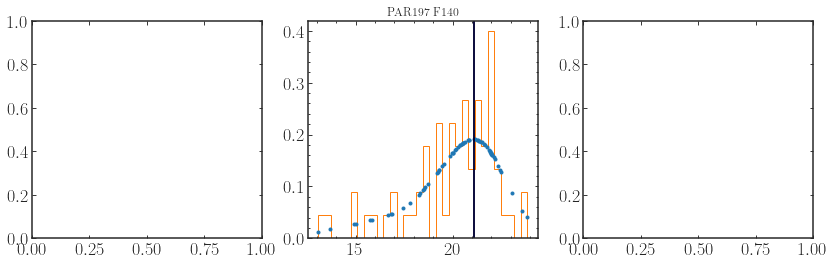

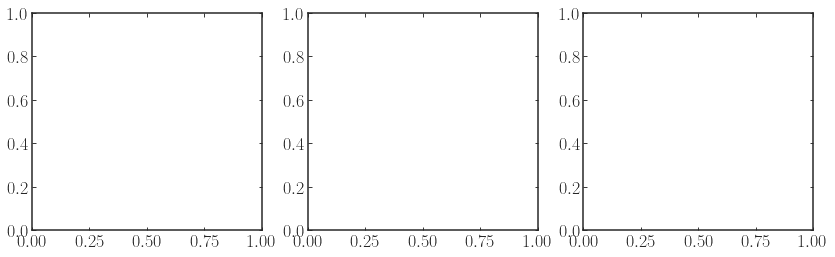

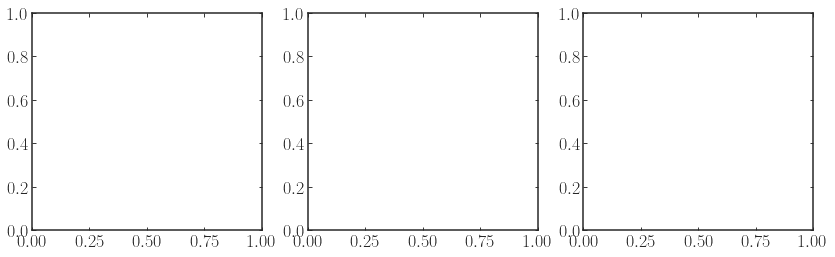

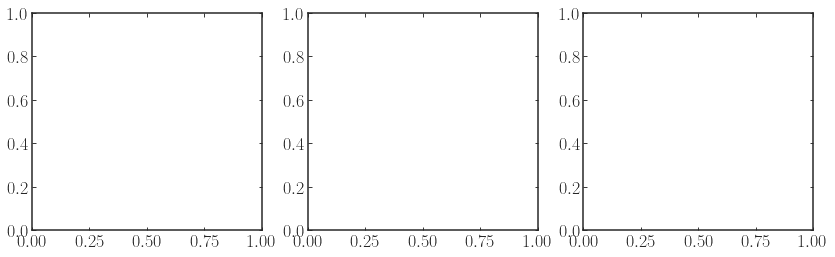

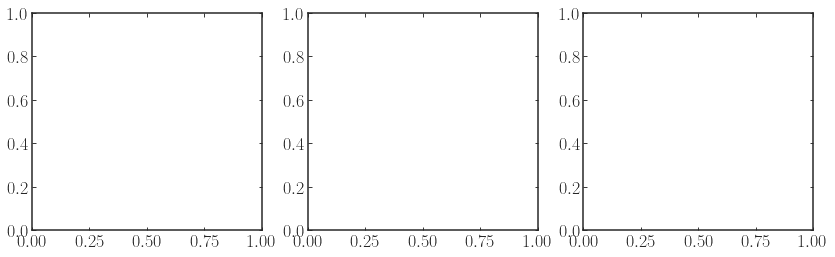

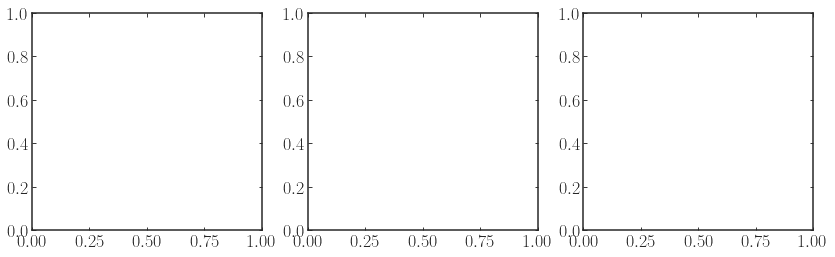

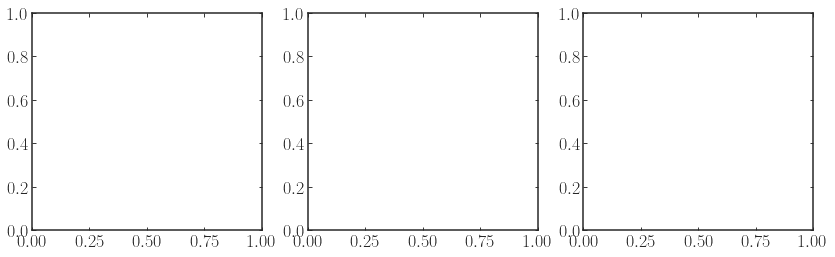

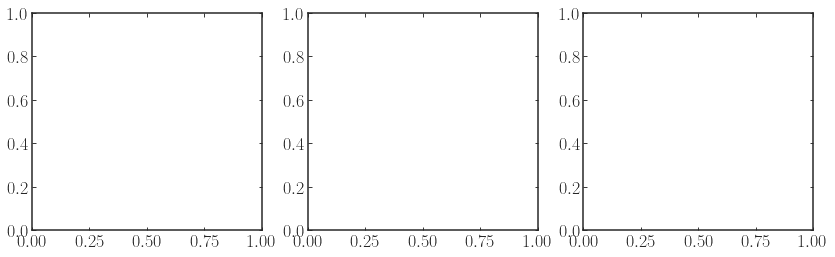

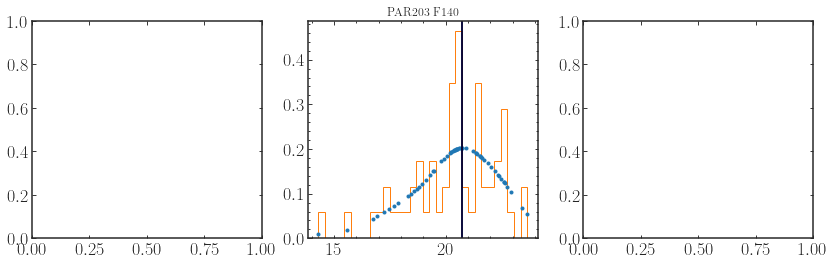

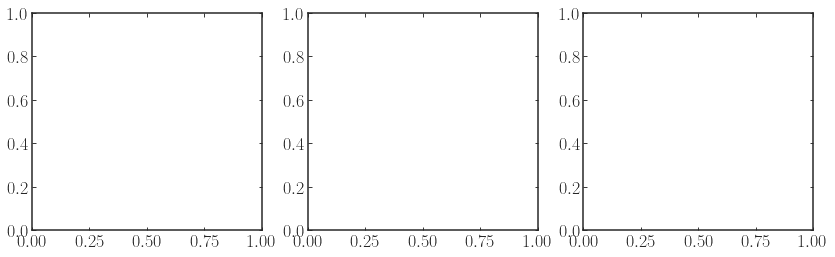

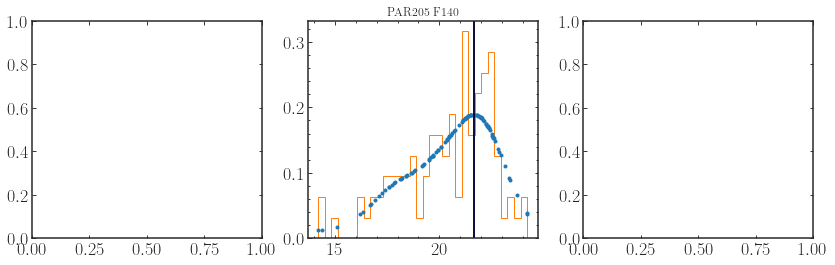

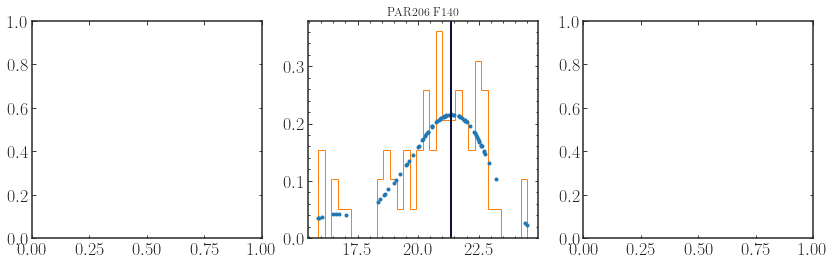

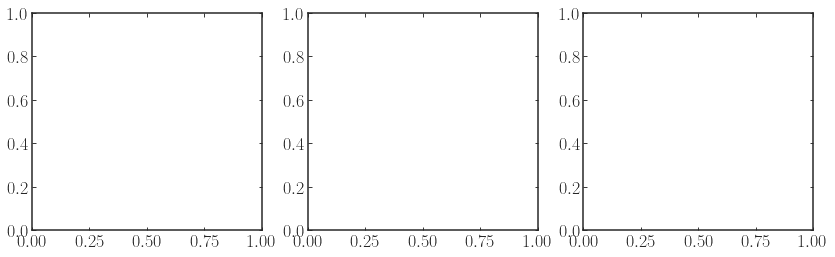

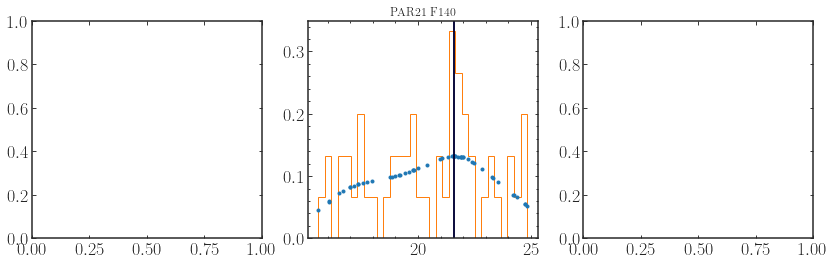

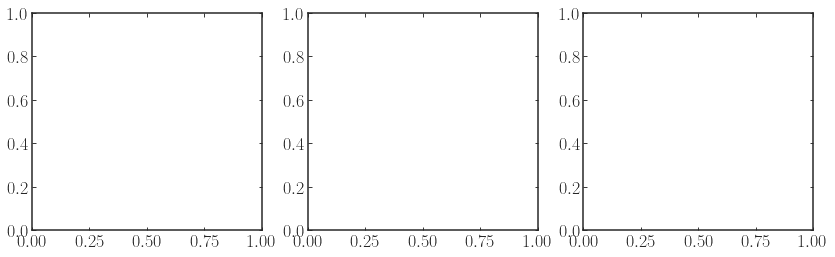

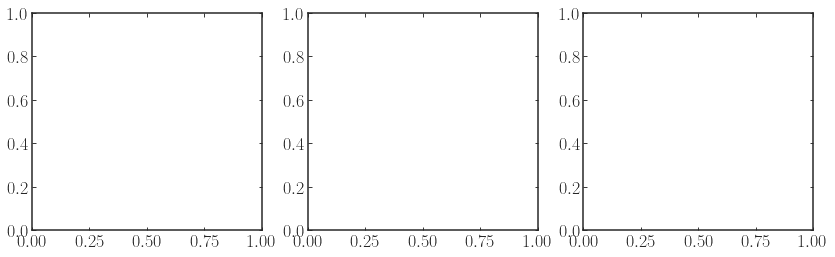

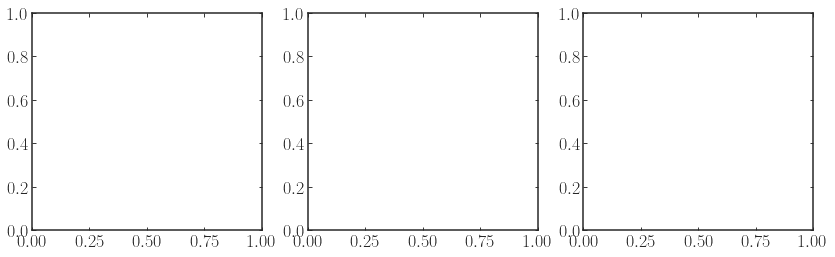

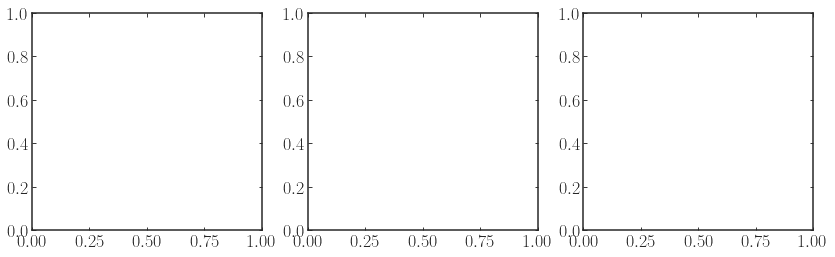

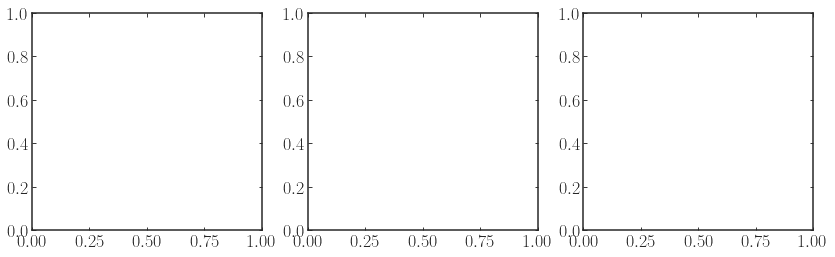

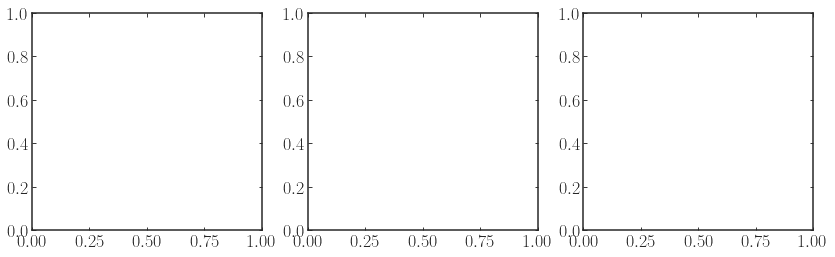

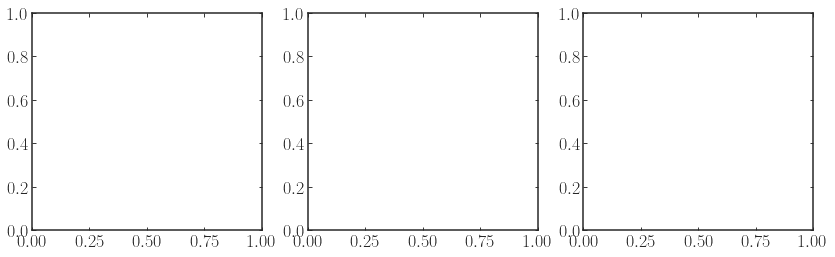

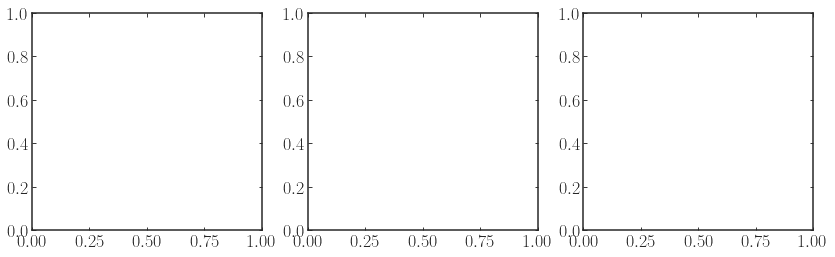

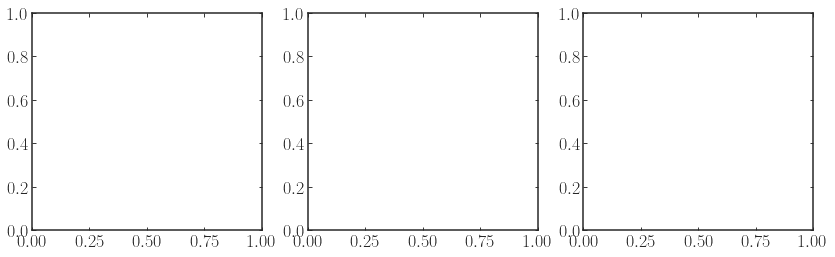

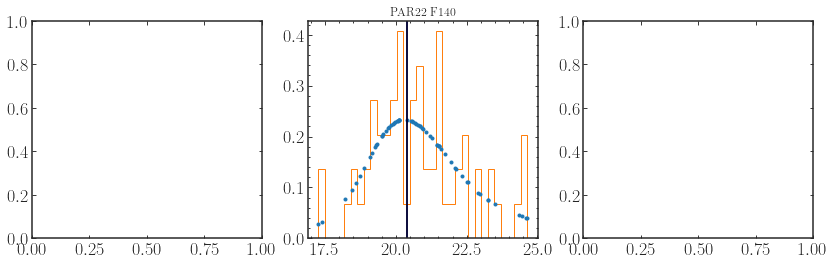

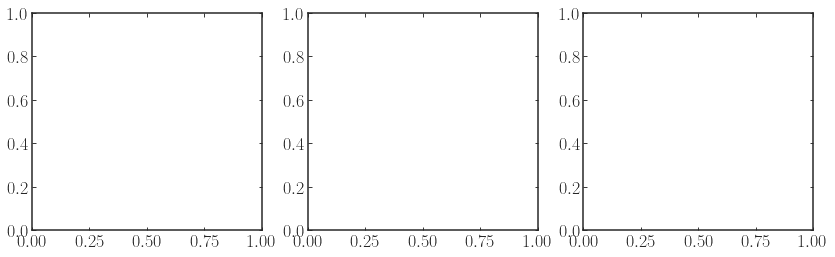

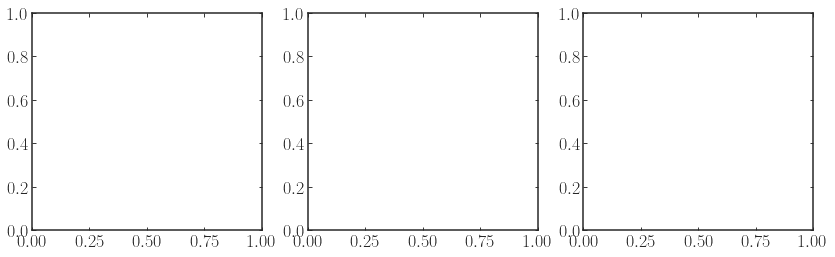

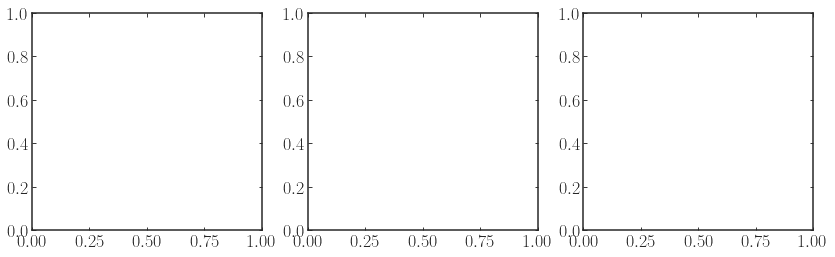

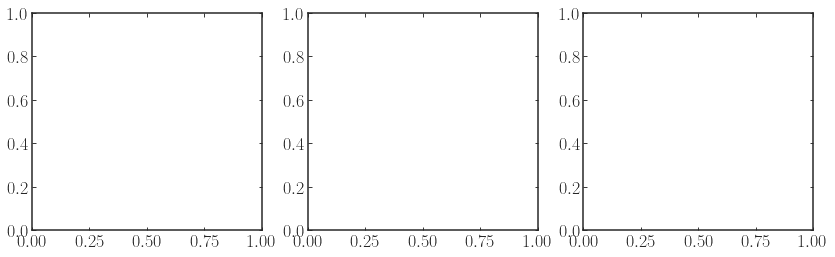

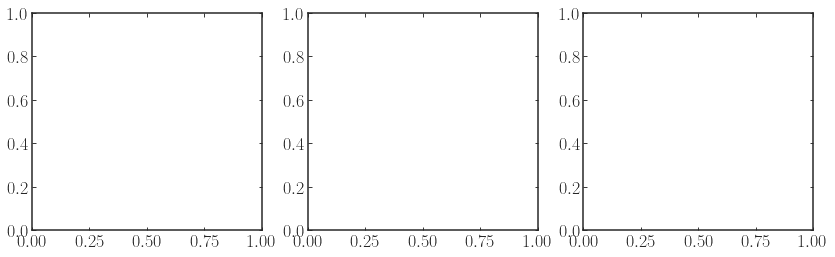

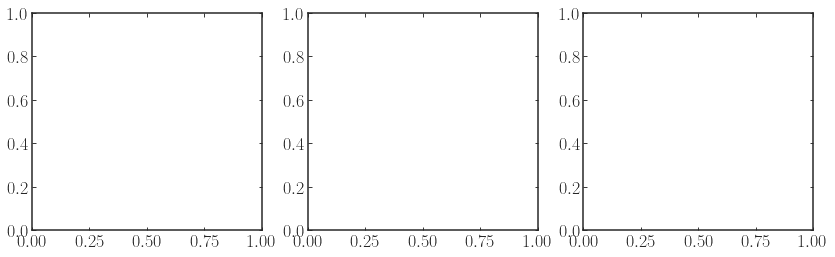

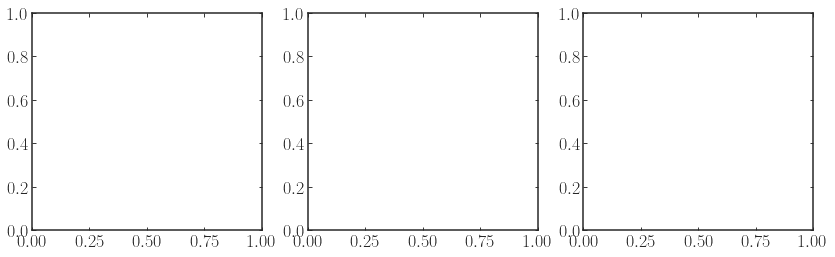

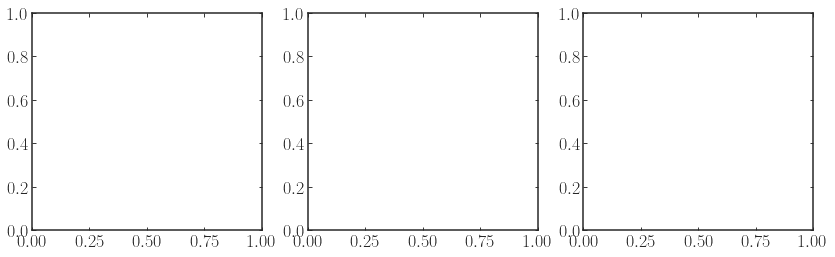

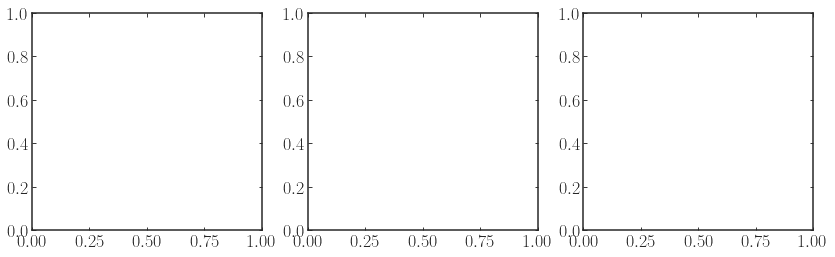

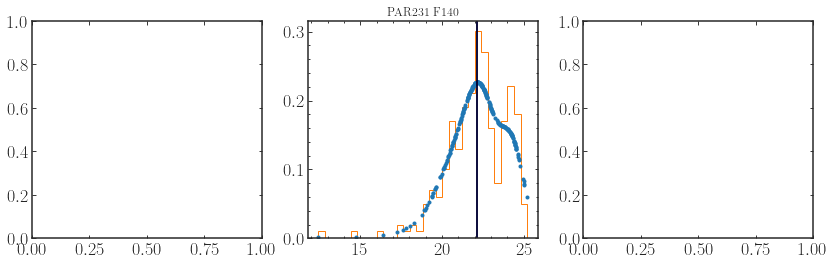

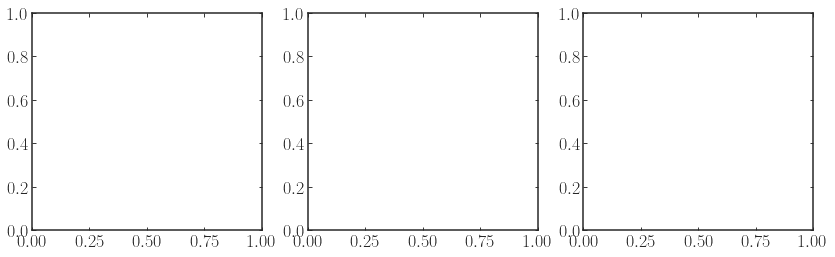

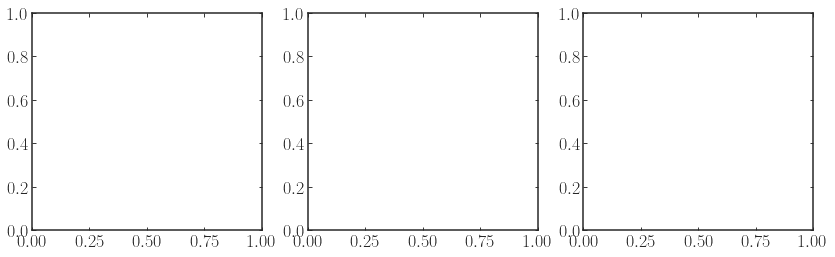

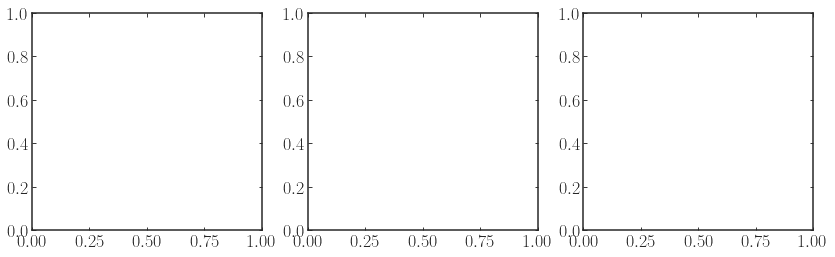

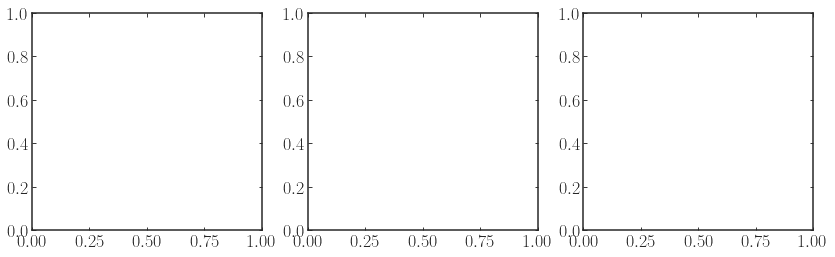

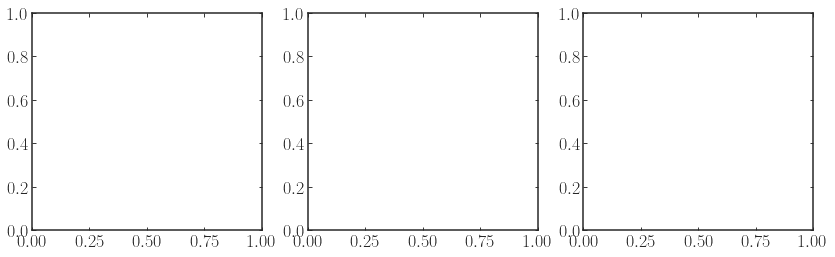

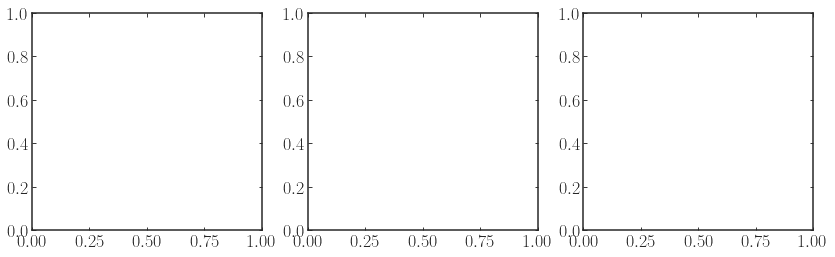

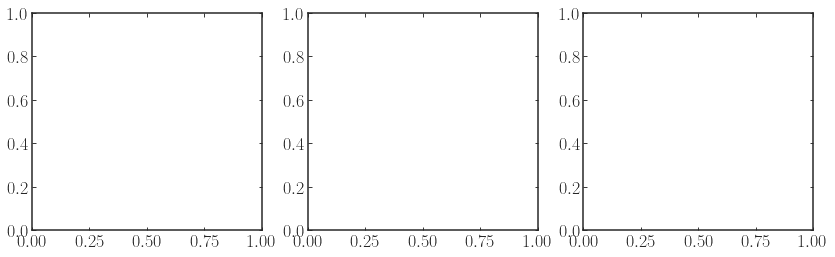

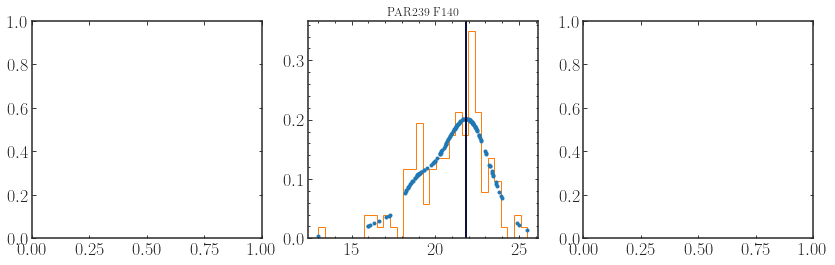

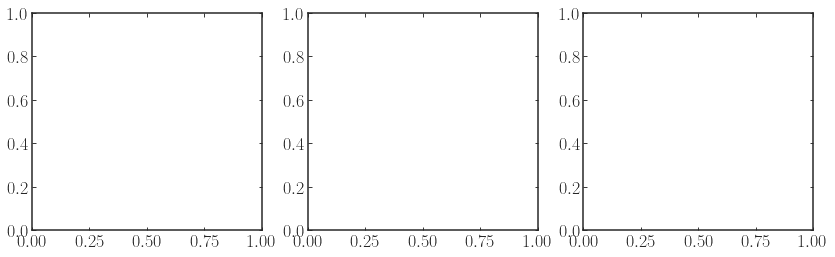

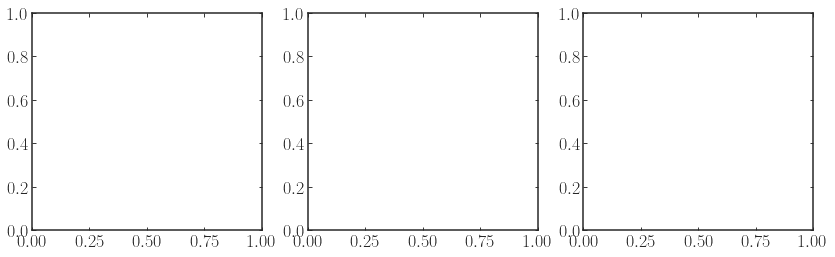

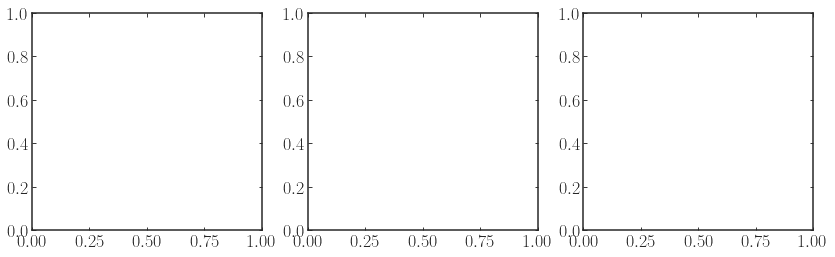

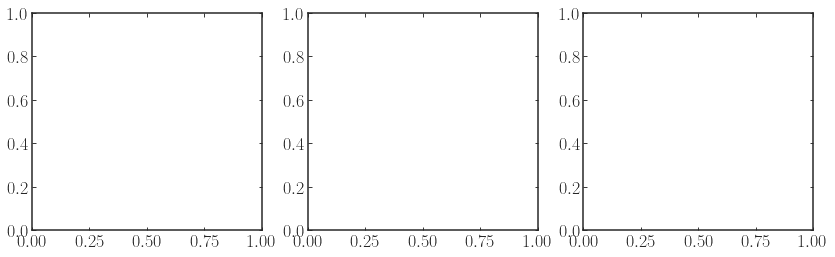

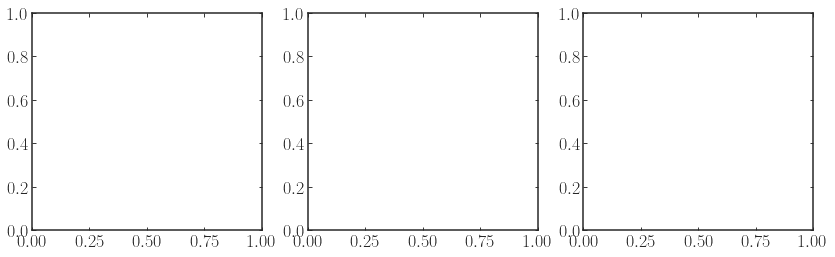

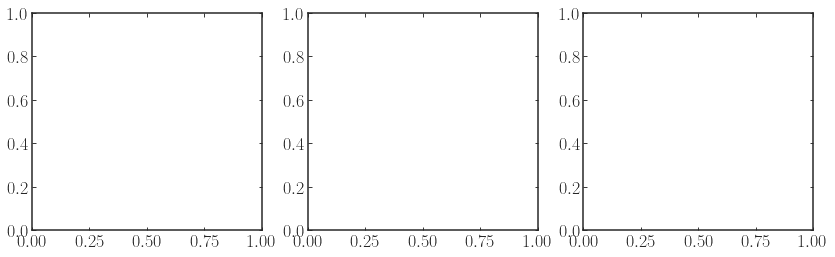

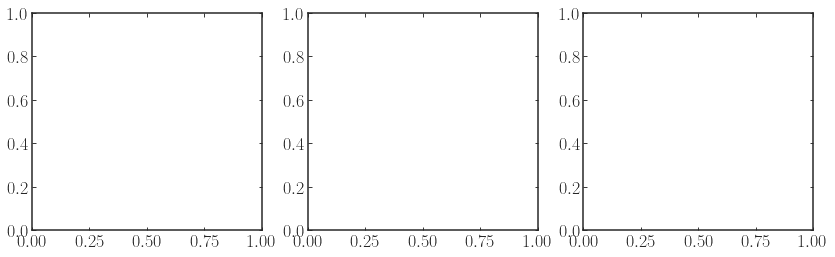

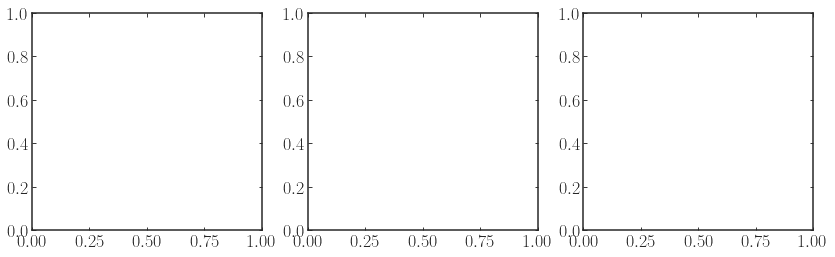

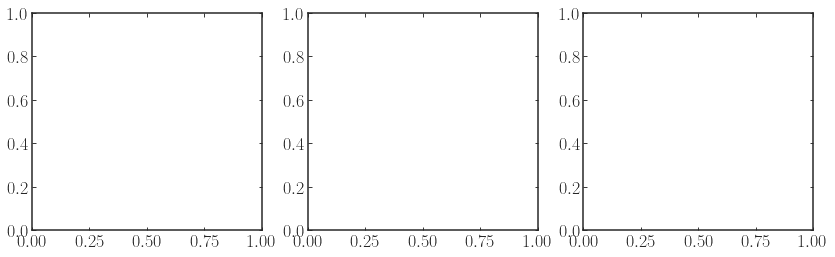

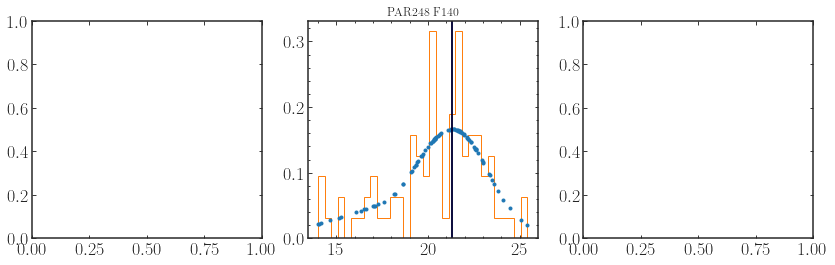

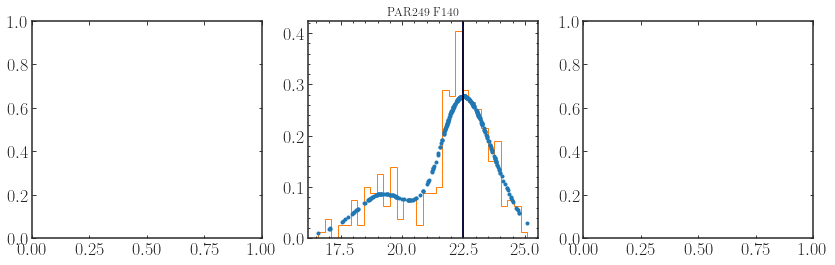

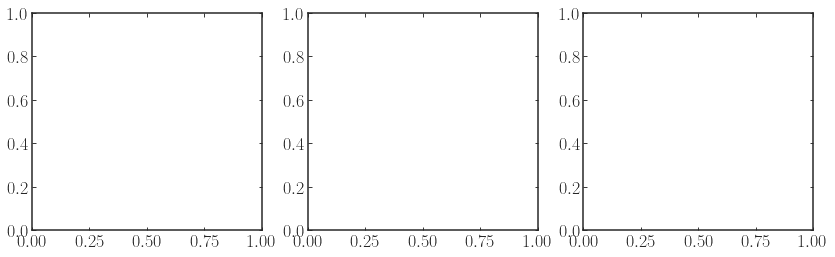

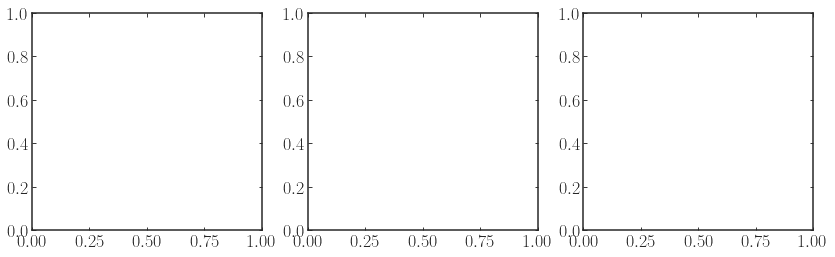

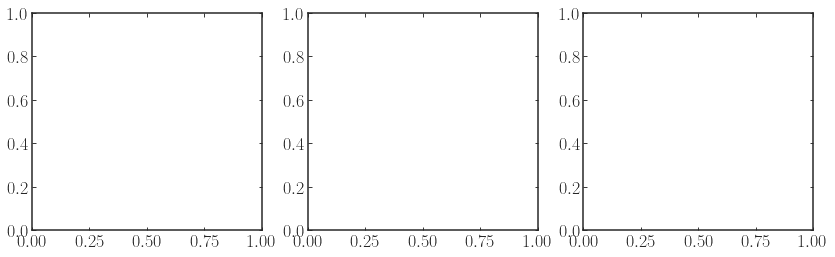

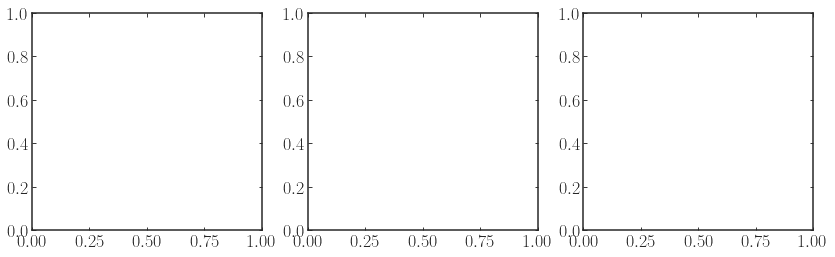

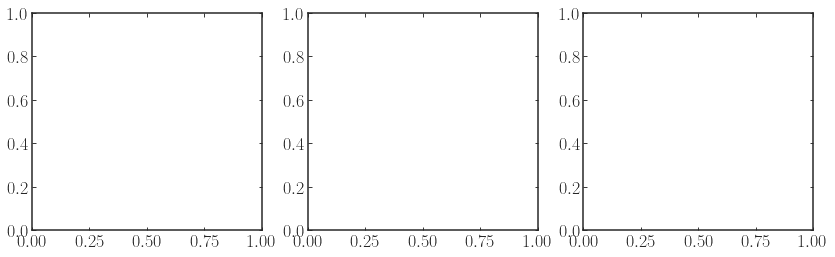

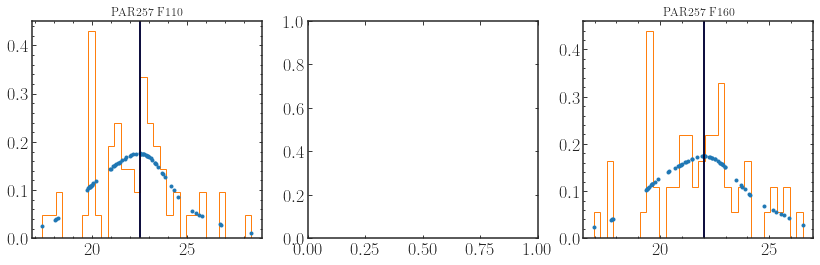

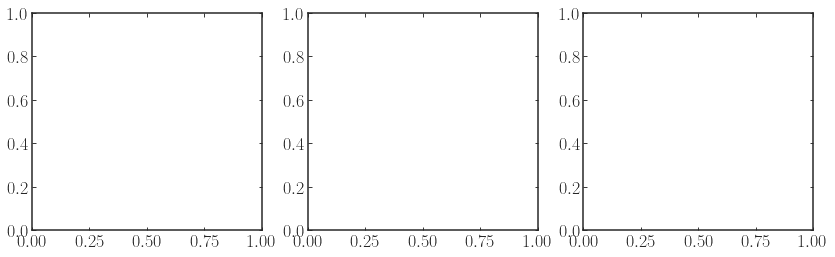

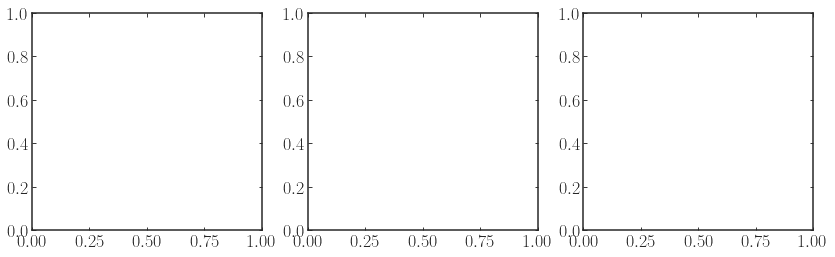

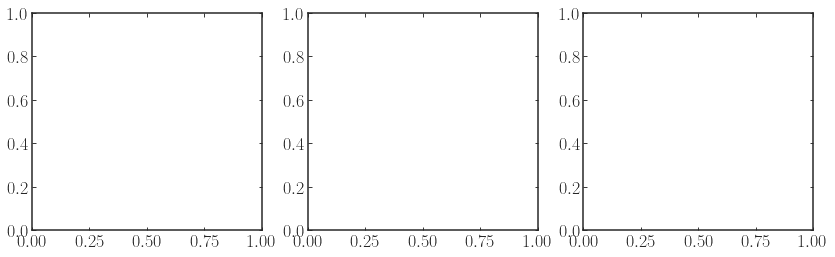

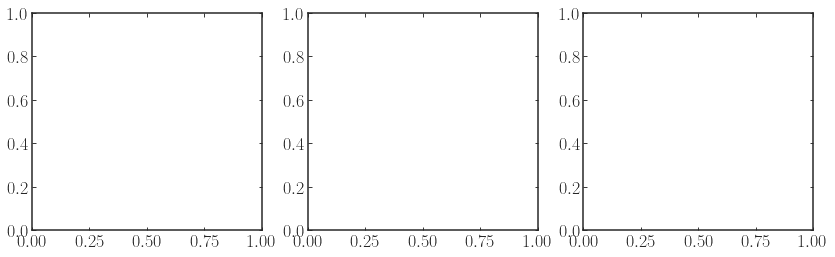

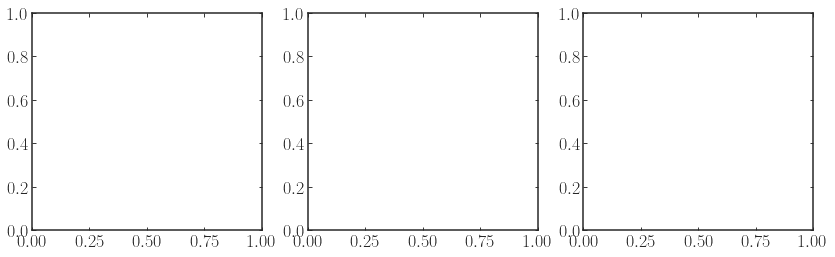

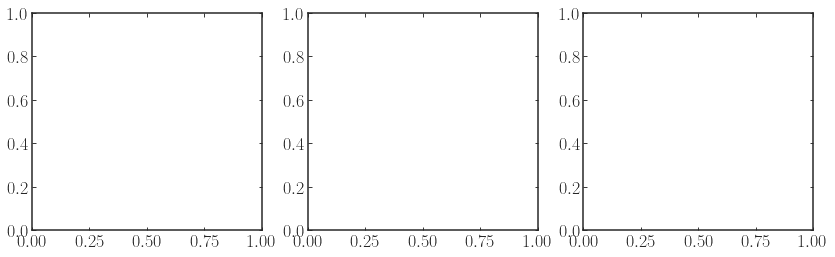

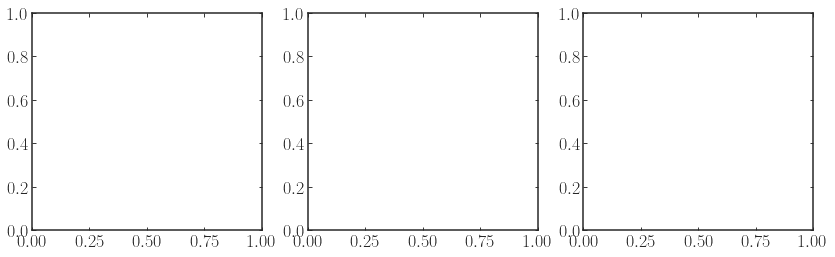

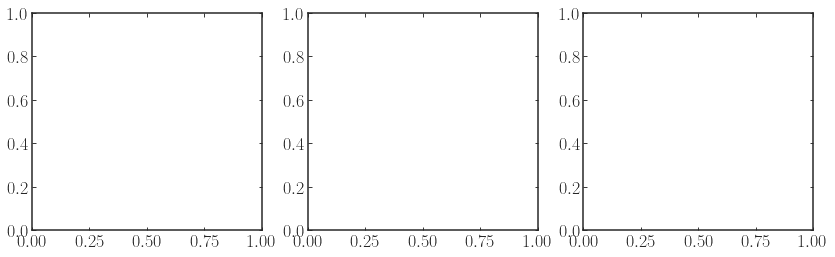

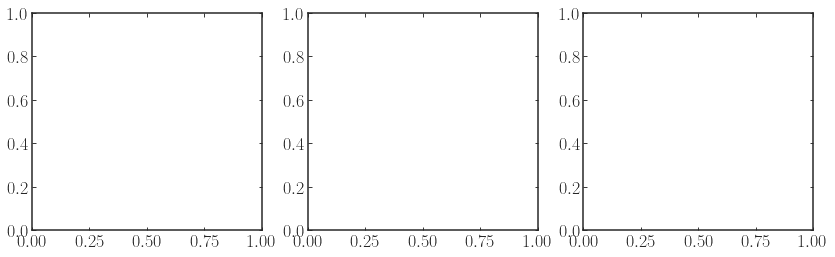

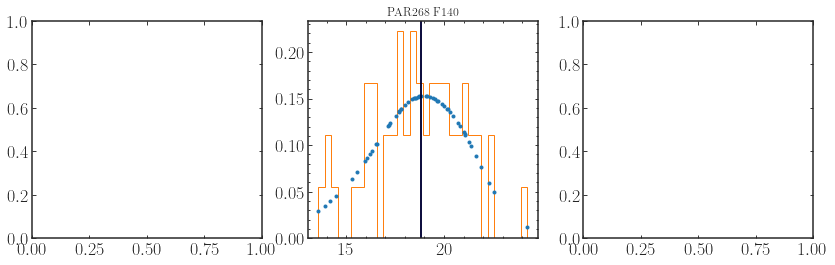

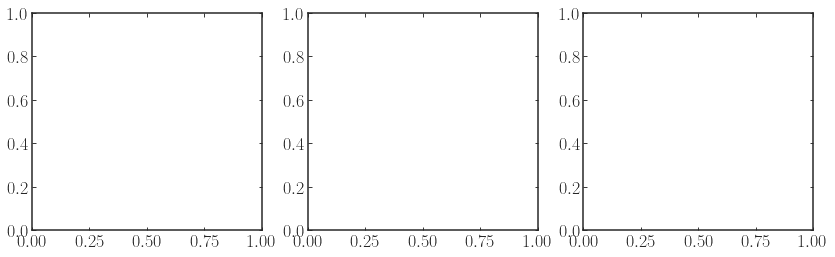

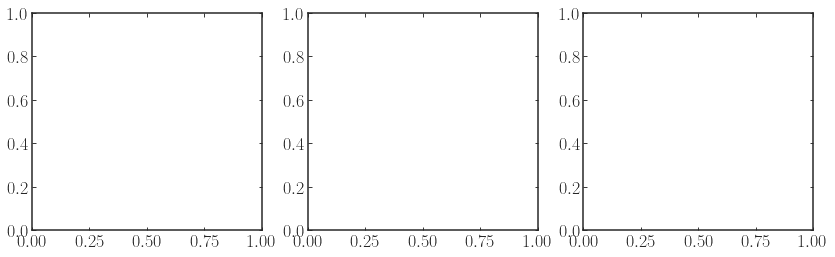

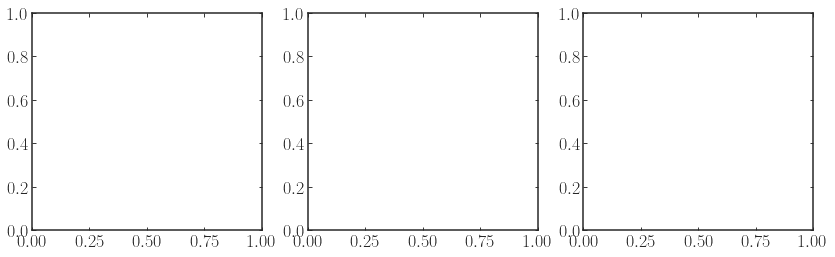

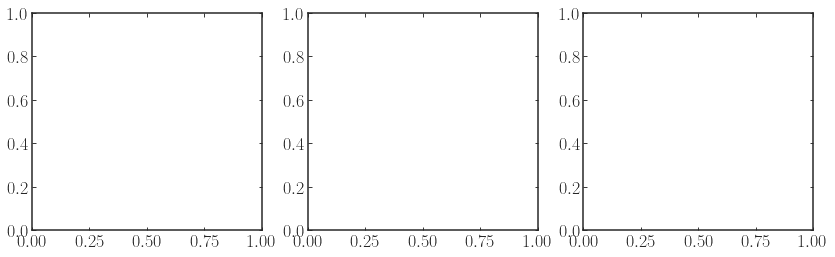

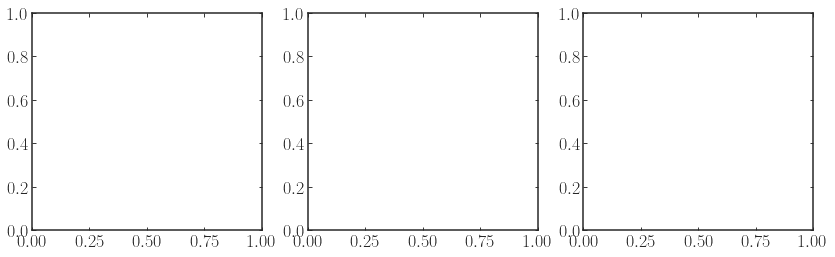

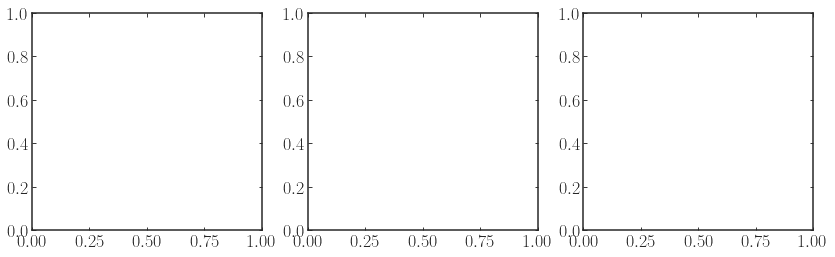

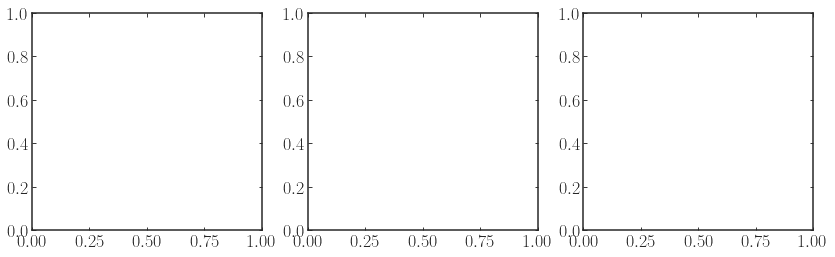

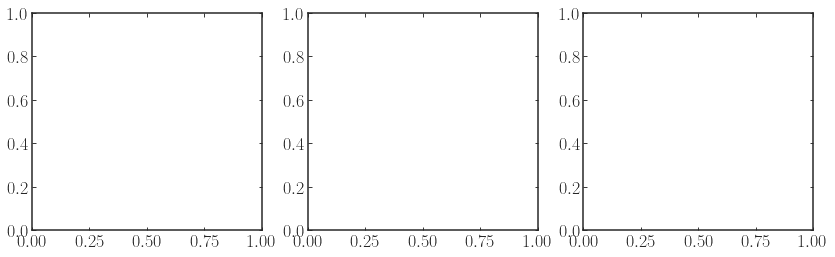

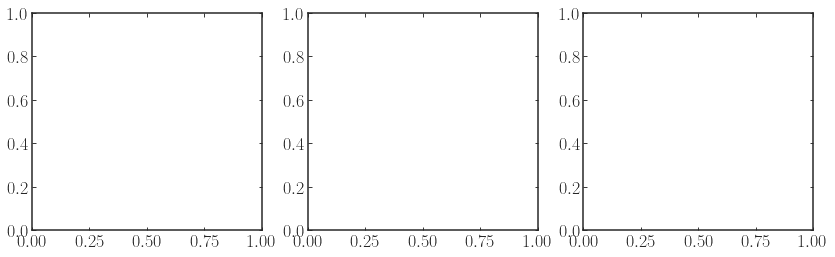

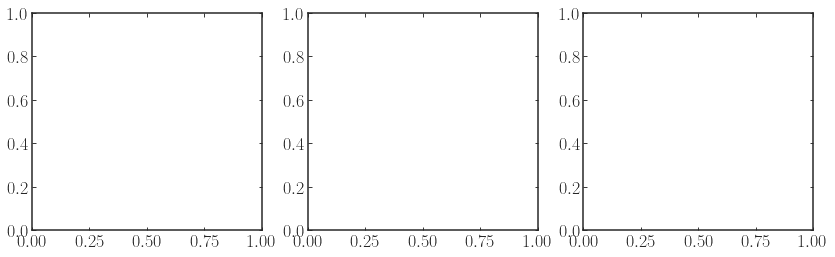

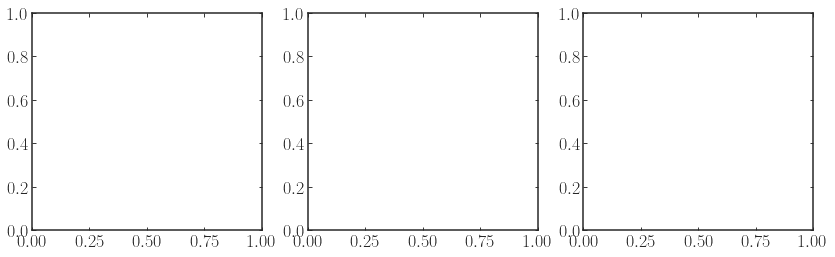

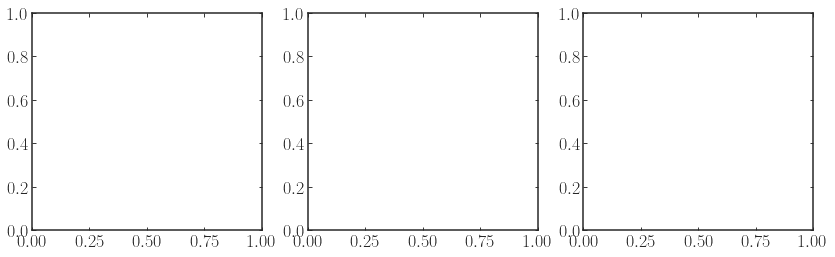

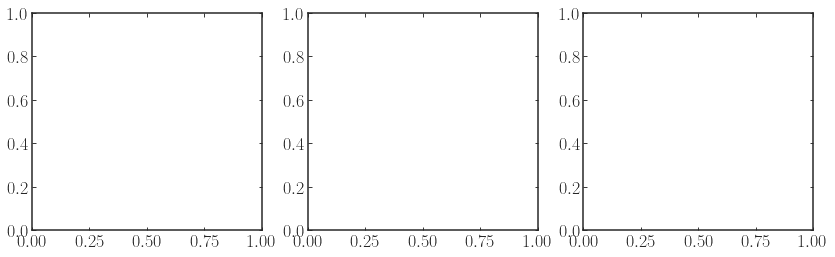

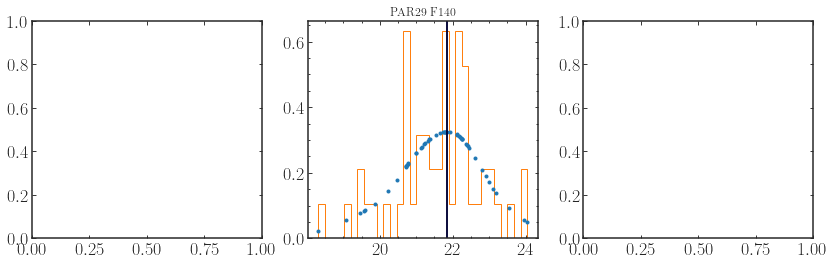

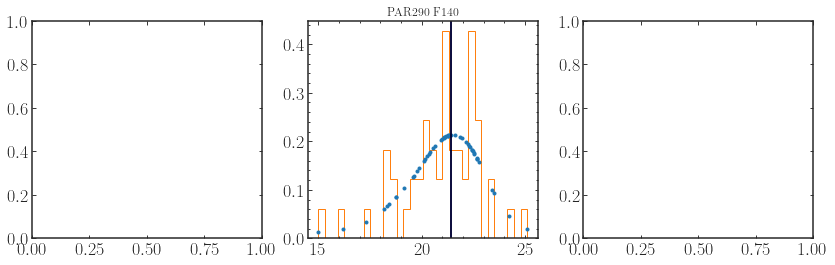

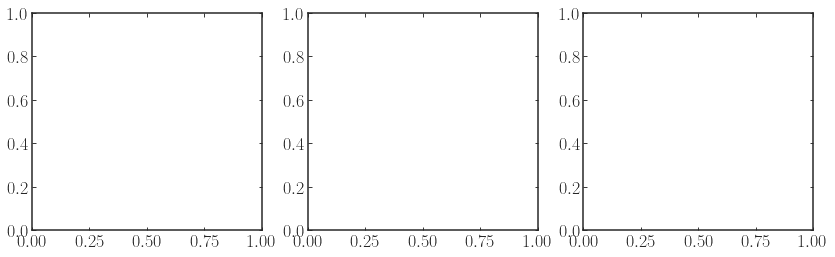

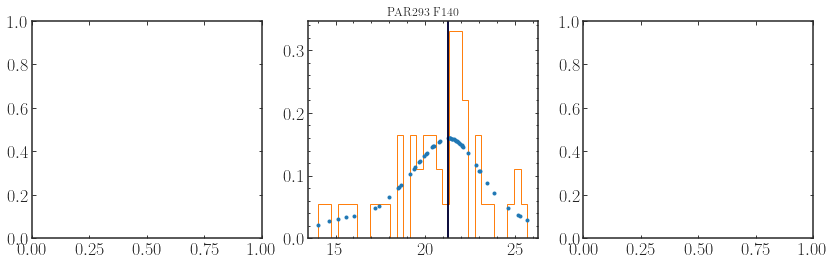

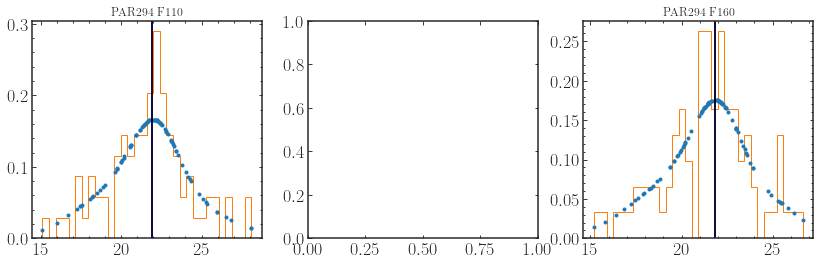

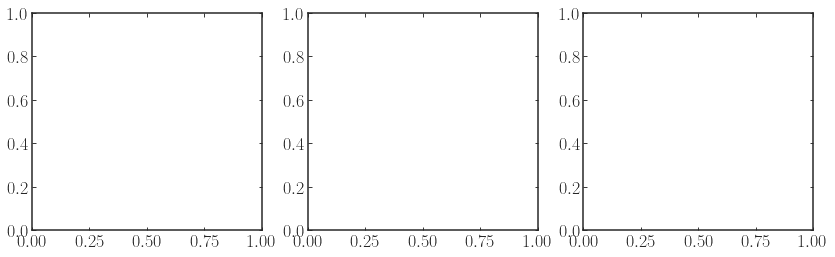

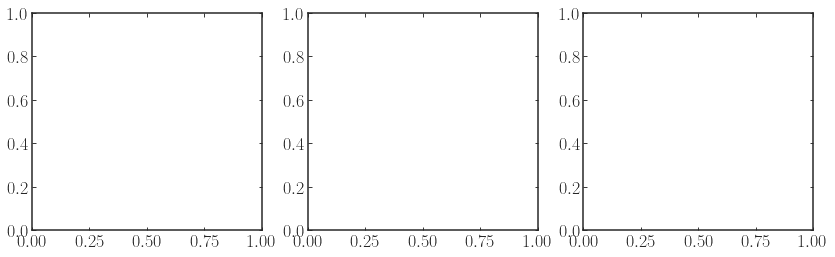

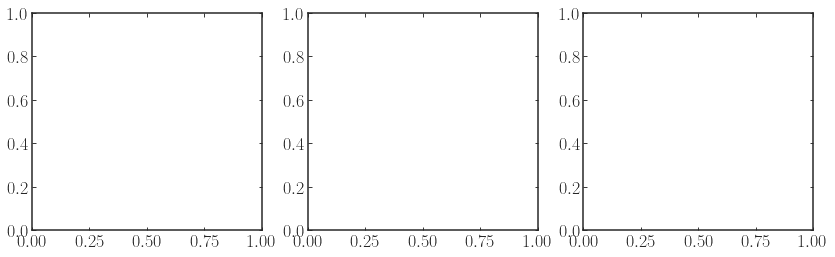

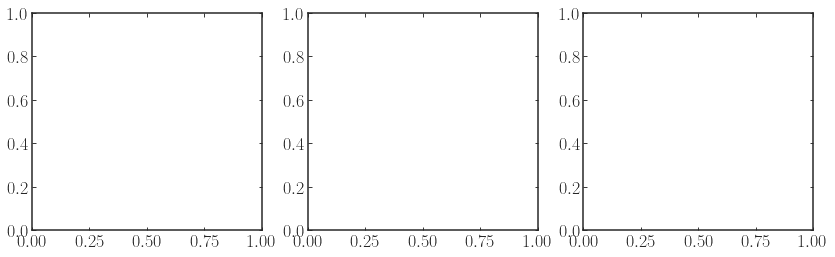

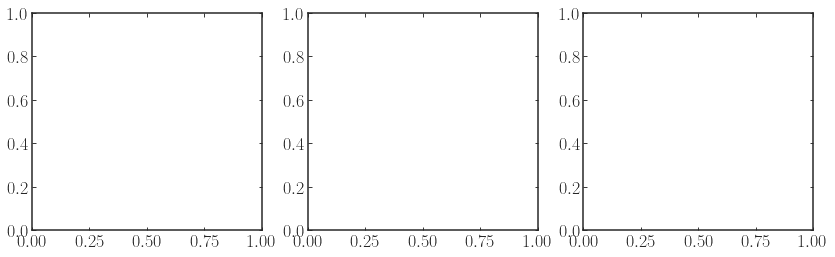

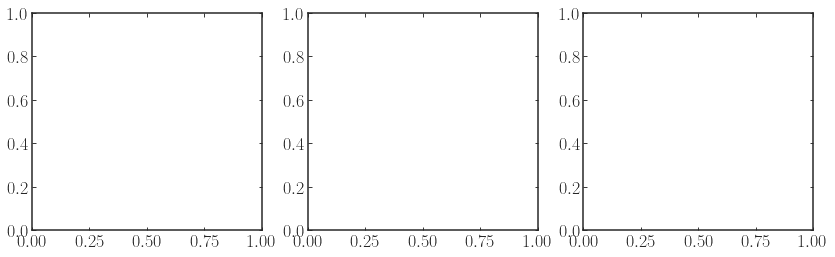

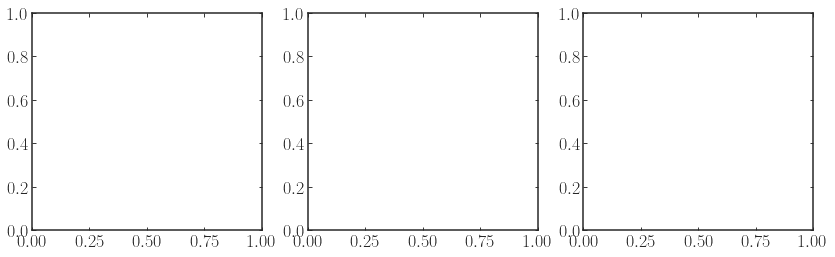

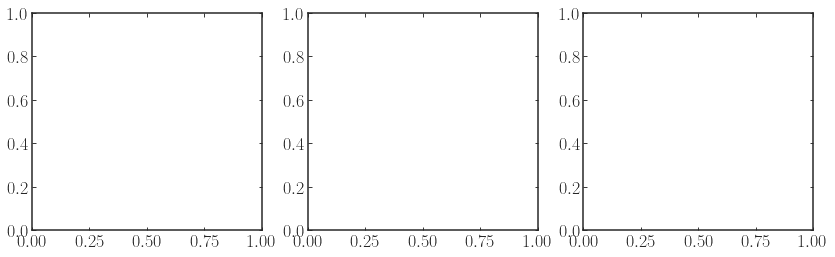

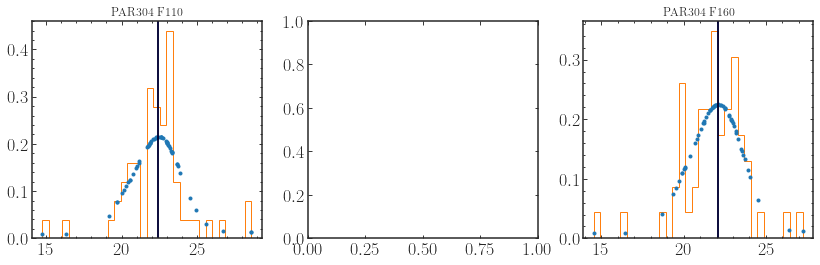

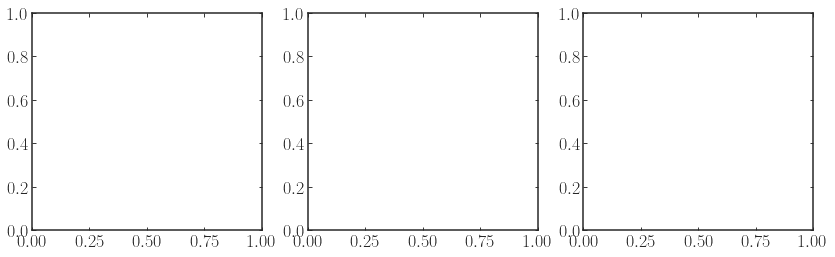

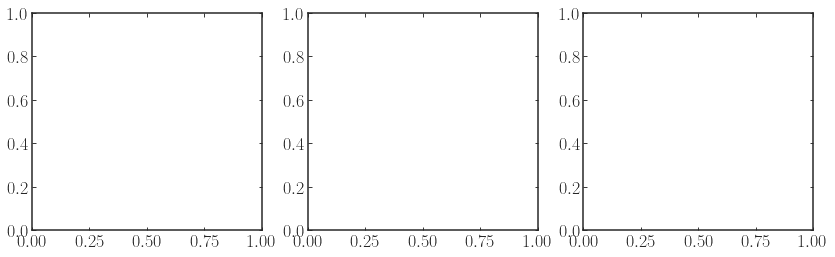

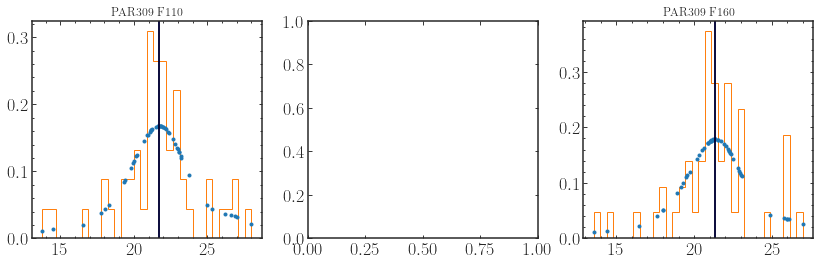

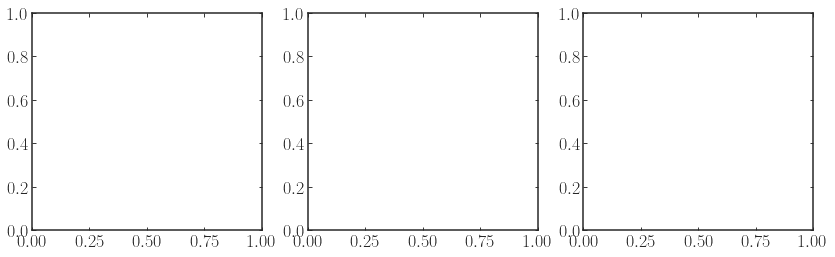

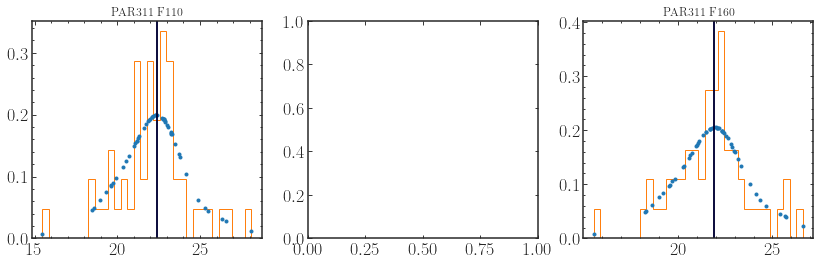

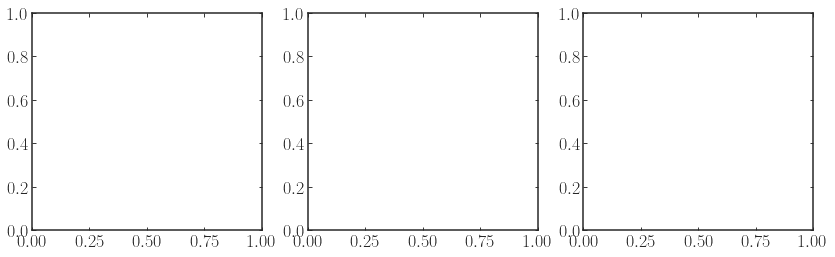

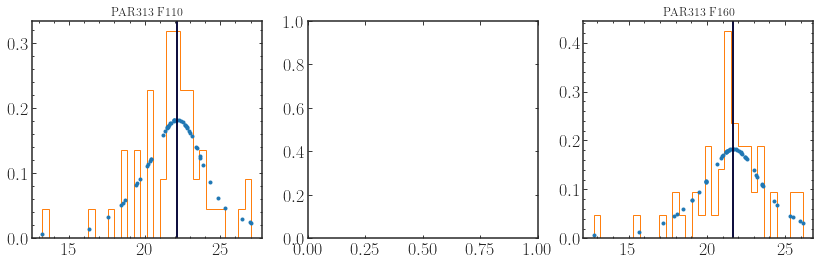

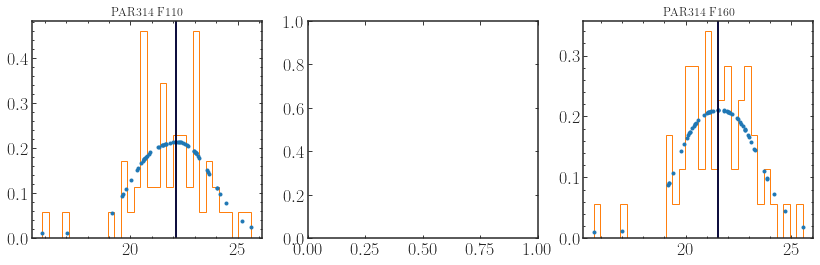

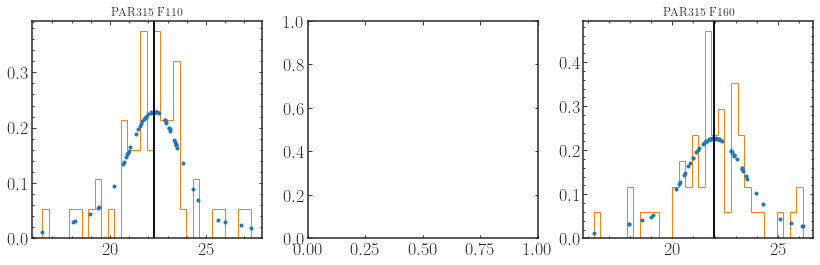

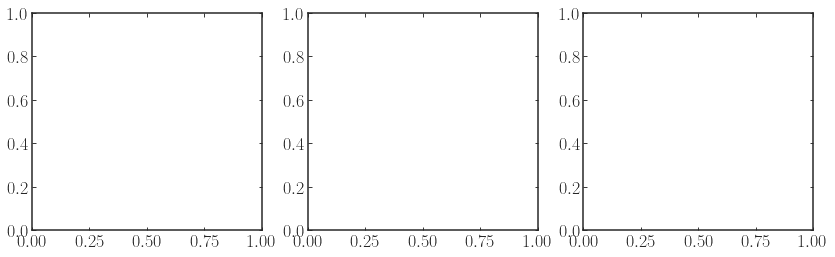

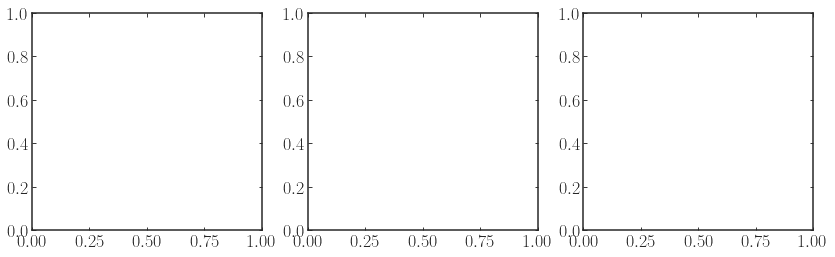

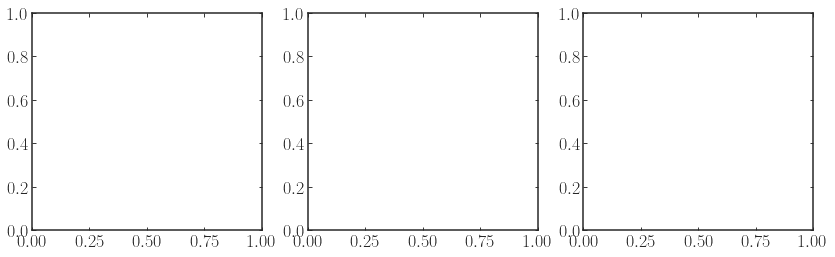

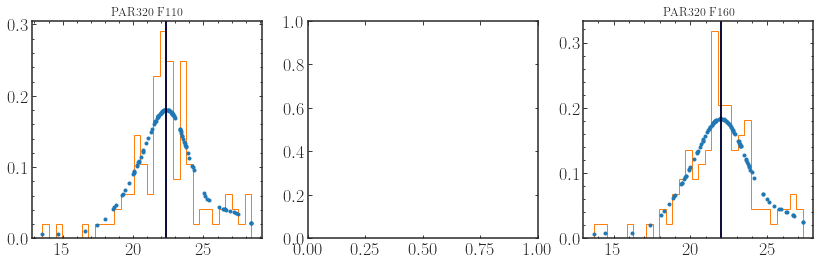

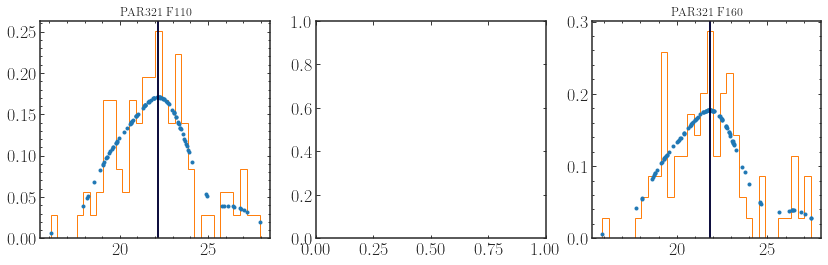

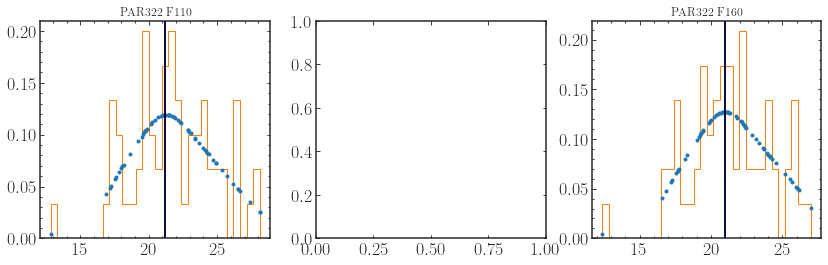

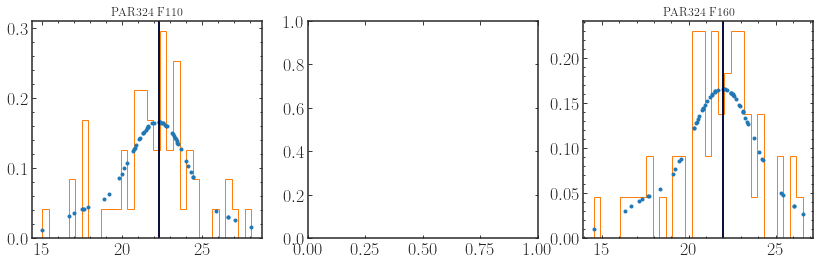

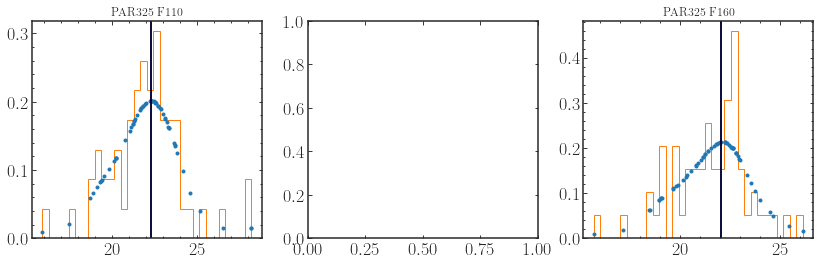

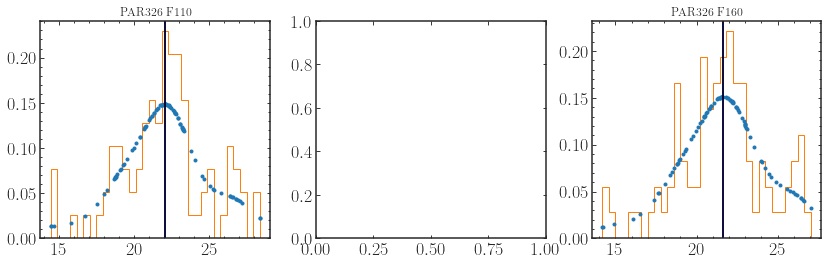

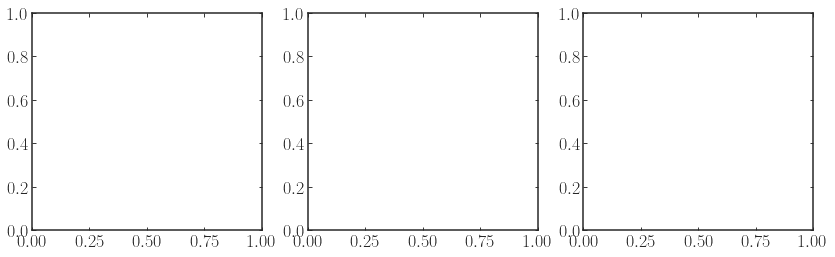

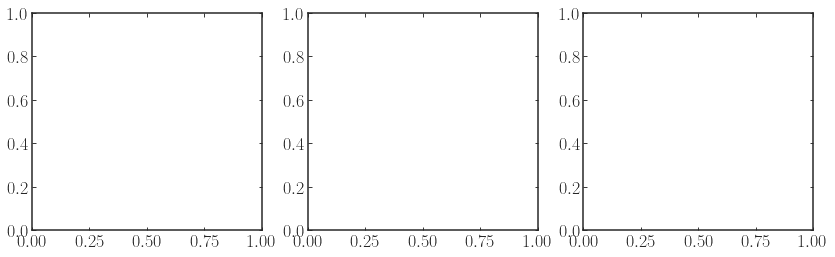

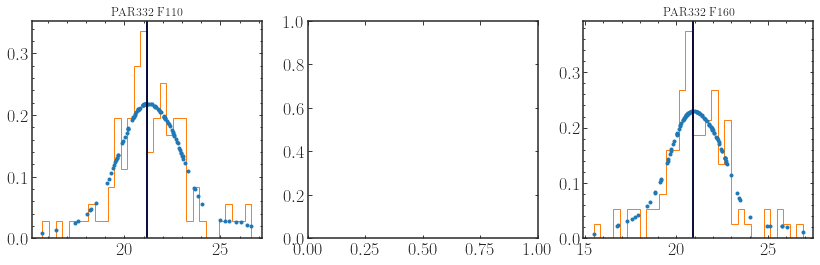

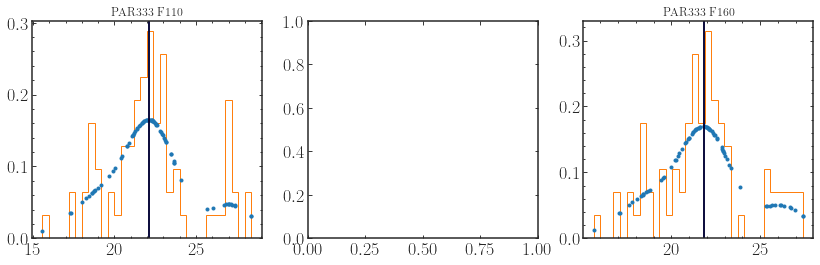

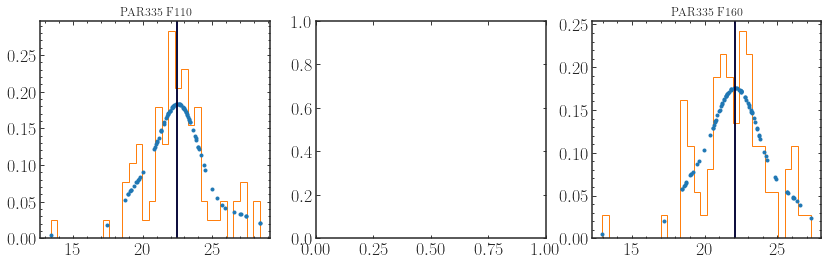

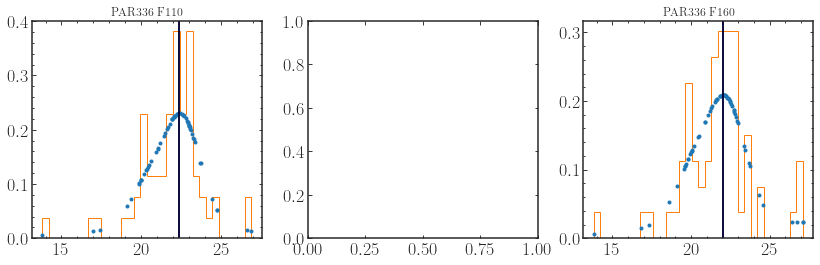

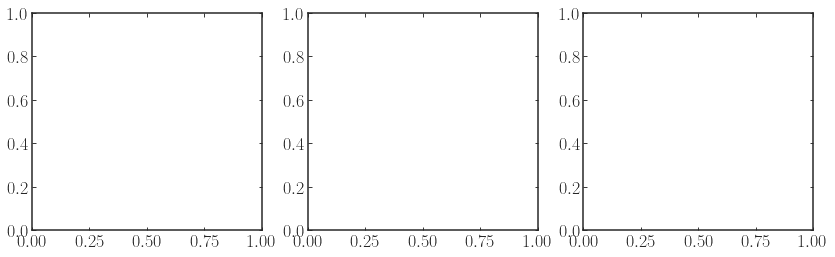

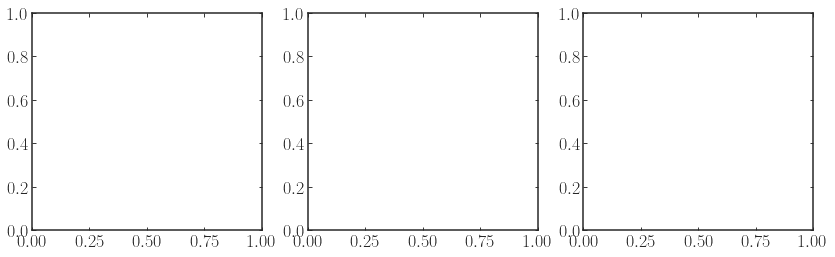

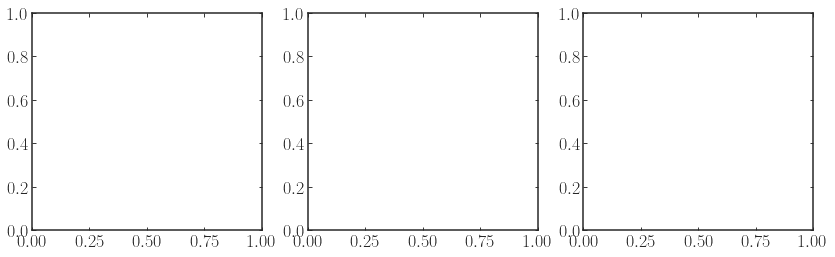

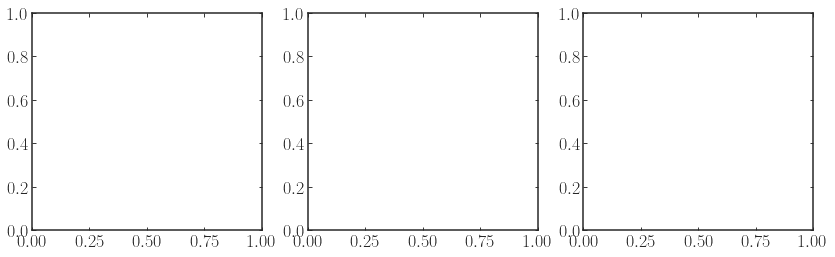

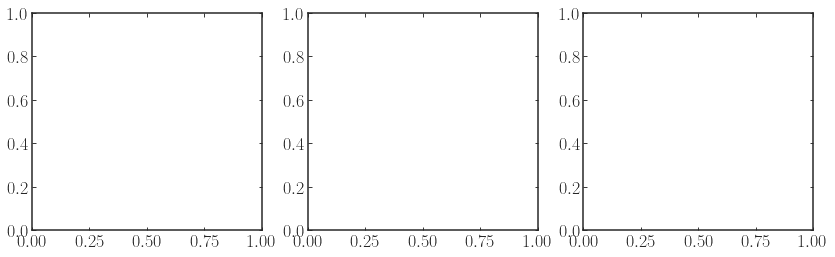

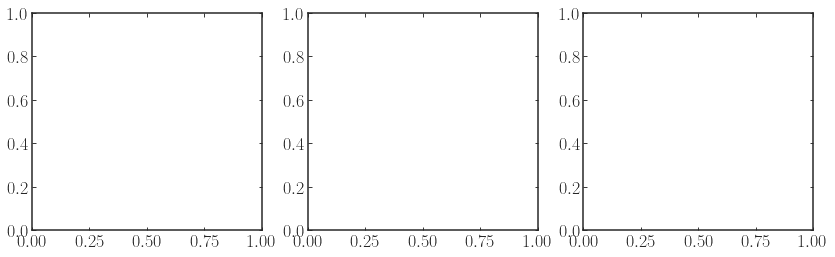

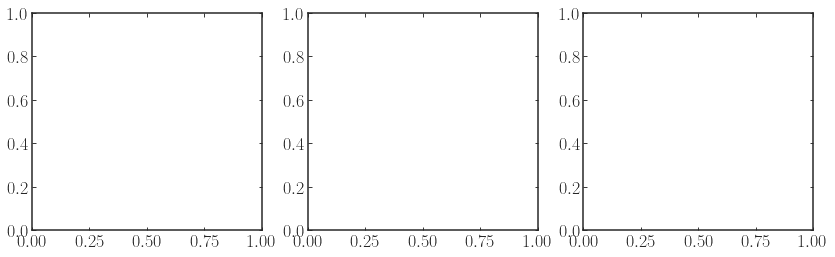

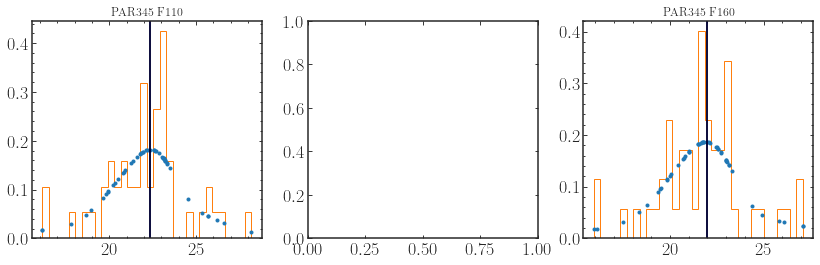

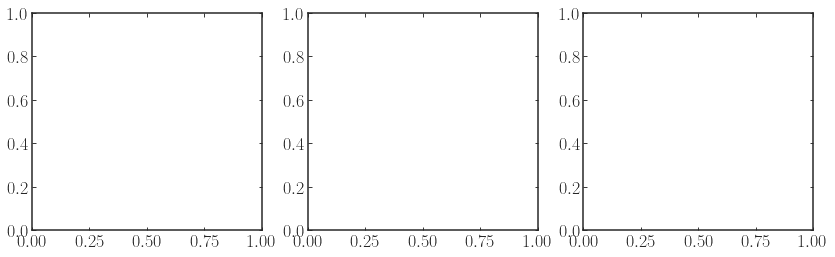

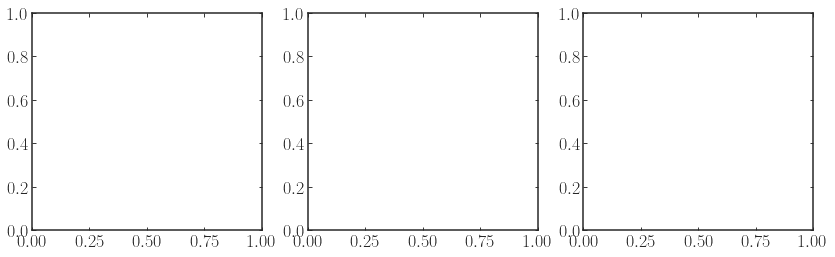

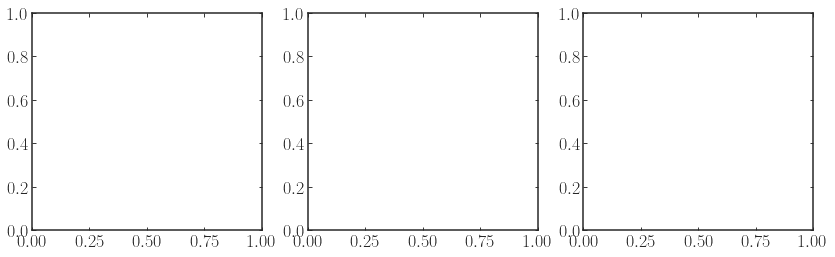

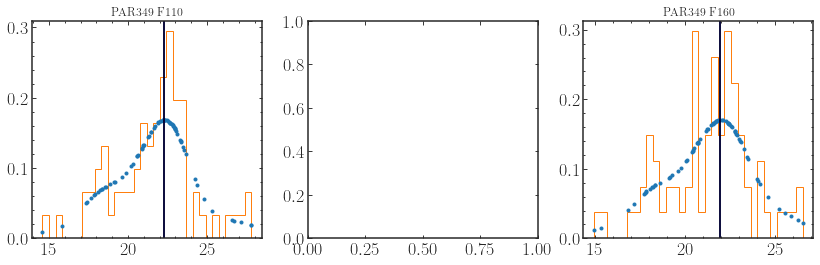

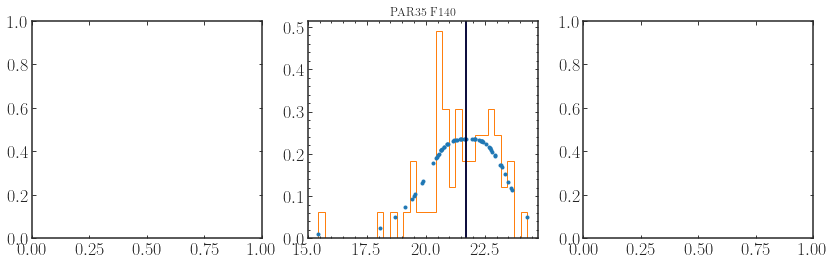

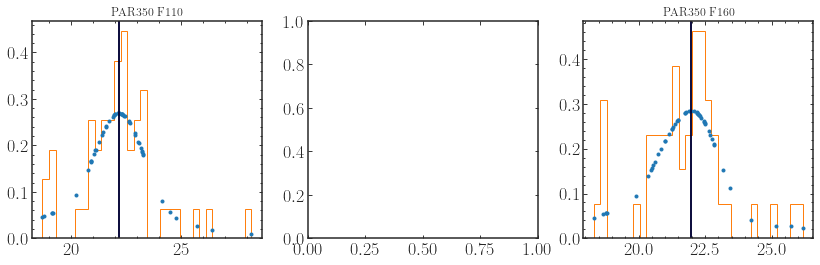

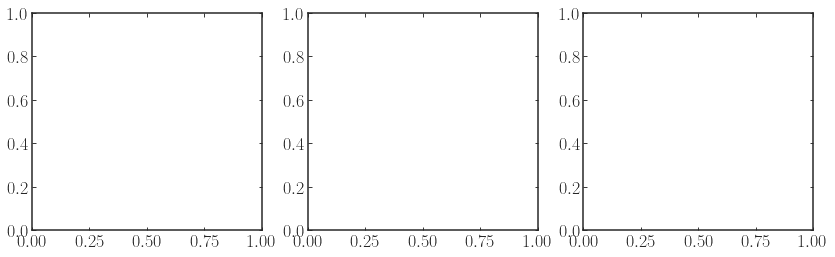

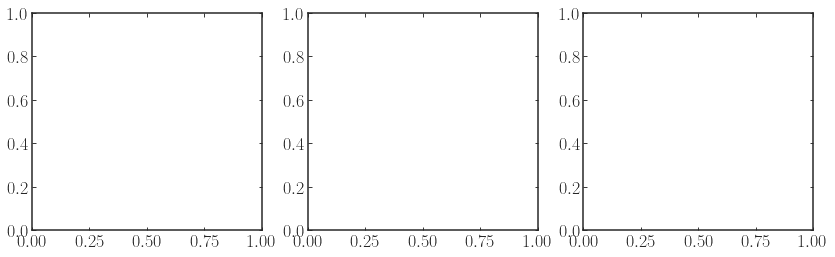

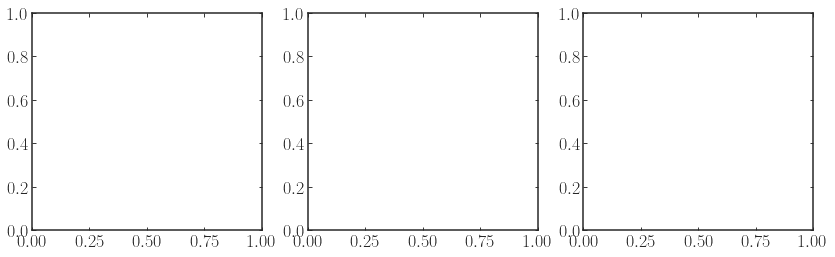

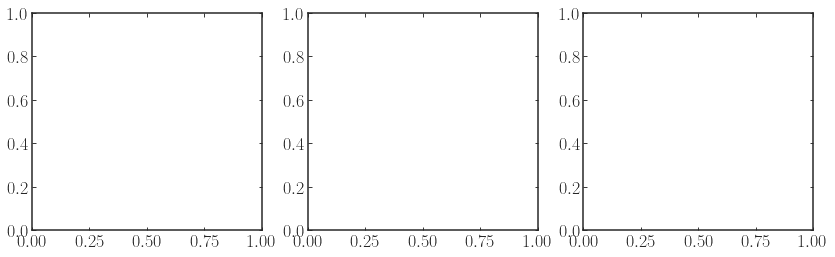

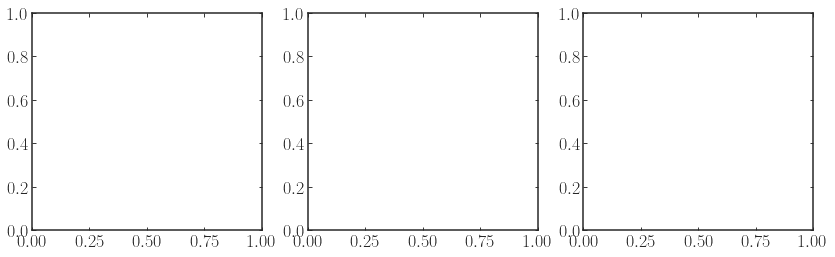

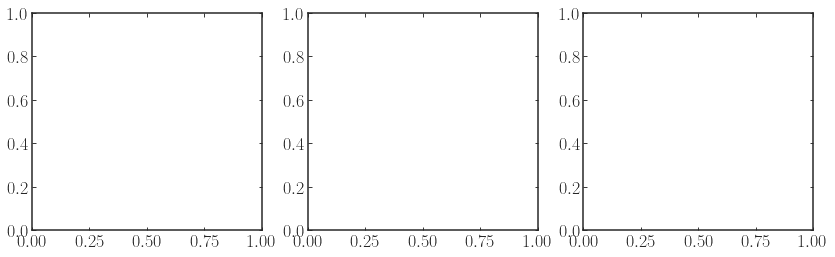

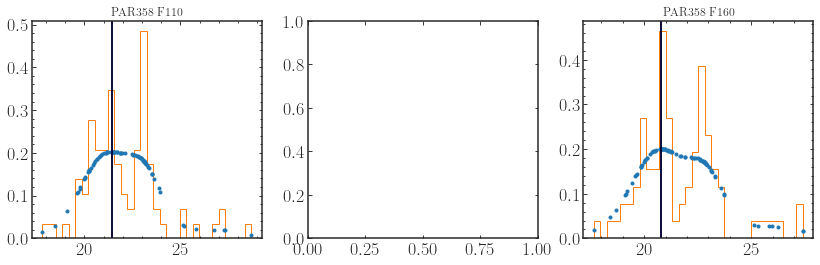

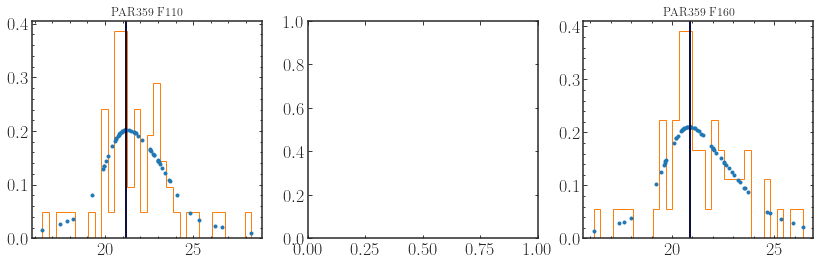

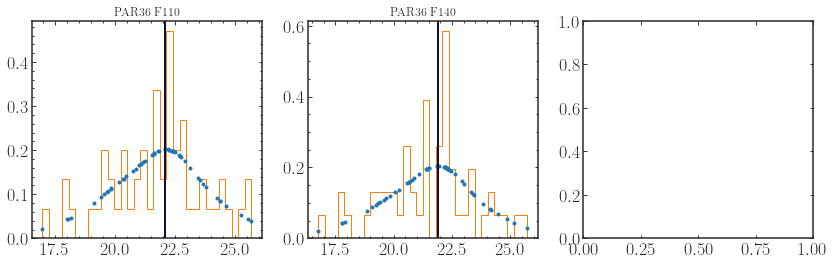

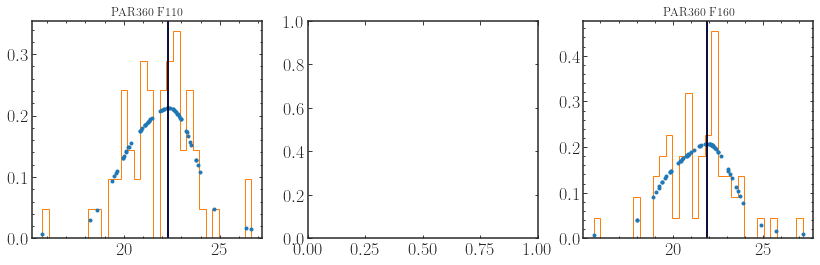

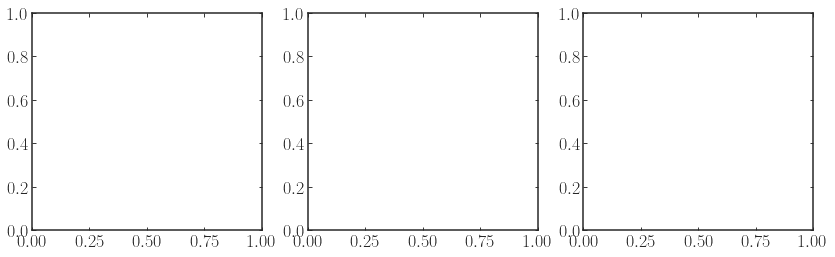

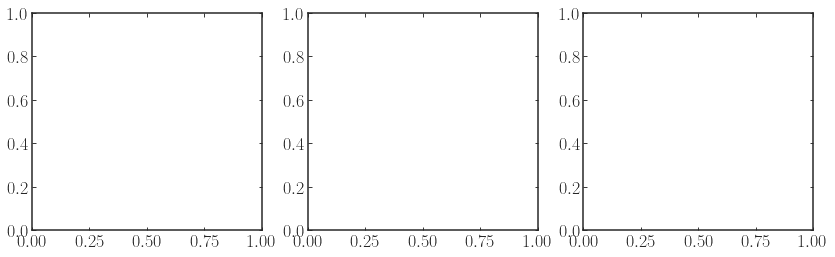

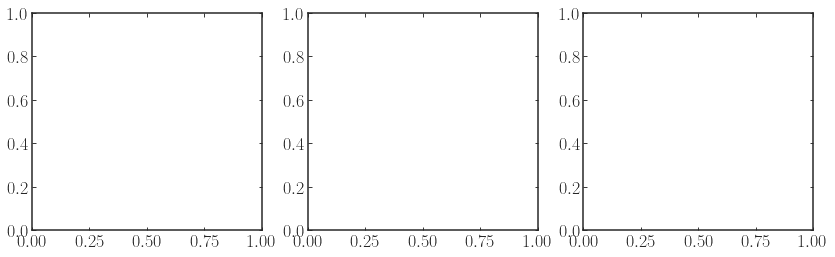

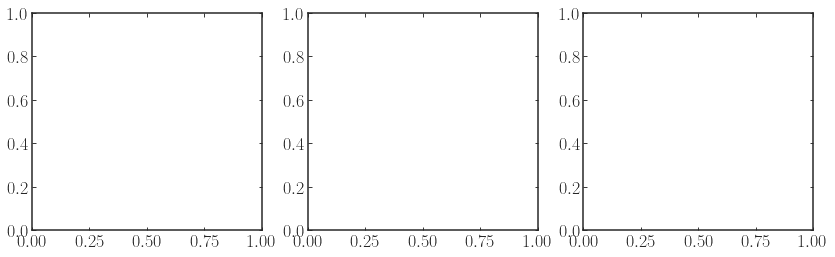

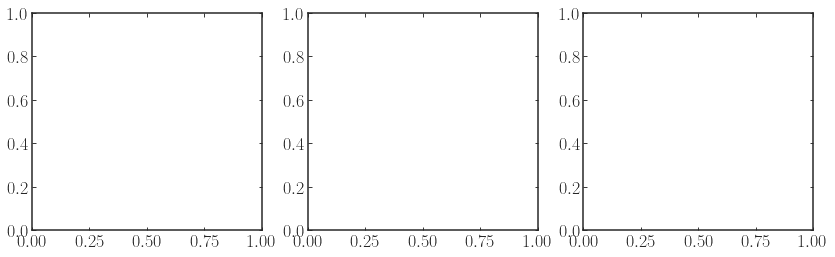

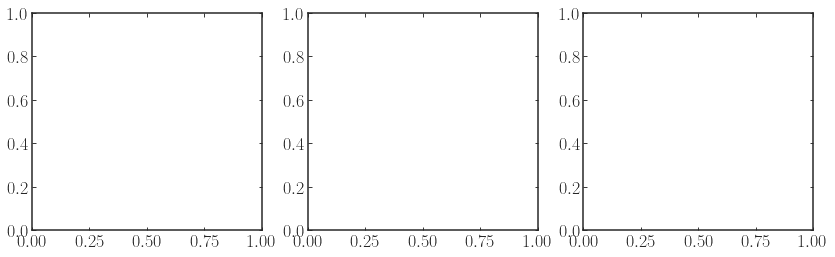

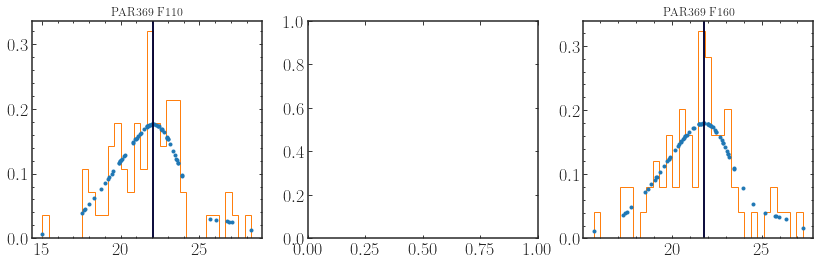

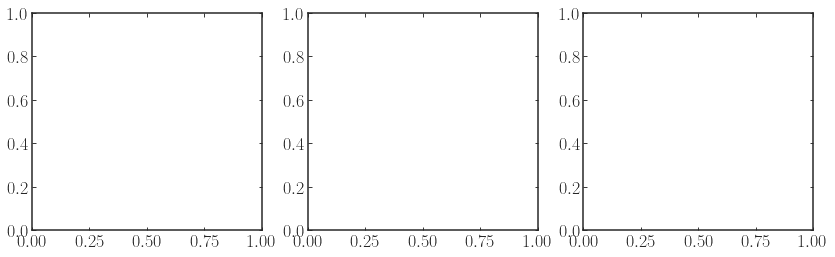

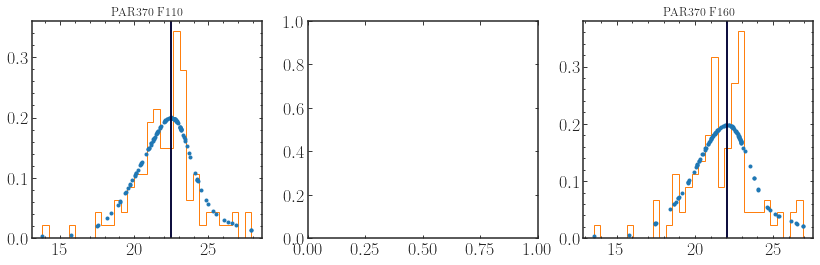

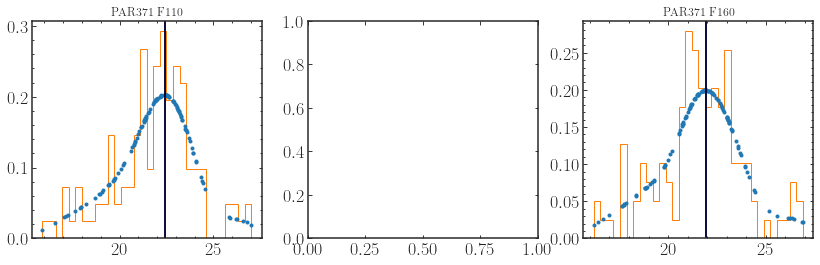

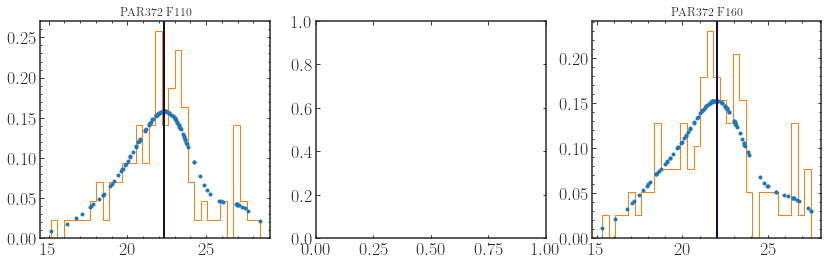

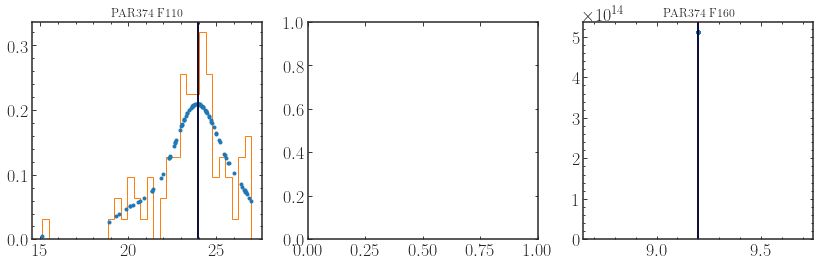

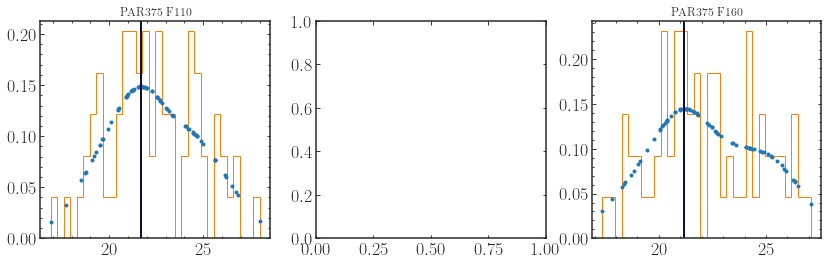

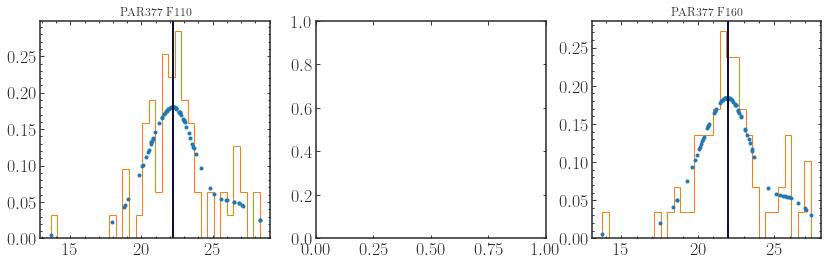

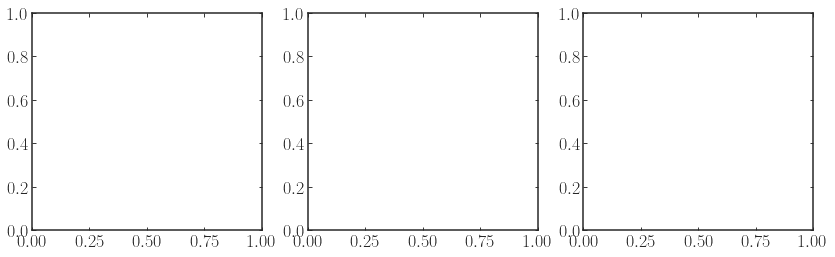

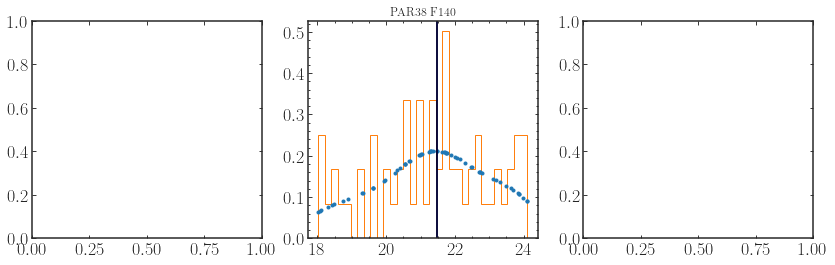

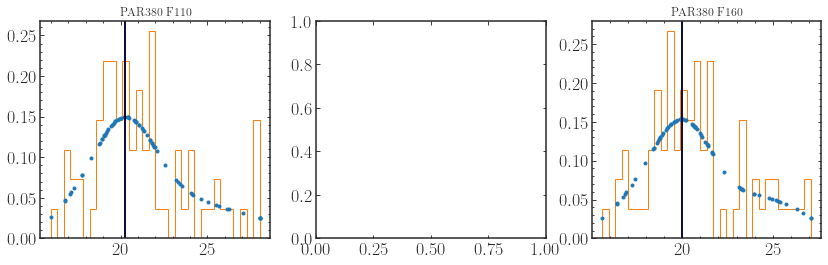

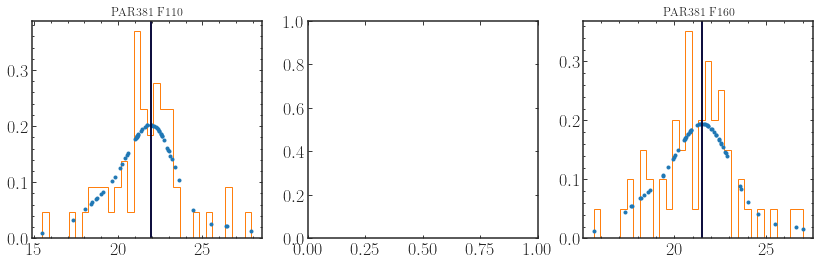

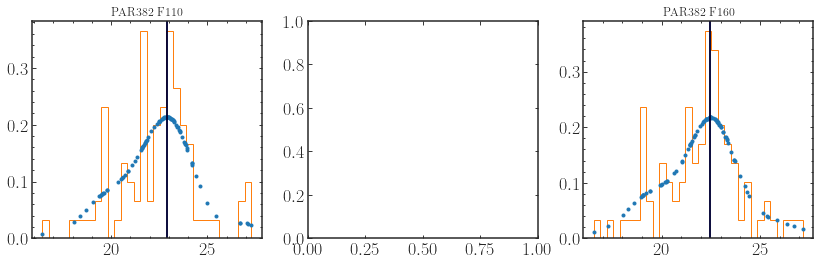

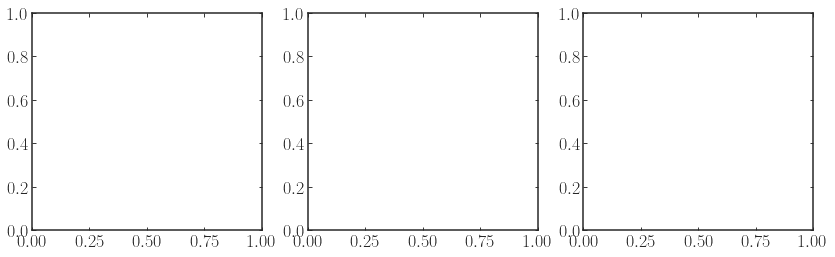

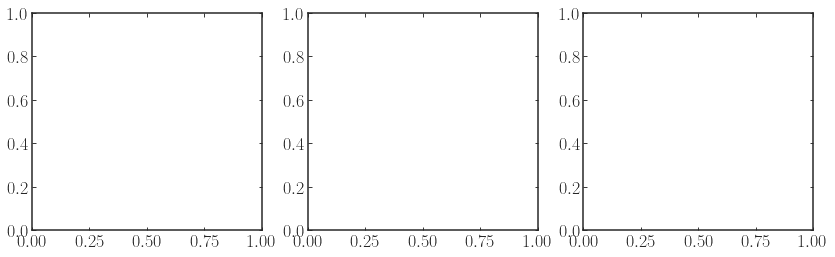

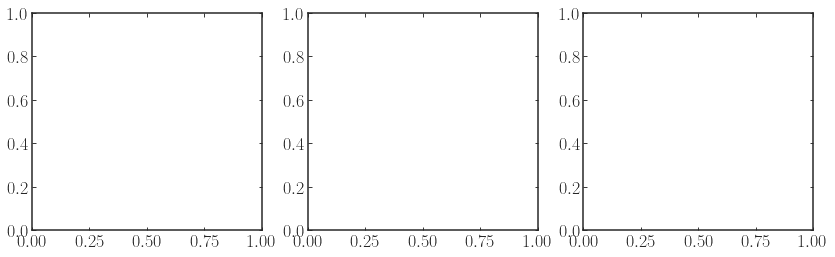

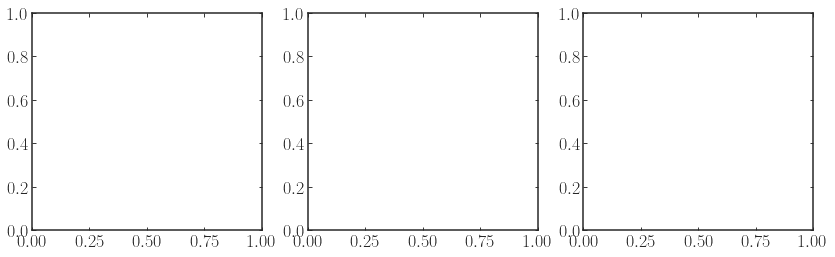

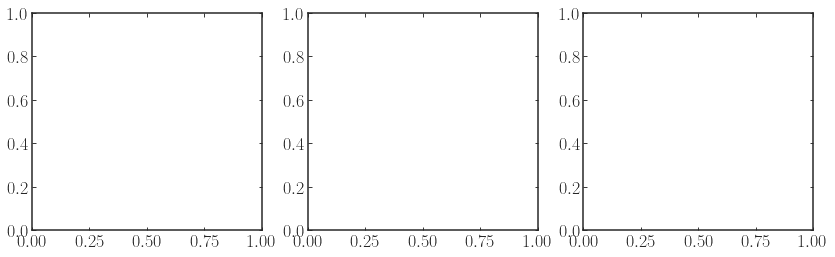

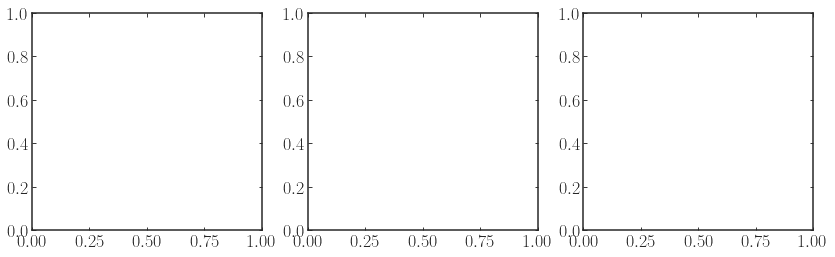

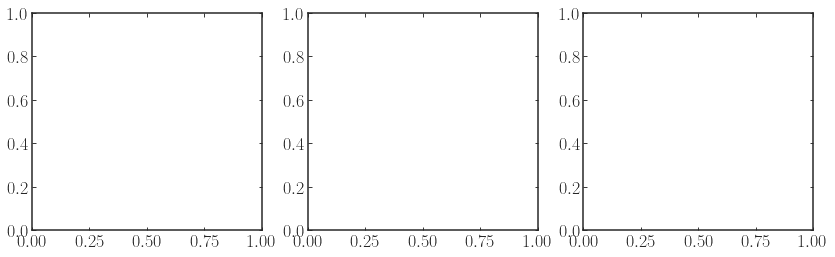

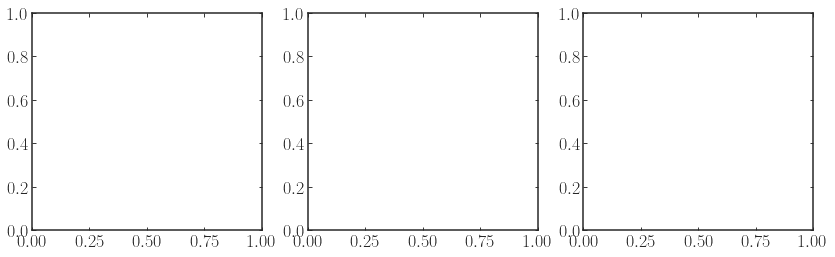

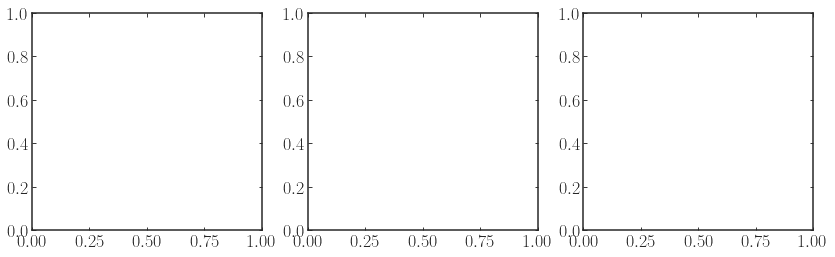

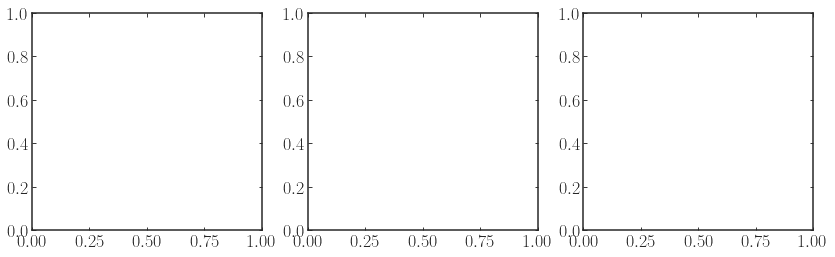

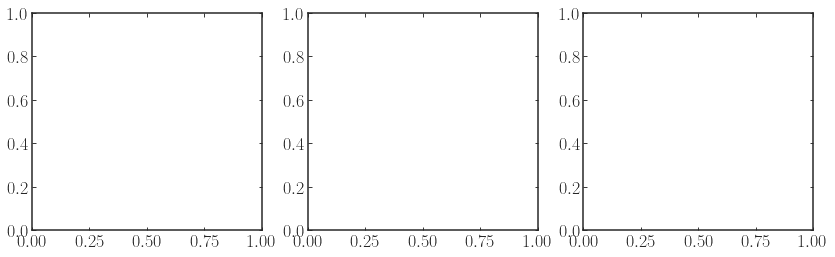

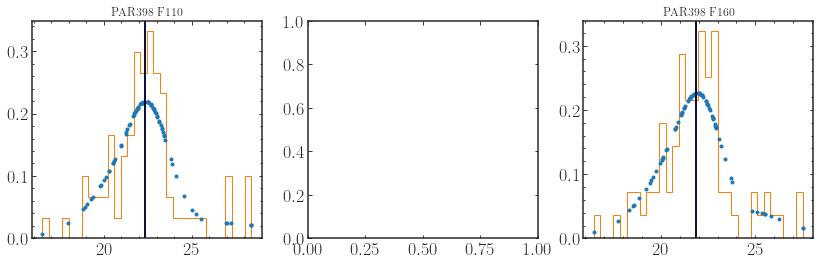

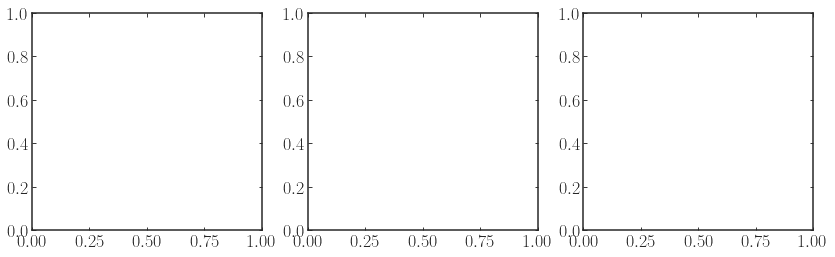

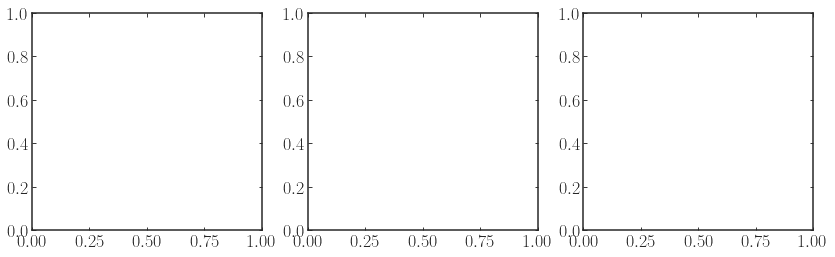

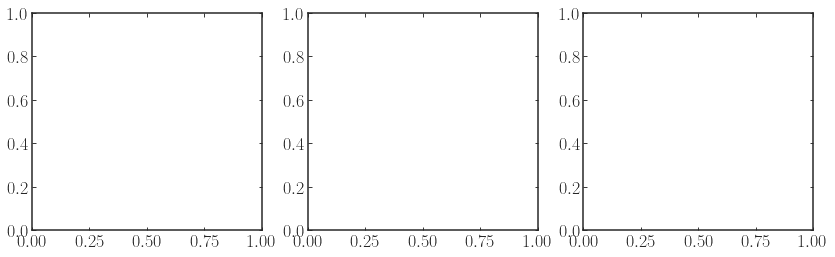

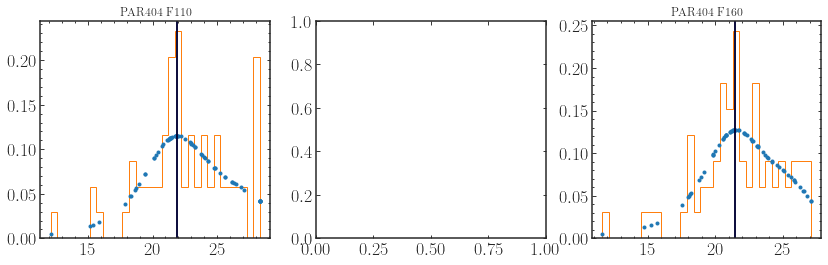

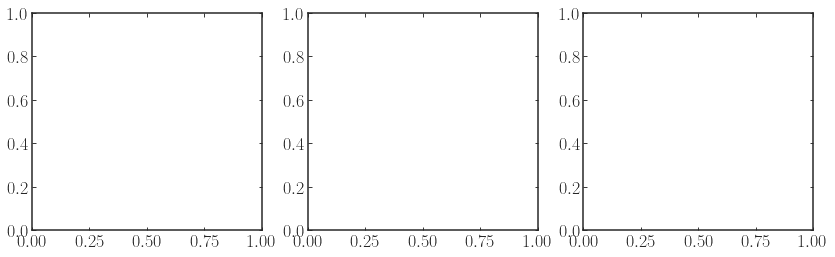

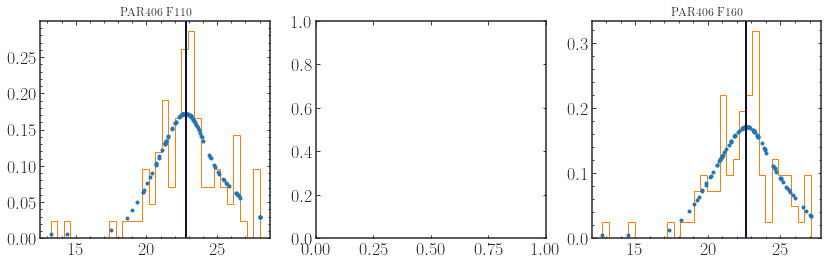

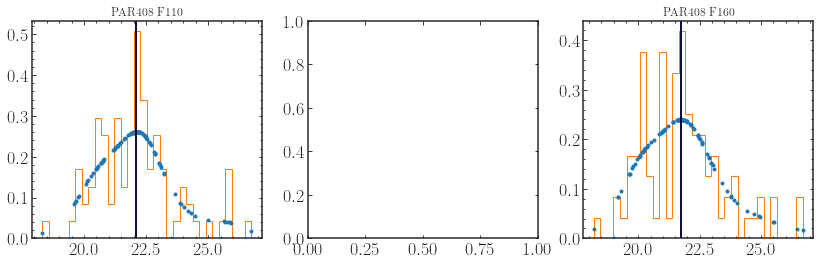

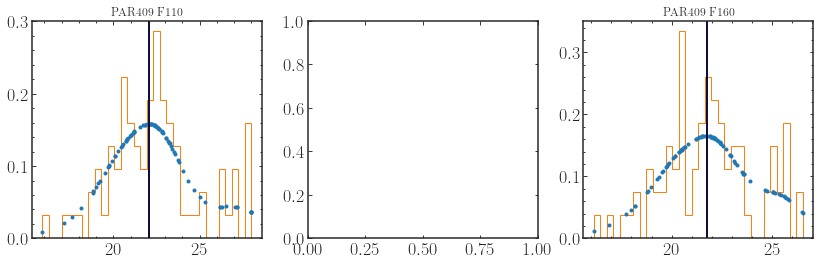

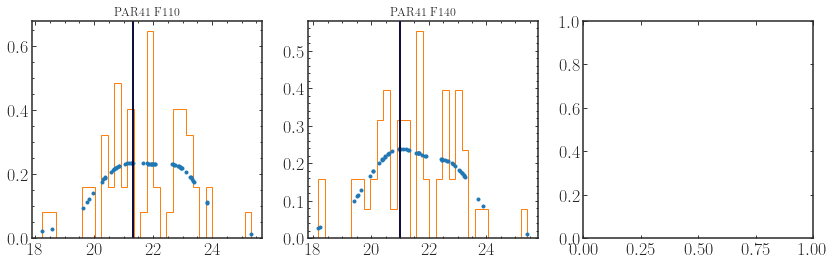

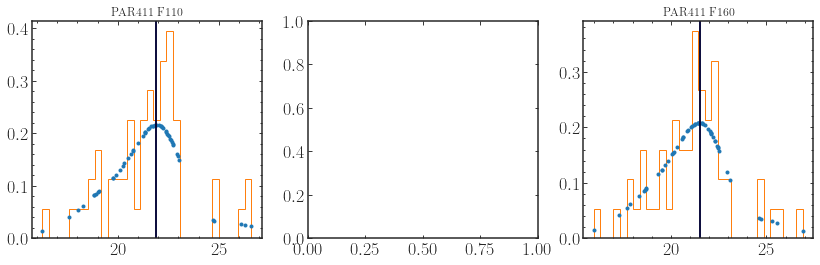

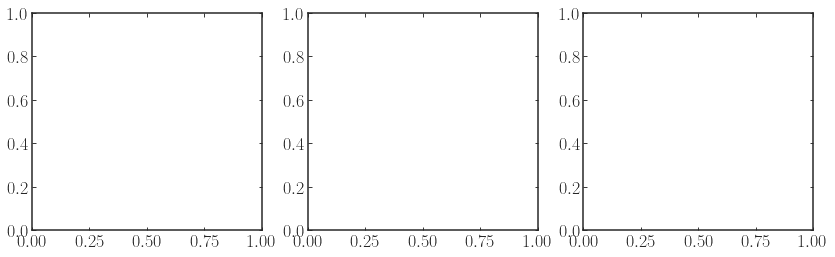

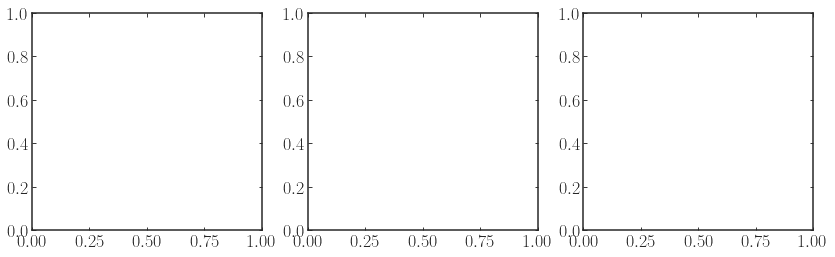

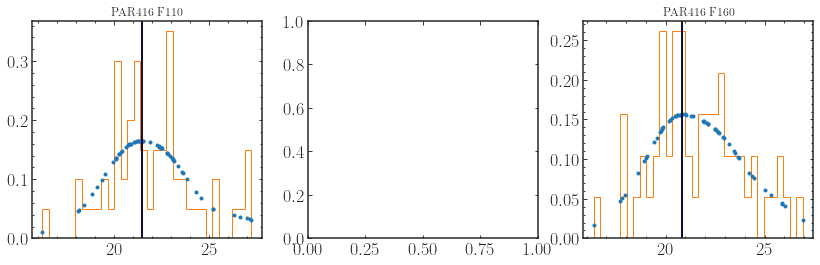

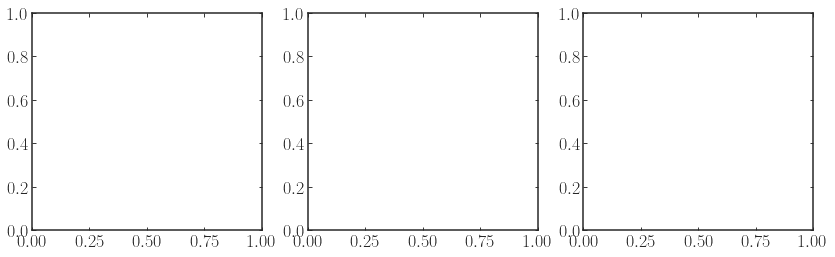

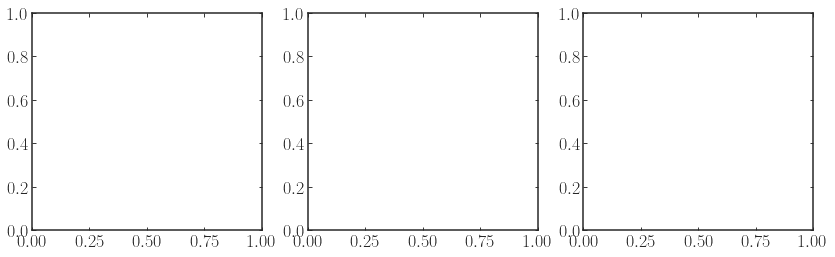

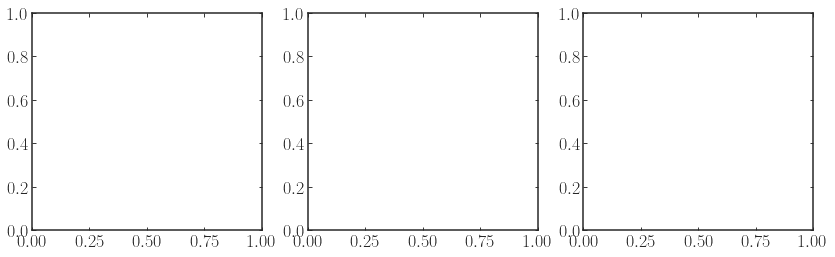

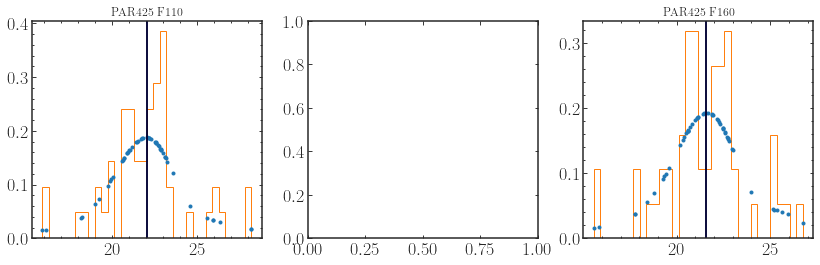

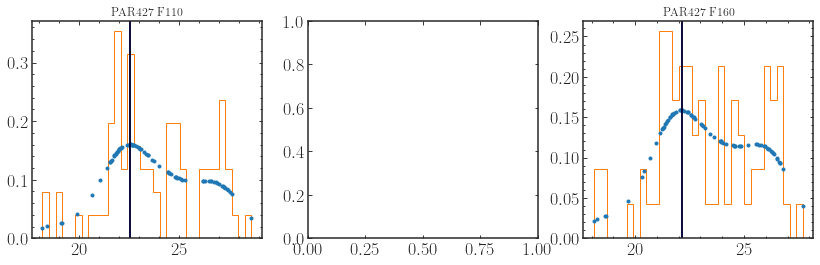

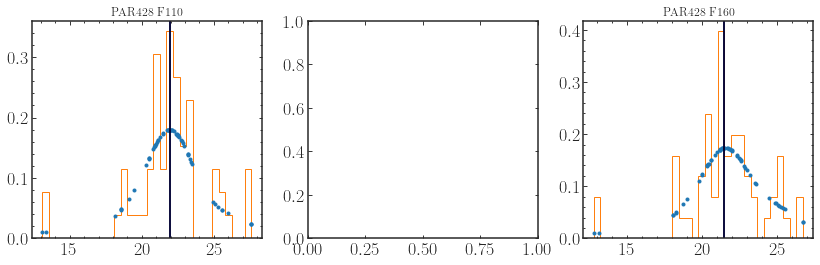

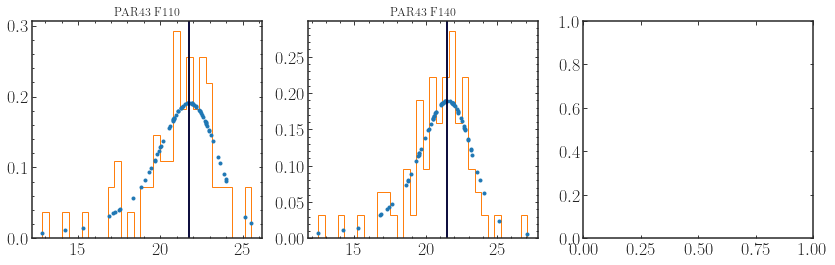

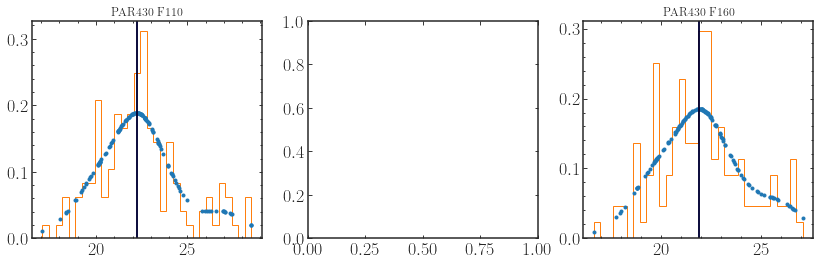

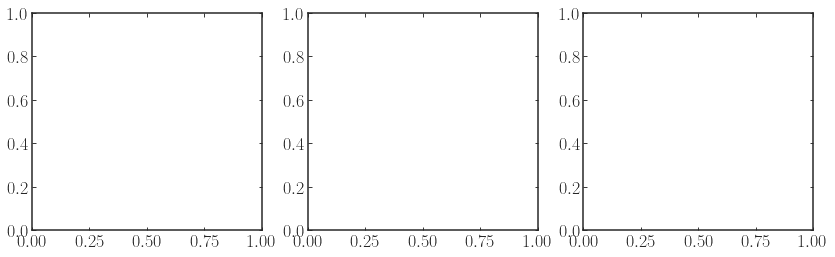

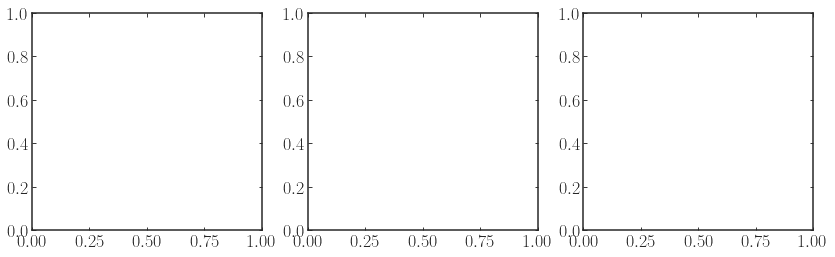

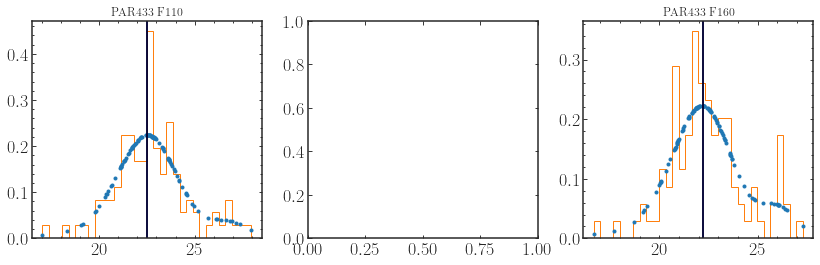

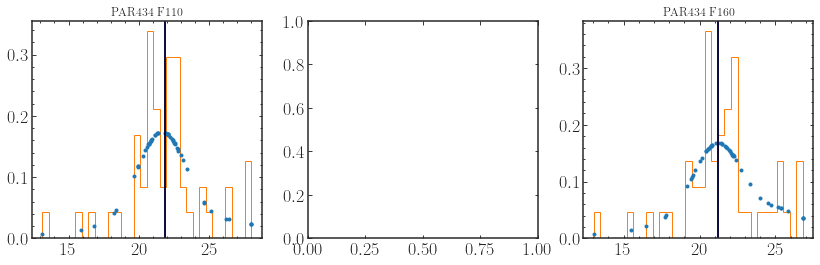

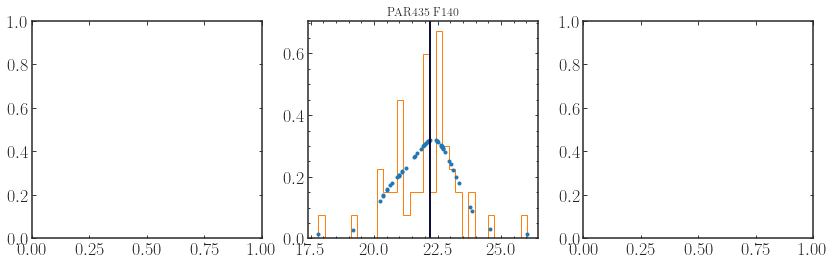

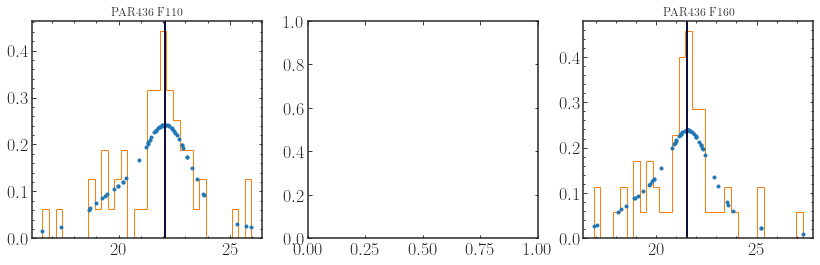

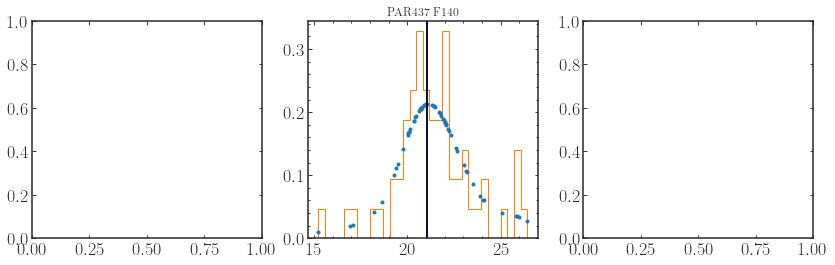

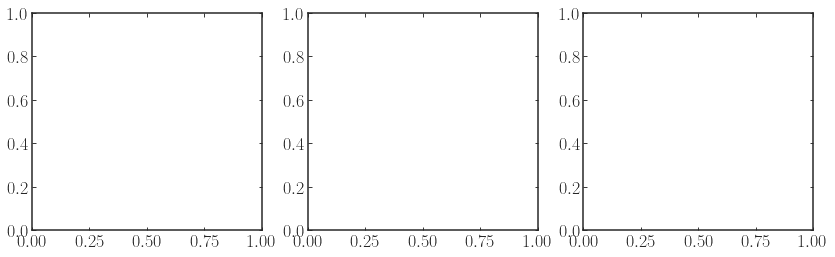

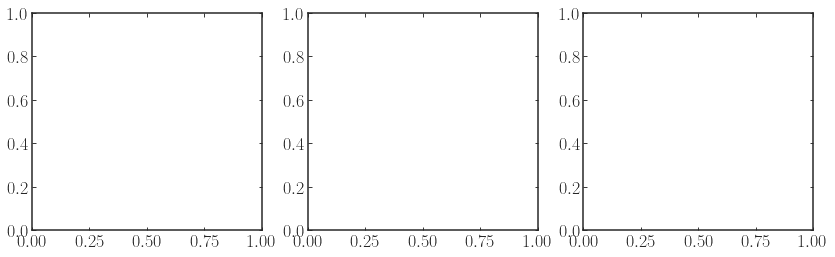

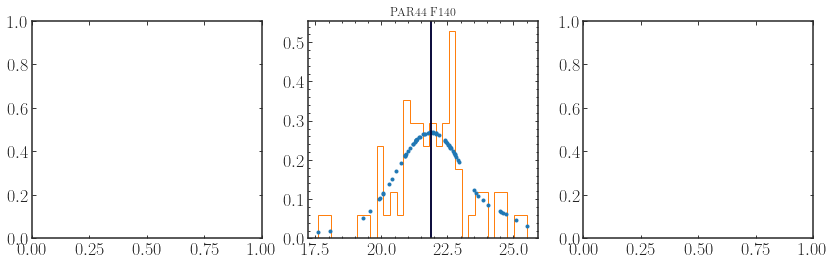

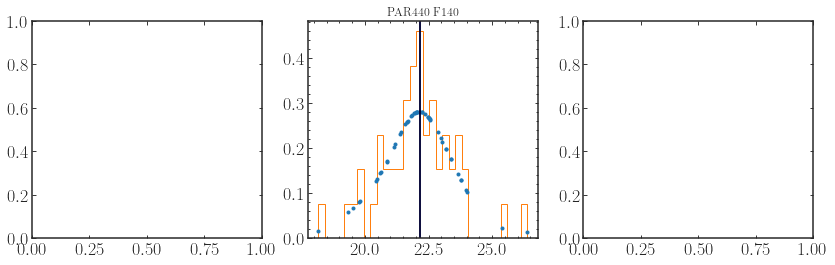

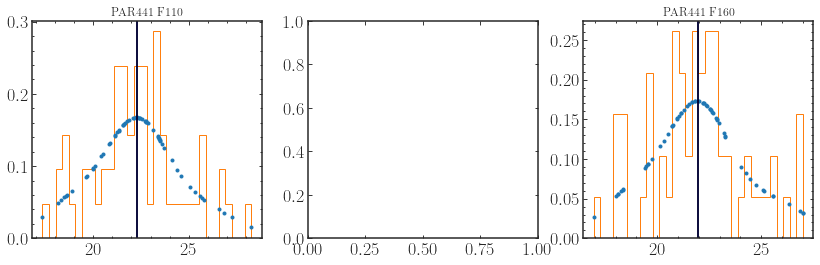

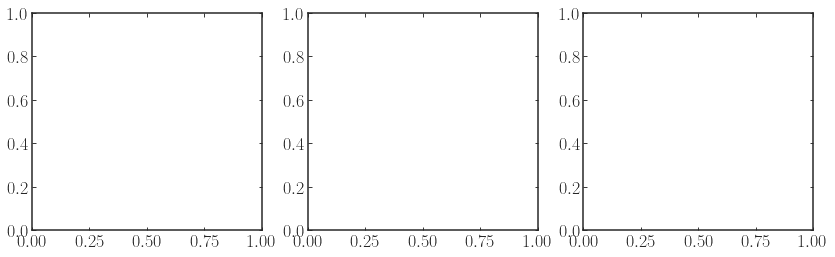

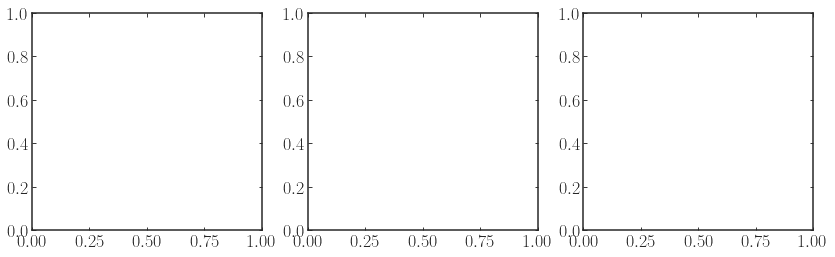

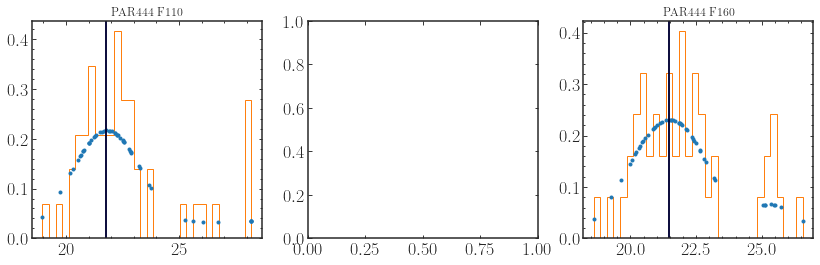

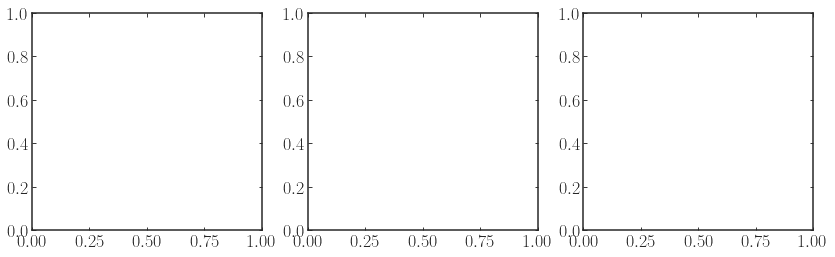

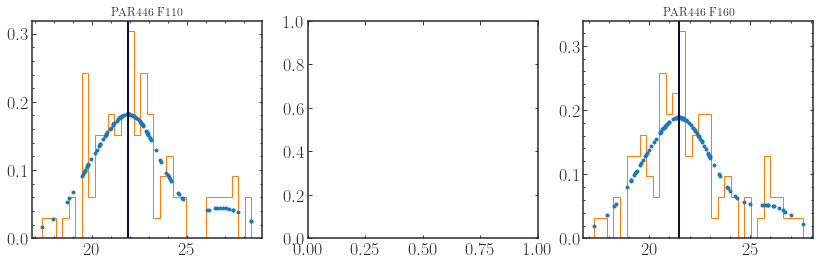

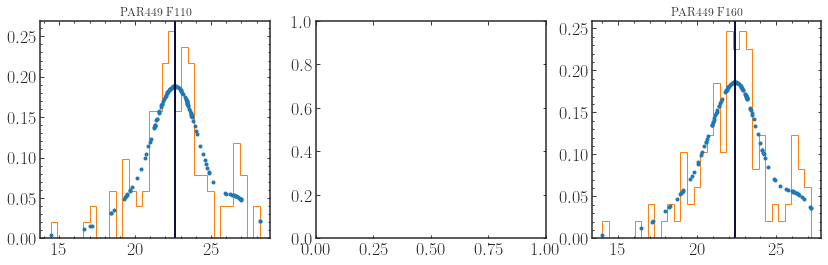

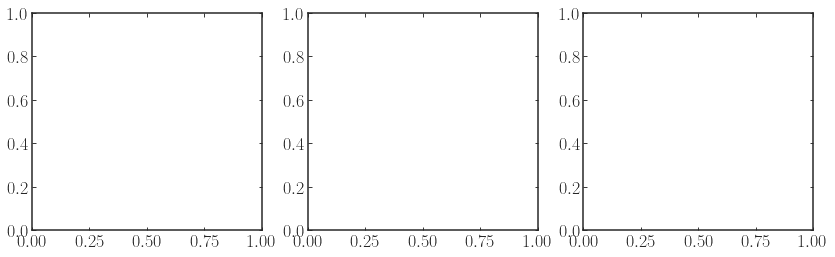

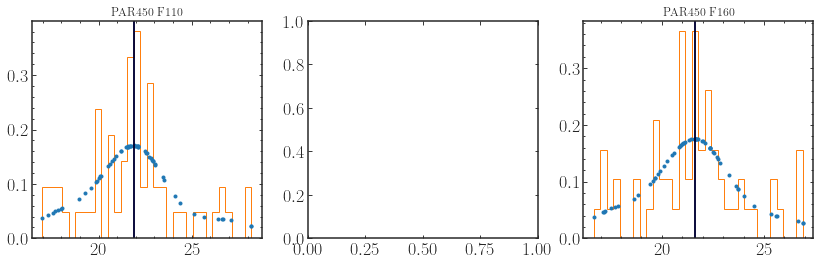

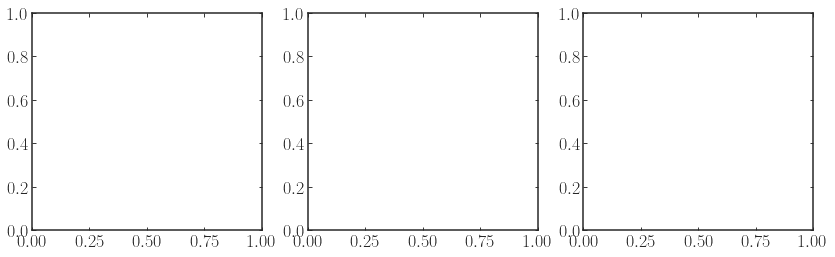

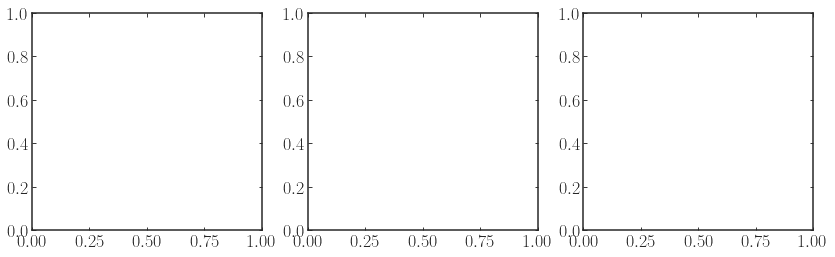

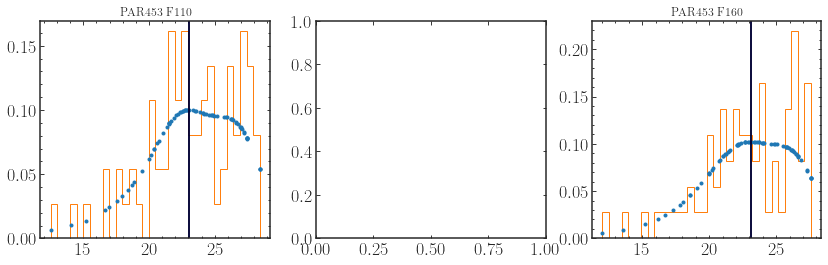

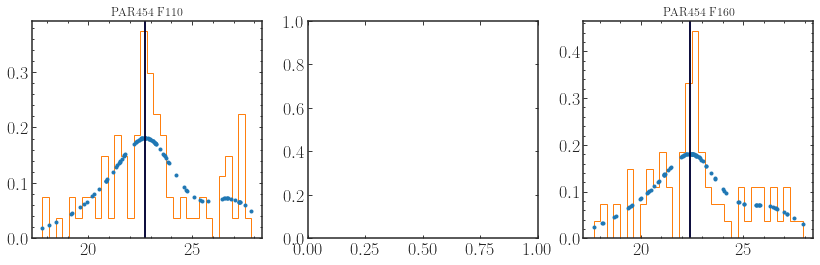

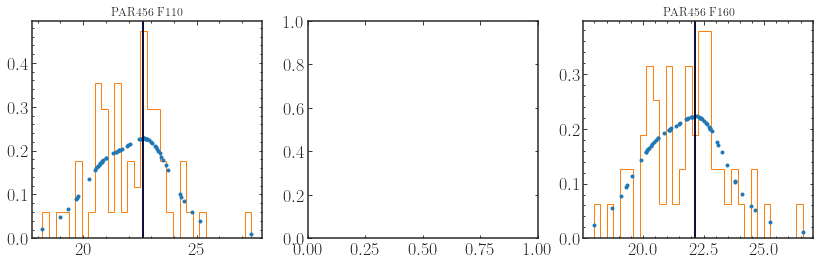

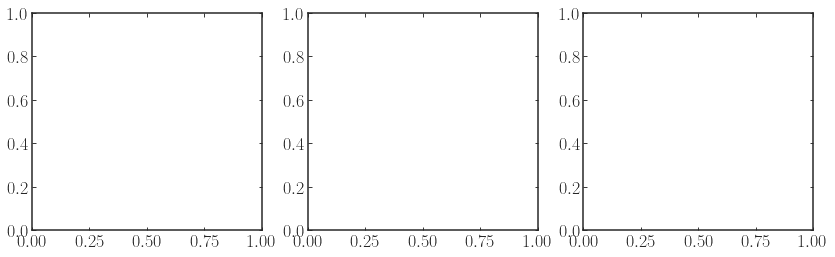

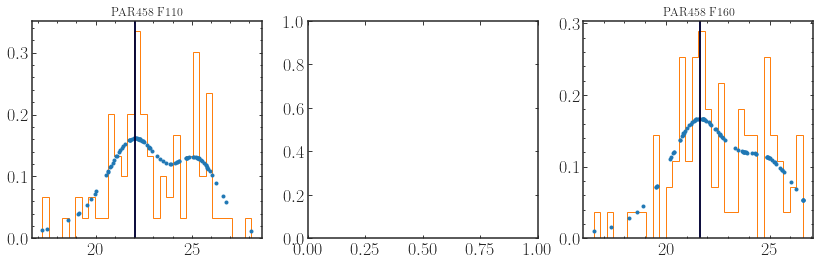

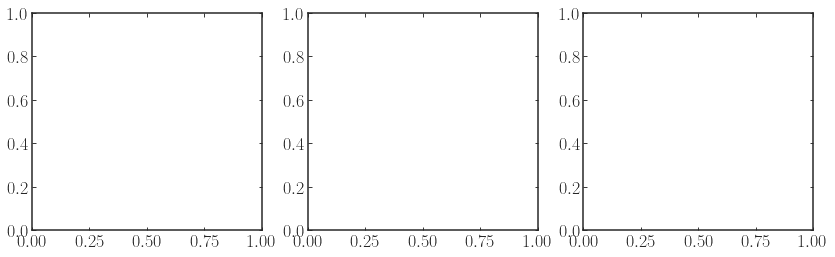

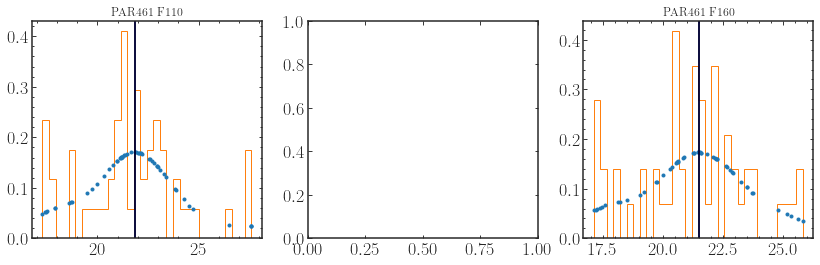

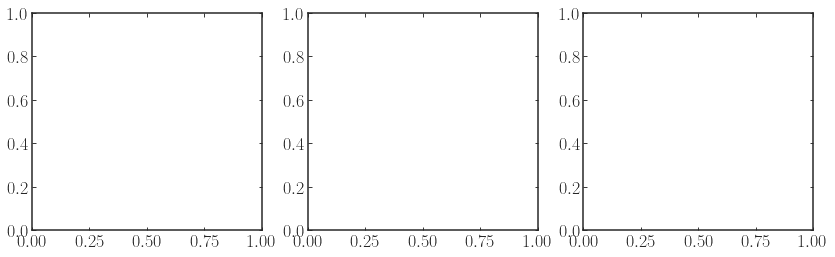

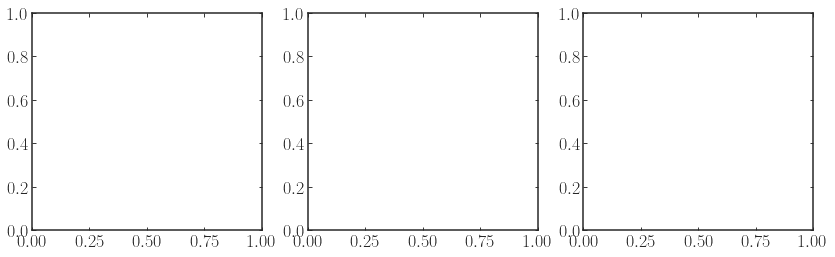

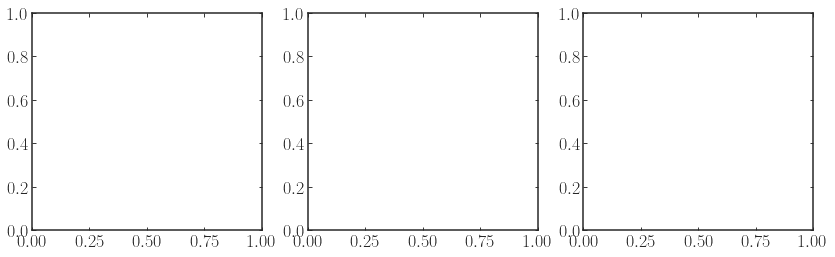

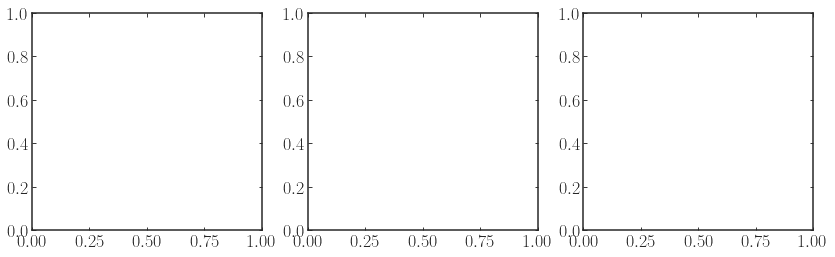

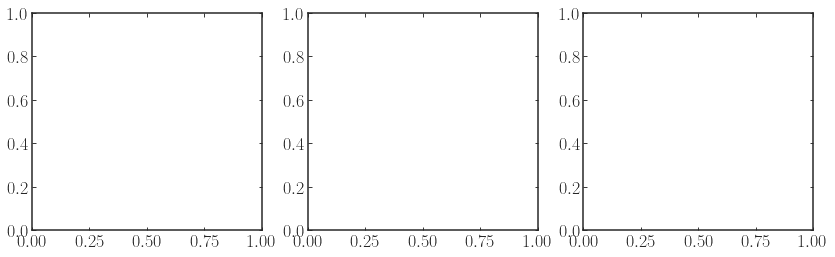

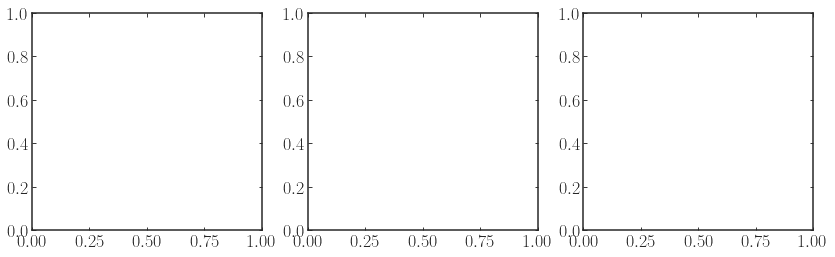

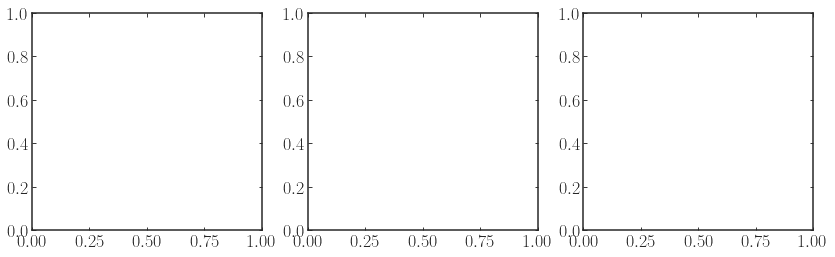

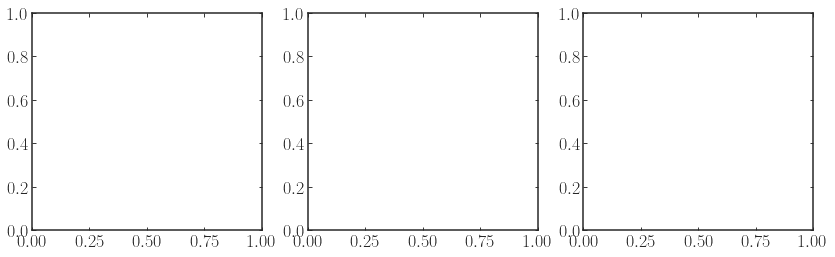

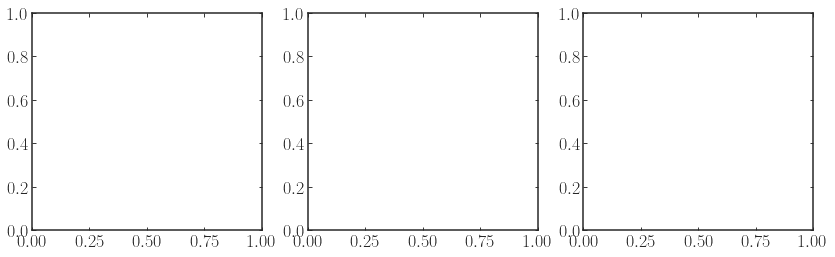

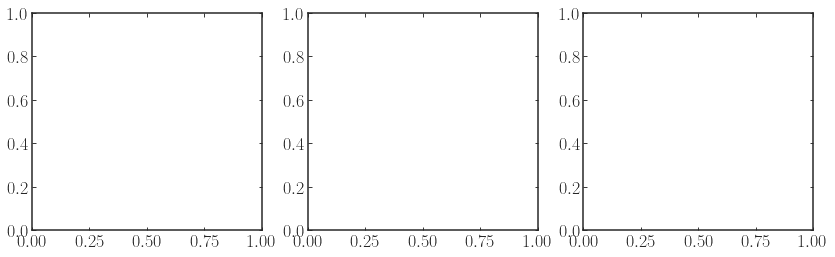

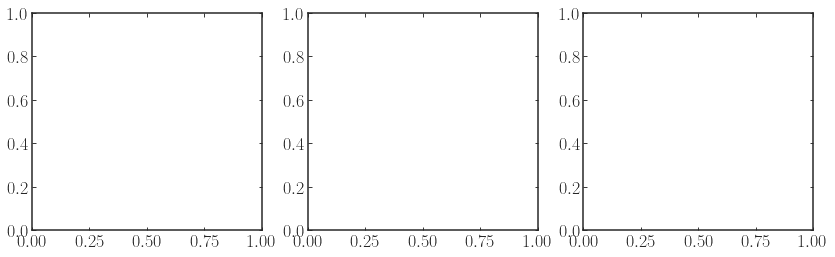

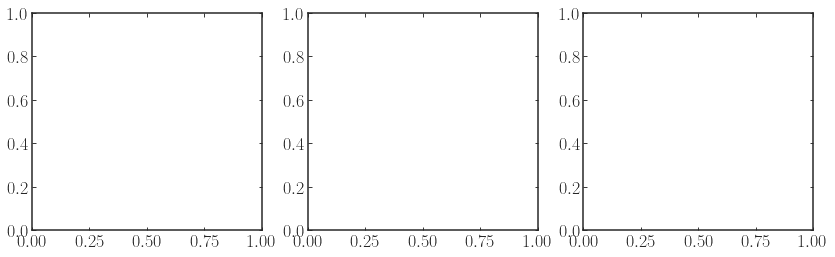

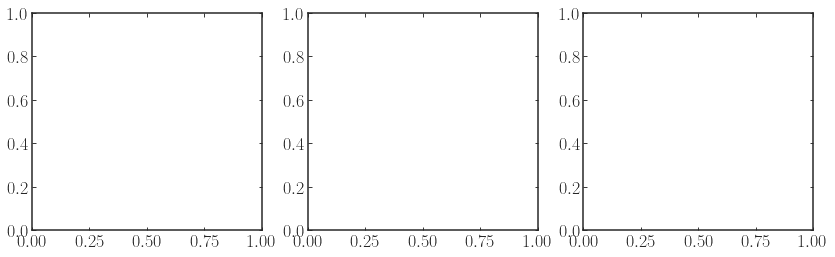

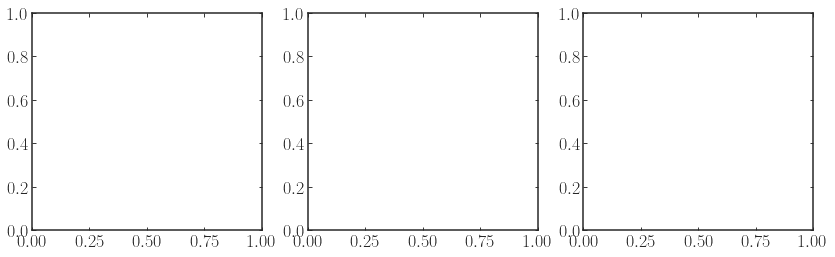

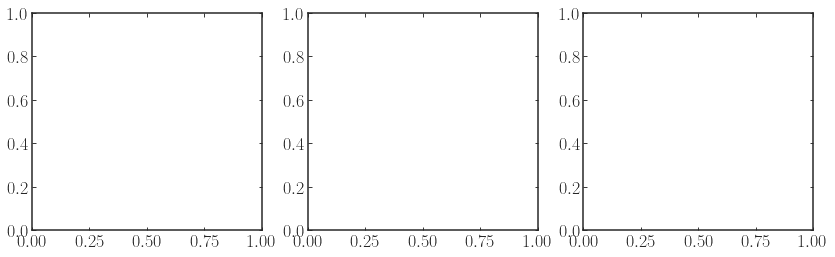

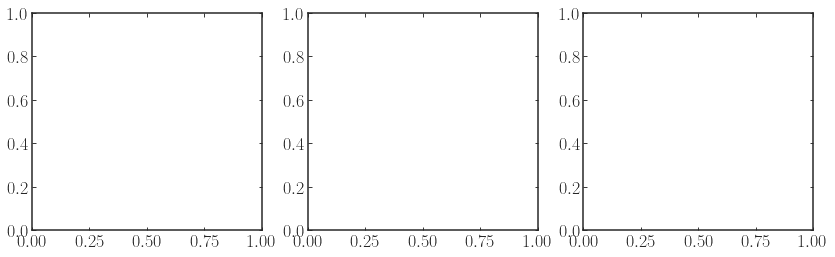

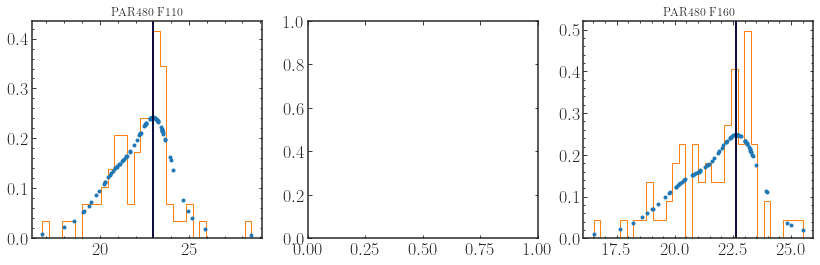

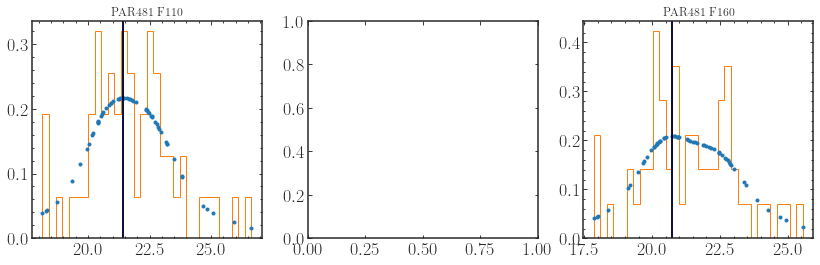

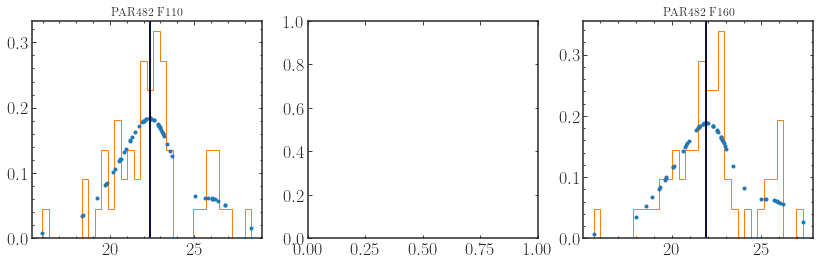

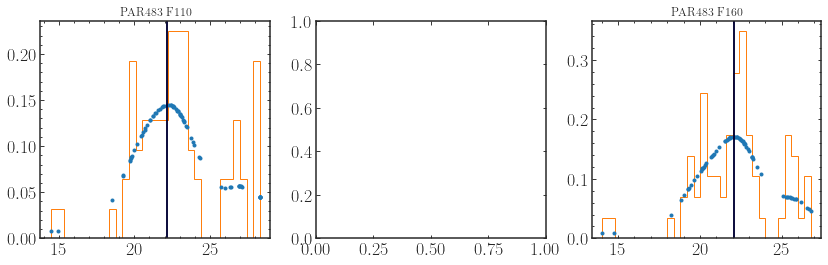

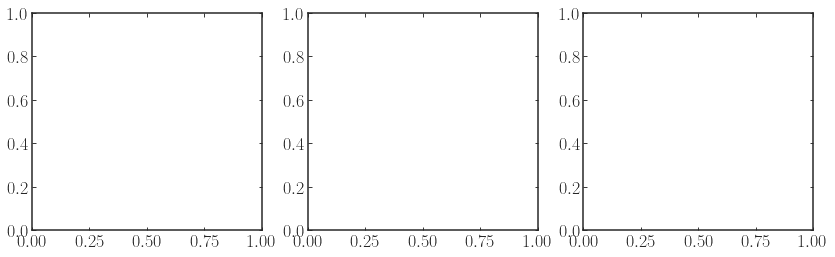

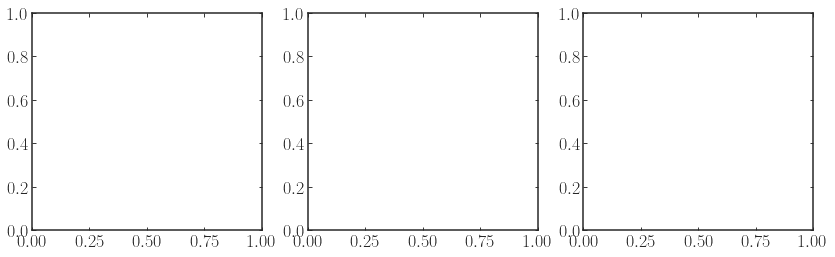

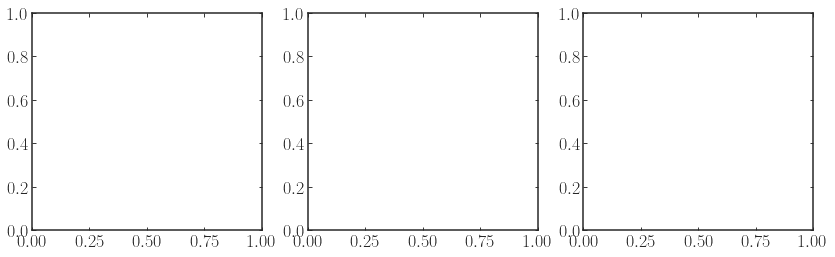

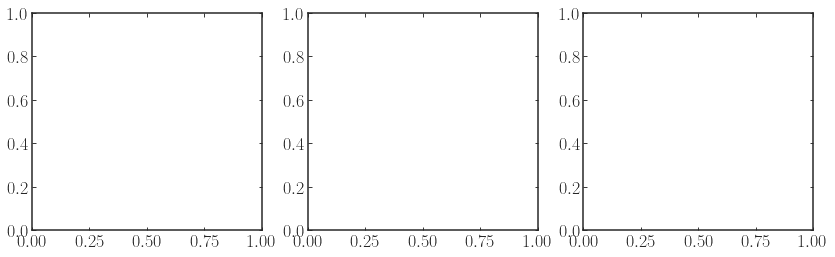

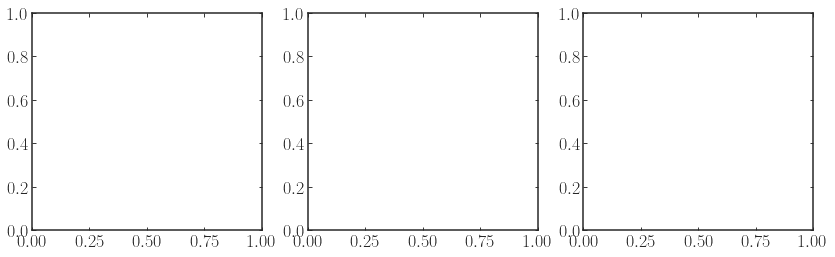

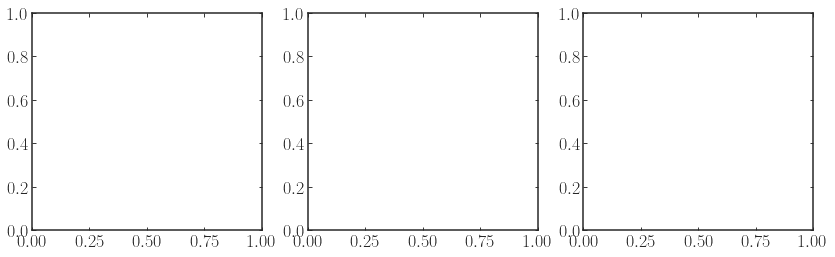

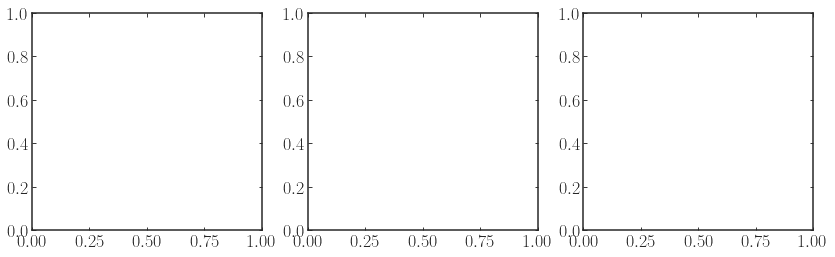

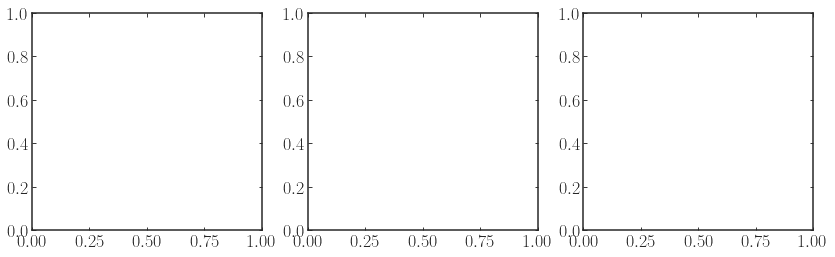

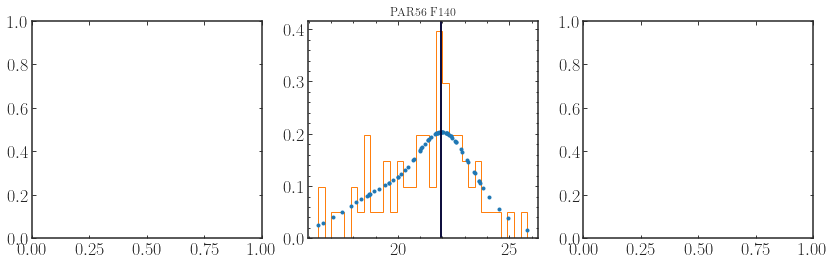

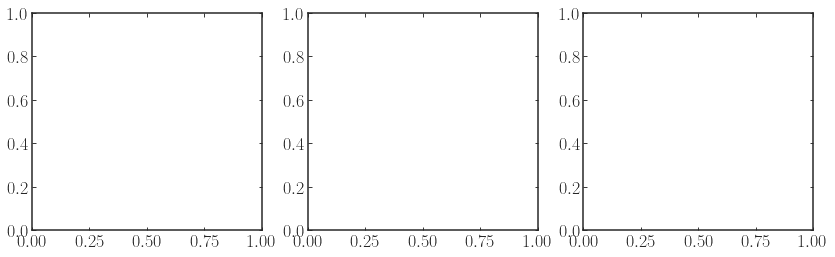

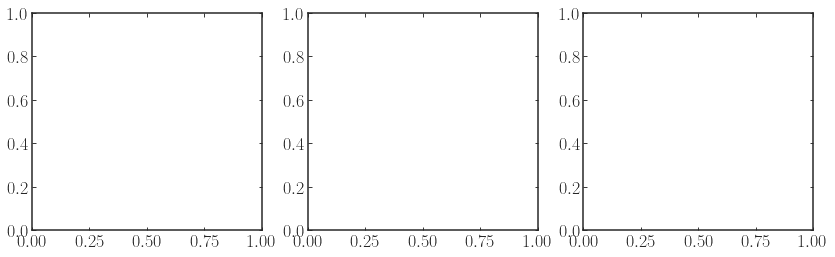

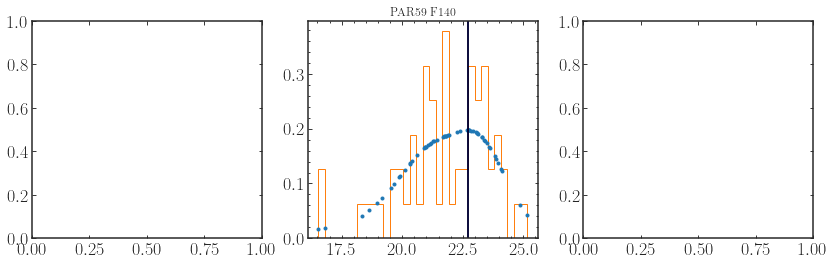

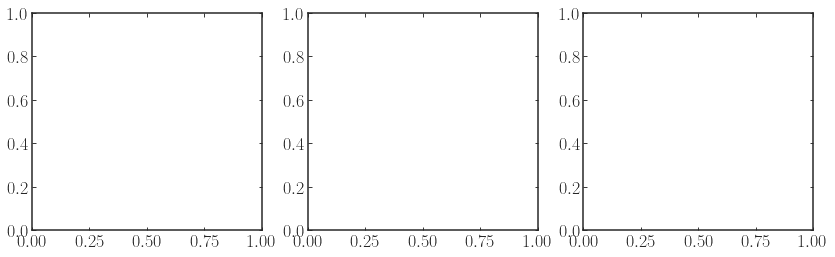

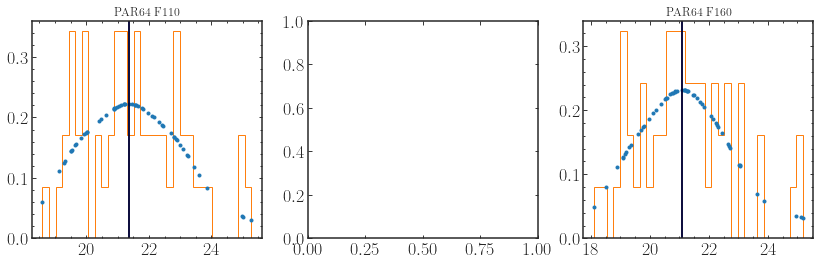

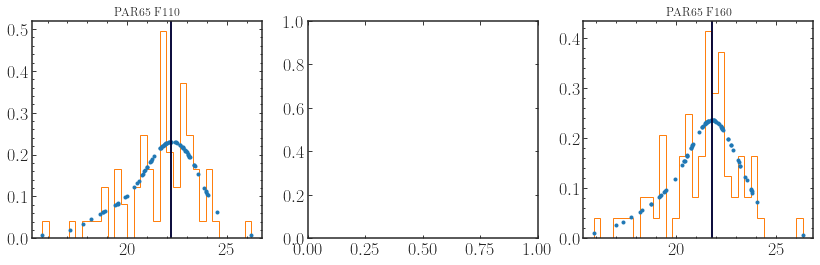

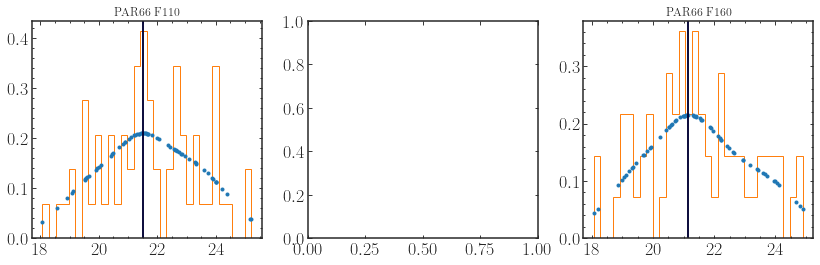

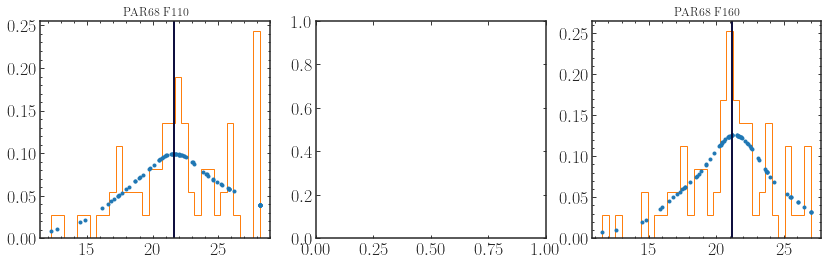

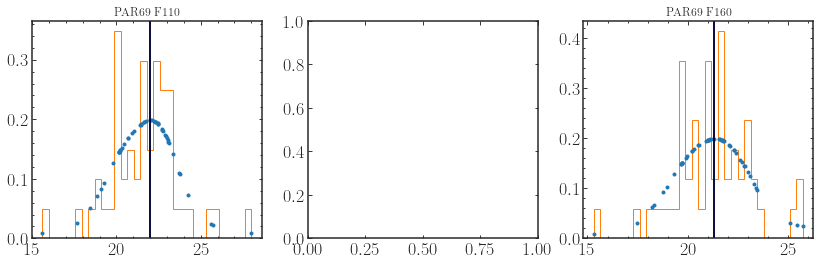

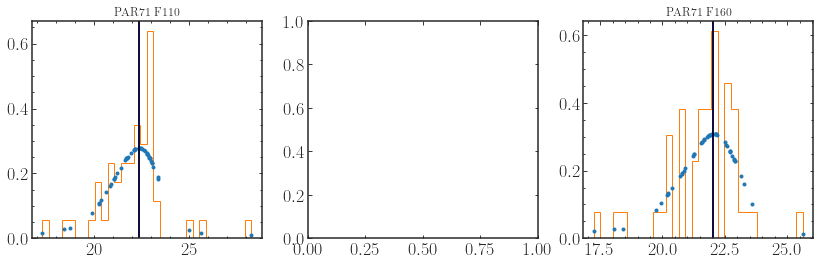

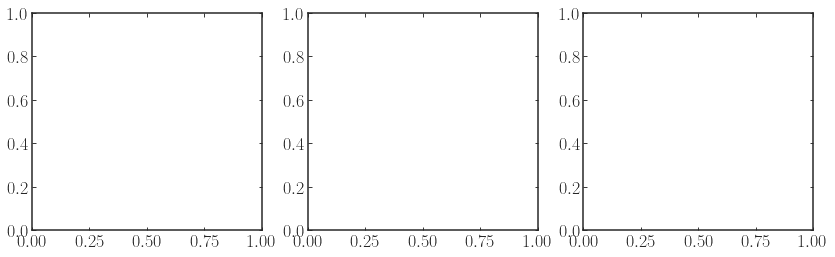

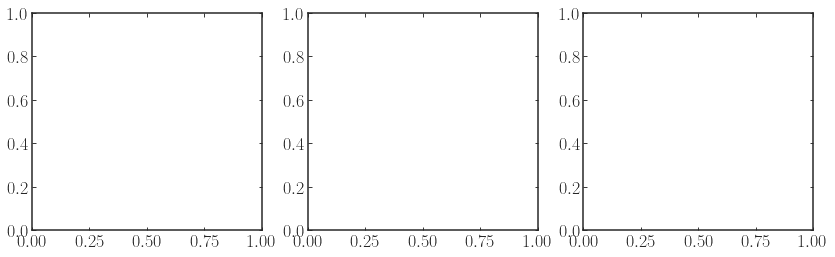

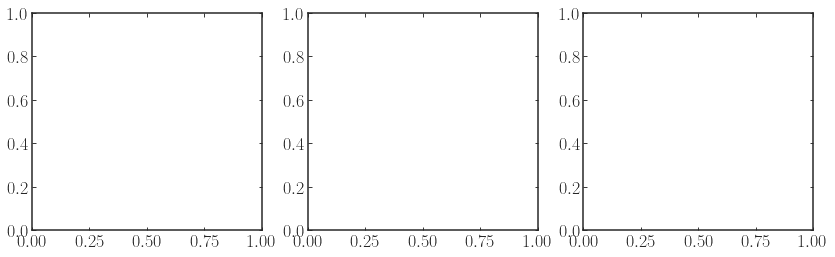

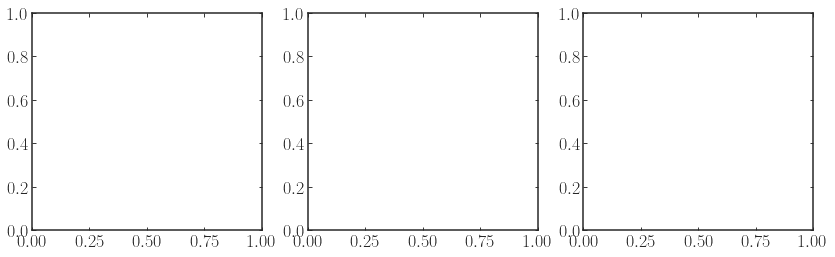

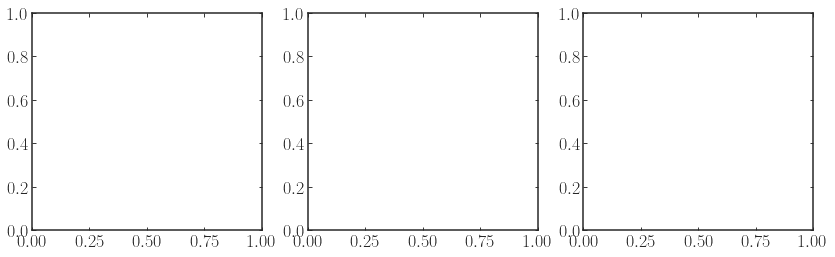

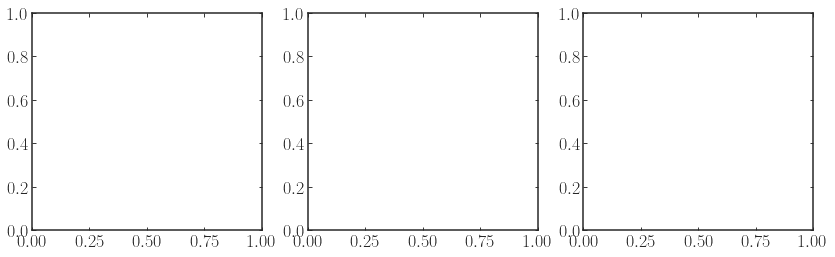

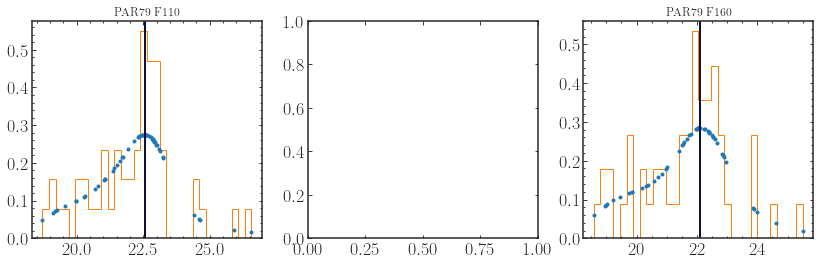

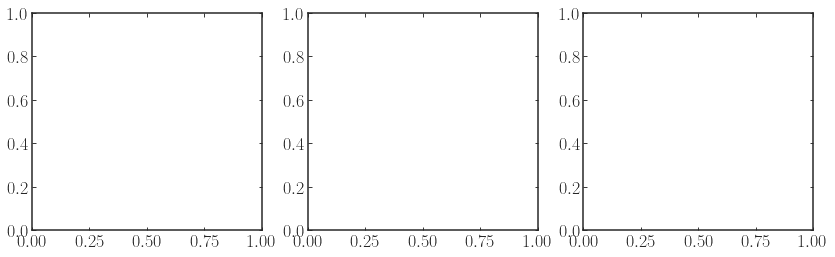

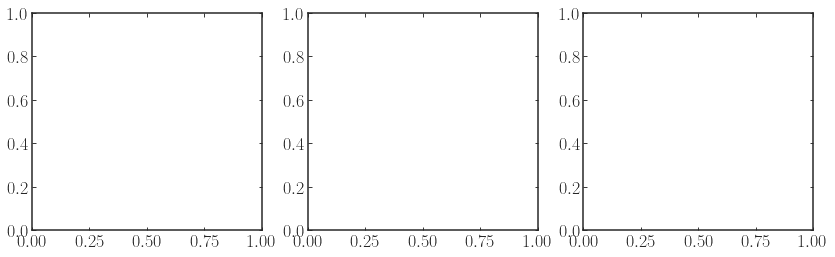

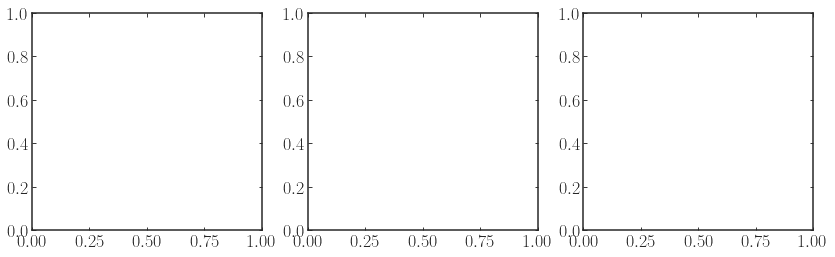

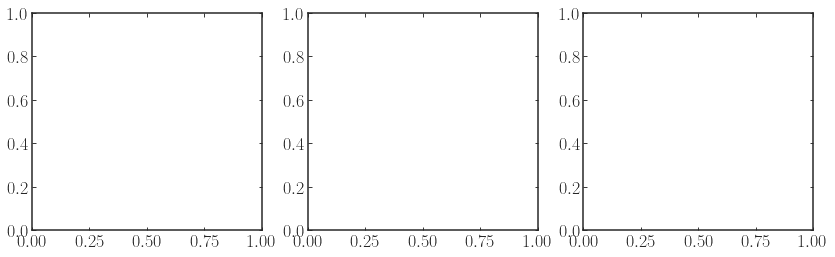

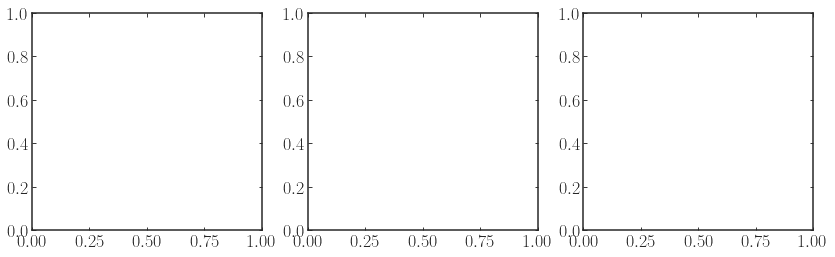

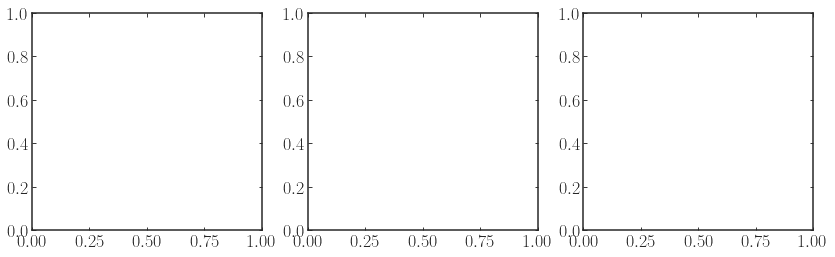

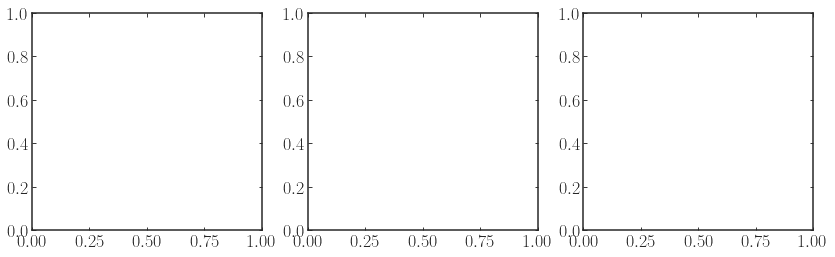

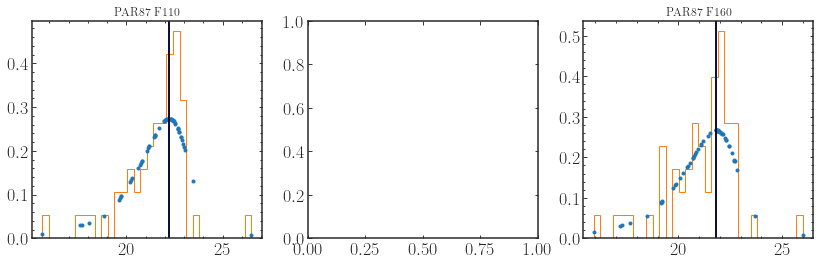

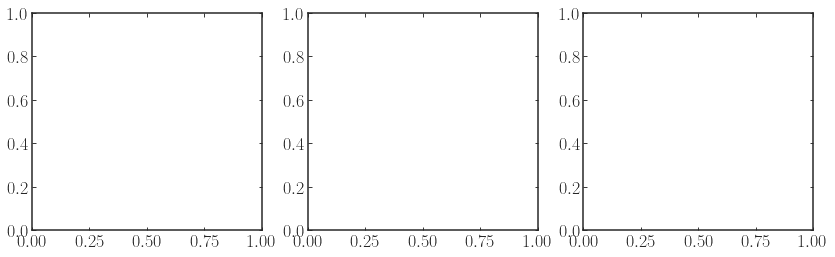

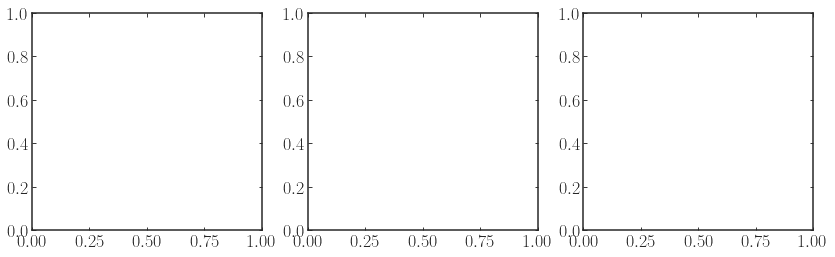

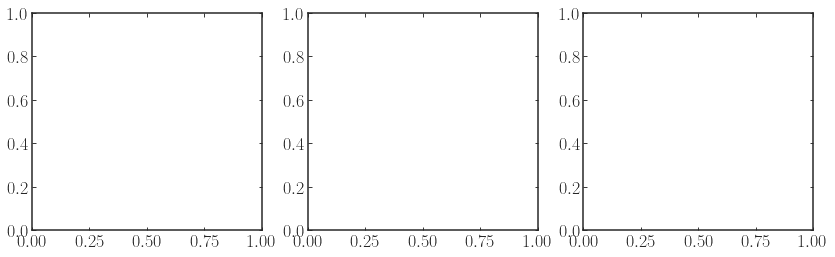

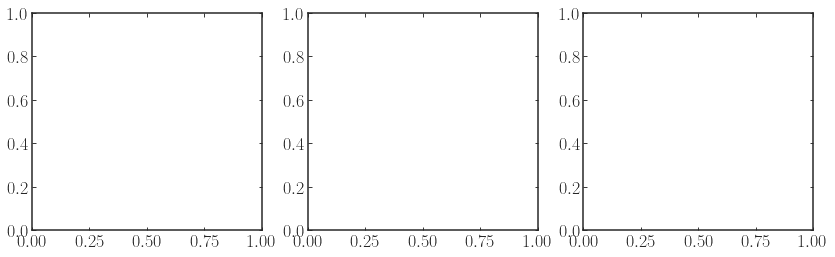

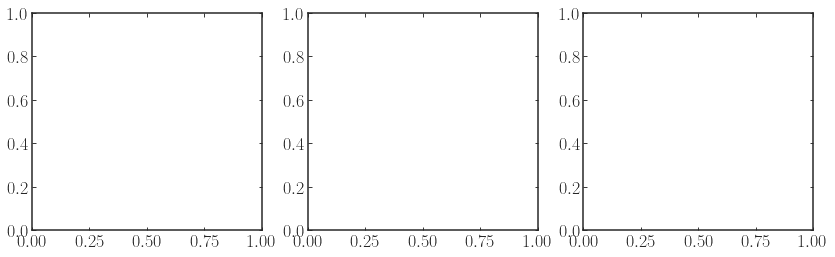

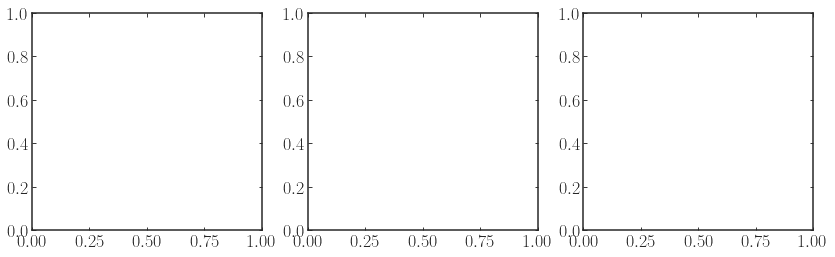

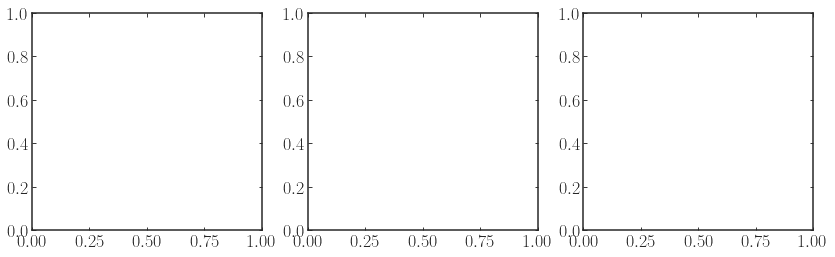

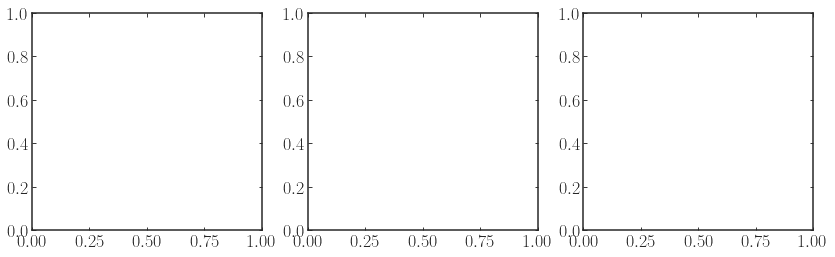

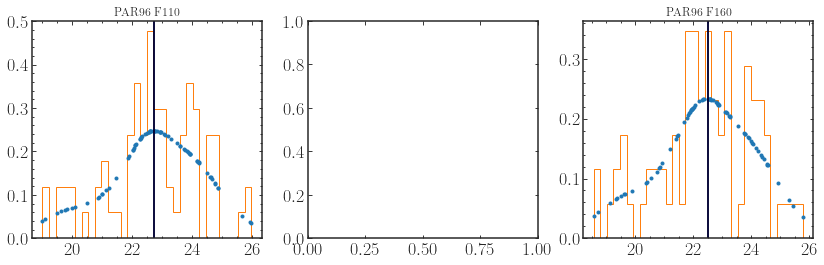

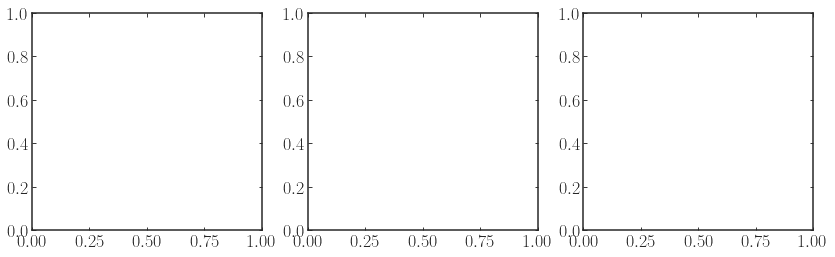

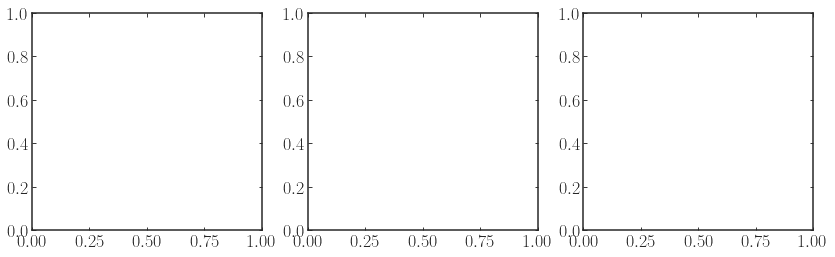

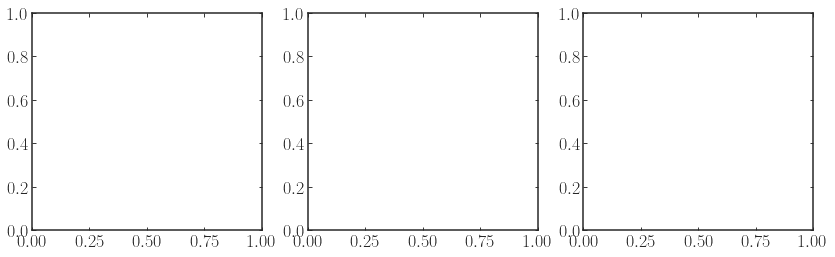

In [15]:
m=wisps.drop_nan(p.mags['F140'])
ml=p.mag_limits['F140']
for p in pnts:
    #p=np.random.choice(pnts)
    fig, ax=plt.subplots(ncols=3, figsize=(14,4))
    for k, a in zip(['F110', 'F140', 'F160'], ax):
        m=wisps.drop_nan(p.mags[k])
        if len(m) < 50:
            pass
        else:
            ml=p.mag_limits[k]
            kde, mx= get_max_value(m)
            a.plot(m, kde, '.')
            h=a.hist(m, bins=32, histtype='step', density=True)
            a.axvline(ml, c='b')
            a.axvline(mx, c='k')
            a.set_title(p.name.upper() + ' '+ k.upper())
            a.minorticks_on()

            
        
    
   
  
        
      


(0.5, 1.5)

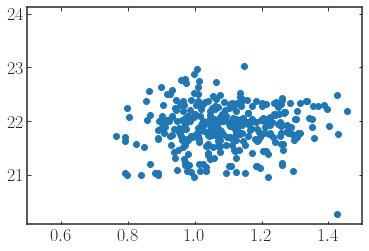

In [10]:
plt.scatter(madf.snr1, madf.F110)
plt.xlim([0.5, 1.5])

In [11]:
import seaborn as sns

(0.5, 1.5)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


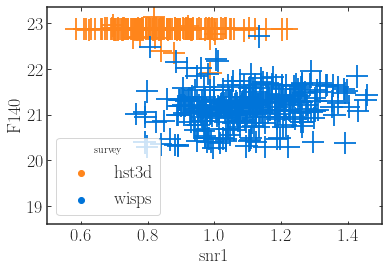

In [12]:
sns.scatterplot(y='F140', x='snr1', hue='survey', s=500., palette=['#FF851B', '#0074D9'], 
                data=madf, marker='+')
plt.xlim([0.5, 1.5])

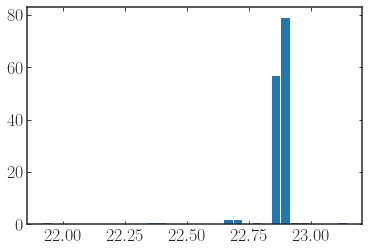

In [13]:
h=plt.hist((madf.F140[madf.survey=='hst3d']).values, bins=32)

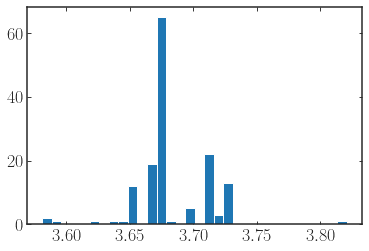

In [14]:
h=plt.hist(np.log10(madf.exp[madf.survey=='hst3d']).values, bins=32)